Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset_MDD

In [2]:
dataset = read_dataset_MDD()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1294], edge_attr=[1294, 1], y=[1])
['edge_attr', 'y', 'edge_index', 'x']
ValuesView({'x': tensor([[ 0.0000,  0.2857,  0.0804,  ...,  0.2032,  0.1674,  0.0906],
        [ 0.2857,  0.0000, -0.3860,  ...,  0.1637, -0.0359,  0.1674],
        [ 0.0804, -0.3860,  0.0000,  ..., -0.0175, -0.0309,  0.0296],
        ...,
        [ 0.2032,  0.1637, -0.0175,  ...,  0.0000,  0.2329, -0.1452],
        [ 0.1674, -0.0359, -0.0309,  ...,  0.2329,  0.0000,  0.0183],
        [ 0.0906,  0.1674,  0.0296,  ..., -0.1452,  0.0183,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 113, 113, 114],
        [ 10,  12,  14,  ..., 111, 112, 108]]), 'edge_attr': tensor([[0.7785],
        [0.6966],
        [0.5463],
        ...,
        [0.6415],
        [0.4745],
        [0.5401]]), 'y': tensor([0])})


1604

In [4]:
#set the seed
import torch
torch.manual_seed(0)

MODEL = "GIN"
DATASET = "FC_MDD"

from models.models_FC import GIN_framework as framework # import the model

gnn = framework(dataset)

print(gnn.model)
print(gnn.train_idx)

MODELtri = "GINtri"
from models.models_FC import GIN_framework_tri as framework # import the model
gnntri = framework(dataset)

MODEL2 = "GIN2"
from models.models_FC import GIN_framework2 as framework2 # import the model
gnn2 = framework2(dataset)

MODEL3 = "GIN3"
from models.models_FC import GIN_framework3 as framework3 # import the model
gnn3 = framework3(dataset)

Net(
  (gin_layers): ModuleList(
    (0): GINConv(nn=Sequential(
      (0): Linear(in_features=116, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
    (1): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
    (2): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
    (3): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): BatchNorm(128)
    ))
    (4): GINConv(nn=Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
gnn.iterate()

Epoch: 020, Loss: 0.380, Test Loss: 1.026, Train Acc: 0.827 Test Acc: 0.506
Epoch: 040, Loss: 0.028, Test Loss: 1.371, Train Acc: 0.984 Test Acc: 0.617
Epoch: 060, Loss: 0.008, Test Loss: 1.690, Train Acc: 0.986 Test Acc: 0.654
Epoch: 080, Loss: 0.004, Test Loss: 1.835, Train Acc: 0.985 Test Acc: 0.642
Epoch: 100, Loss: 0.003, Test Loss: 1.950, Train Acc: 0.986 Test Acc: 0.630
Epoch: 120, Loss: 0.002, Test Loss: 2.048, Train Acc: 0.985 Test Acc: 0.617
Epoch: 140, Loss: 0.002, Test Loss: 2.131, Train Acc: 0.984 Test Acc: 0.617
Epoch: 160, Loss: 0.001, Test Loss: 2.202, Train Acc: 0.983 Test Acc: 0.605
Epoch: 180, Loss: 0.001, Test Loss: 2.257, Train Acc: 0.983 Test Acc: 0.593
Epoch: 200, Loss: 0.001, Test Loss: 2.309, Train Acc: 0.983 Test Acc: 0.593
Epoch: 220, Loss: 0.001, Test Loss: 2.358, Train Acc: 0.984 Test Acc: 0.593
Epoch: 240, Loss: 0.001, Test Loss: 2.394, Train Acc: 0.984 Test Acc: 0.593
Epoch: 260, Loss: 0.001, Test Loss: 2.430, Train Acc: 0.984 Test Acc: 0.593
Epoch: 280, 

In [6]:
gnntri.iterate()

Epoch: 020, Loss: 0.621, Test Loss: 0.788, Train Acc: 0.687 Test Acc: 0.506
Epoch: 040, Loss: 0.381, Test Loss: 0.940, Train Acc: 0.891 Test Acc: 0.556
Epoch: 060, Loss: 0.186, Test Loss: 1.308, Train Acc: 0.974 Test Acc: 0.543
Epoch: 080, Loss: 0.094, Test Loss: 1.283, Train Acc: 0.996 Test Acc: 0.568
Epoch: 100, Loss: 0.052, Test Loss: 1.363, Train Acc: 0.999 Test Acc: 0.580
Epoch: 120, Loss: 0.038, Test Loss: 1.512, Train Acc: 0.998 Test Acc: 0.593
Epoch: 140, Loss: 0.031, Test Loss: 1.496, Train Acc: 0.999 Test Acc: 0.605
Epoch: 160, Loss: 0.019, Test Loss: 1.561, Train Acc: 1.000 Test Acc: 0.605
Epoch: 180, Loss: 0.016, Test Loss: 1.593, Train Acc: 0.999 Test Acc: 0.605
Epoch: 200, Loss: 0.021, Test Loss: 1.630, Train Acc: 0.999 Test Acc: 0.667
Epoch: 220, Loss: 0.020, Test Loss: 1.723, Train Acc: 0.999 Test Acc: 0.593
Epoch: 240, Loss: 0.013, Test Loss: 1.719, Train Acc: 1.000 Test Acc: 0.593
Epoch: 260, Loss: 0.016, Test Loss: 1.746, Train Acc: 0.999 Test Acc: 0.630
Epoch: 280, 

In [9]:
# gnn2.iterate()

In [ ]:
# gnn3.iterate()

In [ ]:
# gnn3.cross_validate()

Fold: 1, Epoch: 50, Loss: 0.120, Train Acc: 0.961, Test Acc: 0.600
Fold: 1, Epoch: 100, Loss: 0.008, Train Acc: 1.000, Test Acc: 0.618


In [ ]:
#gnn.train()

In [7]:
# gnntri.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

Model saved in: models/FC_MDD_GINserver.pt


In [8]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnn2.save_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

Model saved in: models/FC_MDD_GINserver.pt


In [5]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

# gnn2.load_model(path="models/"+DATASET+"_"+MODEL2+"server.pt")

# gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server.pt")

# gnntri.load_model(path="models/"+DATASET+"_"+MODELtri+"server.pt")
#gnn3.save_model(path="models/"+DATASET+"_"+MODEL3+"server_iterate.pt")
#gnn3.load_model(path="models/"+DATASET+"_"+MODEL3+"server_iterate.pt")

In [6]:
gnn.evaluate()

Test Loss: 1.728, Train Acc: 0.970 Test Acc: 0.642


In [13]:
# gnntri.evaluate()

In [14]:
# gnn3.evaluate()

In [15]:
# from torch_geometric.data import DataLoader
# test_loader = DataLoader(dataset[gnn.test_idx], batch_size=1, shuffle=False)

# gnn3.evaluate2(test_loader)

In [7]:
train_features, test_features = gnn.evaluate_with_features2()

In [8]:
print(len(train_features[0]))
len(train_features), len(test_features)

9


(1523, 81)

In [18]:
import networkx as nx
def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        #small_world = nx.algorithms.smallworld.sigma(G)

        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component)) #, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

In [11]:
print(len(train_properties))
train_properties[0:5]



1523


[(116,
  488,
  0.07316341829085457,
  3.314842578710645,
  148,
  938.0,
  6.439699892510922,
  116),
 (114,
  598,
  0.0928427262847384,
  3.166744294364229,
  164,
  1378.0,
  7.519630514954544,
  114),
 (114,
  408,
  0.06334420121099209,
  3.391864617295451,
  135,
  511.0,
  5.279502013122494,
  114),
 (115,
  744,
  0.11350114416475973,
  2.796796338672769,
  198,
  1870.0,
  7.980704583203741,
  115),
 (112,
  706,
  0.11357786357786358,
  3.3745173745173744,
  181,
  2528.0,
  9.050100863174576,
  112)]

In [10]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [12]:
"""
The embeddings of GIN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7, x8)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x5 = np.array([feat[5] for feat in train_features])
test_x5 = np.array([feat[5] for feat in test_features])

train_x_global = np.array([feat[6] for feat in train_features])
test_x_global = np.array([feat[6] for feat in test_features])

train_x6 = np.array([feat[7] for feat in train_features])
test_x6 = np.array([feat[7] for feat in test_features])

train_x7 = np.array([feat[8] for feat in train_features])
test_x7 = np.array([feat[8] for feat in test_features])

# train_x8 = np.array([feat[9] for feat in train_features])
# test_x8 = np.array([feat[9] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)
# train_x8 = torch.tensor(train_x8, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)
# test_x8 = torch.tensor(test_x8, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7)]#, (train_x8, test_x8)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global',  'x6', 'x7']#, 'x8']

In [ ]:
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

Epoch [1000/800000], Property: num_nodes, Loss: 5852.8057
Epoch [2000/800000], Property: num_nodes, Loss: 3221.9648
Epoch [3000/800000], Property: num_nodes, Loss: 2061.8516
Epoch [4000/800000], Property: num_nodes, Loss: 1311.6721
Epoch [5000/800000], Property: num_nodes, Loss: 808.2582
Epoch [6000/800000], Property: num_nodes, Loss: 494.6854
Epoch [7000/800000], Property: num_nodes, Loss: 327.9342
Epoch [8000/800000], Property: num_nodes, Loss: 250.8599
Epoch [9000/800000], Property: num_nodes, Loss: 211.0283
Epoch [10000/800000], Property: num_nodes, Loss: 182.4039
Epoch [11000/800000], Property: num_nodes, Loss: 158.2924
Epoch [12000/800000], Property: num_nodes, Loss: 138.0651
Epoch [13000/800000], Property: num_nodes, Loss: 121.8526
Epoch [14000/800000], Property: num_nodes, Loss: 109.1967
Epoch [15000/800000], Property: num_nodes, Loss: 99.4661
Epoch [16000/800000], Property: num_nodes, Loss: 92.0923
Epoch [17000/800000], Property: num_nodes, Loss: 86.4896
Epoch [18000/800000], 

Epoch [12000/800000], Property: num_edges, Loss: 51115.0312
Epoch [13000/800000], Property: num_edges, Loss: 45694.0898
Epoch [14000/800000], Property: num_edges, Loss: 40906.9727
Epoch [15000/800000], Property: num_edges, Loss: 36672.3711
Epoch [16000/800000], Property: num_edges, Loss: 32951.0977
Epoch [17000/800000], Property: num_edges, Loss: 29725.1055
Epoch [18000/800000], Property: num_edges, Loss: 26974.8750
Epoch [19000/800000], Property: num_edges, Loss: 24674.1699
Epoch [20000/800000], Property: num_edges, Loss: 22788.0293
Epoch [21000/800000], Property: num_edges, Loss: 21276.9141
Epoch [22000/800000], Property: num_edges, Loss: 20089.8301
Epoch [23000/800000], Property: num_edges, Loss: 19172.9082
Epoch [24000/800000], Property: num_edges, Loss: 18473.6582
Epoch [25000/800000], Property: num_edges, Loss: 17942.0957
Epoch [26000/800000], Property: num_edges, Loss: 17529.6152
Epoch [27000/800000], Property: num_edges, Loss: 17196.3750
Epoch [28000/800000], Property: num_edge

Epoch [148000/800000], Property: num_edges, Loss: 13149.0674
Epoch [149000/800000], Property: num_edges, Loss: 13144.5947
Epoch [150000/800000], Property: num_edges, Loss: 13140.1357
Epoch [151000/800000], Property: num_edges, Loss: 13135.6924
Epoch [152000/800000], Property: num_edges, Loss: 13131.2578
Epoch [153000/800000], Property: num_edges, Loss: 13126.8418
Epoch [154000/800000], Property: num_edges, Loss: 13122.4375
Epoch [155000/800000], Property: num_edges, Loss: 13118.0459
Epoch [156000/800000], Property: num_edges, Loss: 13113.6689
Epoch [157000/800000], Property: num_edges, Loss: 13109.3076
Epoch [158000/800000], Property: num_edges, Loss: 13104.9570
Epoch [159000/800000], Property: num_edges, Loss: 13100.6240
Epoch [160000/800000], Property: num_edges, Loss: 13096.2998
Epoch [161000/800000], Property: num_edges, Loss: 13091.9922
Epoch [162000/800000], Property: num_edges, Loss: 13087.6982
Epoch [163000/800000], Property: num_edges, Loss: 13083.4170
Epoch [164000/800000], P

Epoch [283000/800000], Property: num_edges, Loss: 12668.8711
Epoch [284000/800000], Property: num_edges, Loss: 12666.2178
Epoch [285000/800000], Property: num_edges, Loss: 12663.5840
Epoch [286000/800000], Property: num_edges, Loss: 12660.9590
Epoch [287000/800000], Property: num_edges, Loss: 12658.3516
Epoch [288000/800000], Property: num_edges, Loss: 12655.7568
Epoch [289000/800000], Property: num_edges, Loss: 12653.1768
Epoch [290000/800000], Property: num_edges, Loss: 12650.6104
Epoch [291000/800000], Property: num_edges, Loss: 12648.0596
Epoch [292000/800000], Property: num_edges, Loss: 12645.5205
Epoch [293000/800000], Property: num_edges, Loss: 12642.9990
Epoch [294000/800000], Property: num_edges, Loss: 12640.4912
Epoch [295000/800000], Property: num_edges, Loss: 12637.9961
Epoch [296000/800000], Property: num_edges, Loss: 12635.5137
Epoch [297000/800000], Property: num_edges, Loss: 12633.0479
Epoch [298000/800000], Property: num_edges, Loss: 12630.5947
Epoch [299000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 12440.8672
Epoch [419000/800000], Property: num_edges, Loss: 12440.1250
Epoch [420000/800000], Property: num_edges, Loss: 12439.3984
Epoch [421000/800000], Property: num_edges, Loss: 12438.6846
Epoch [422000/800000], Property: num_edges, Loss: 12437.9814
Epoch [423000/800000], Property: num_edges, Loss: 12437.2939
Epoch [424000/800000], Property: num_edges, Loss: 12436.6201
Epoch [425000/800000], Property: num_edges, Loss: 12435.9580
Epoch [426000/800000], Property: num_edges, Loss: 12435.3105
Epoch [427000/800000], Property: num_edges, Loss: 12434.6748
Epoch [428000/800000], Property: num_edges, Loss: 12434.0537
Epoch [429000/800000], Property: num_edges, Loss: 12433.4463
Epoch [430000/800000], Property: num_edges, Loss: 12432.8506
Epoch [431000/800000], Property: num_edges, Loss: 12432.2695
Epoch [432000/800000], Property: num_edges, Loss: 12431.7021
Epoch [433000/800000], Property: num_edges, Loss: 12431.1475
Epoch [434000/800000], P

Epoch [48000/800000], Property: num_cliques, Loss: 657.6696
Epoch [49000/800000], Property: num_cliques, Loss: 656.2012
Epoch [50000/800000], Property: num_cliques, Loss: 654.7466
Epoch [51000/800000], Property: num_cliques, Loss: 653.3058
Epoch [52000/800000], Property: num_cliques, Loss: 651.8786
Epoch [53000/800000], Property: num_cliques, Loss: 650.4653
Epoch [54000/800000], Property: num_cliques, Loss: 649.0657
Epoch [55000/800000], Property: num_cliques, Loss: 647.6801
Epoch [56000/800000], Property: num_cliques, Loss: 646.3082
Epoch [57000/800000], Property: num_cliques, Loss: 644.9503
Epoch [58000/800000], Property: num_cliques, Loss: 643.6082
Epoch [59000/800000], Property: num_cliques, Loss: 642.2819
Epoch [60000/800000], Property: num_cliques, Loss: 640.9697
Epoch [61000/800000], Property: num_cliques, Loss: 639.6712
Epoch [62000/800000], Property: num_cliques, Loss: 638.3865
Epoch [63000/800000], Property: num_cliques, Loss: 637.1154
Epoch [64000/800000], Property: num_cliq

Epoch [17000/800000], Property: num_triangles, Loss: 562663.9375
Epoch [18000/800000], Property: num_triangles, Loss: 545689.2500
Epoch [19000/800000], Property: num_triangles, Loss: 529972.0000
Epoch [20000/800000], Property: num_triangles, Loss: 515422.7188
Epoch [21000/800000], Property: num_triangles, Loss: 501955.0312
Epoch [22000/800000], Property: num_triangles, Loss: 489489.2188
Epoch [23000/800000], Property: num_triangles, Loss: 477947.2188
Epoch [24000/800000], Property: num_triangles, Loss: 467228.7812
Epoch [25000/800000], Property: num_triangles, Loss: 457234.0312
Epoch [26000/800000], Property: num_triangles, Loss: 447900.4062
Epoch [27000/800000], Property: num_triangles, Loss: 439190.5625
Epoch [28000/800000], Property: num_triangles, Loss: 431088.6562
Epoch [29000/800000], Property: num_triangles, Loss: 423580.3125
Epoch [30000/800000], Property: num_triangles, Loss: 416646.3125
Epoch [31000/800000], Property: num_triangles, Loss: 410258.5000
Epoch [32000/800000], Pro

Epoch [143000/800000], Property: num_triangles, Loss: 326410.8750
Epoch [144000/800000], Property: num_triangles, Loss: 326288.1250
Epoch [145000/800000], Property: num_triangles, Loss: 326166.9062
Epoch [146000/800000], Property: num_triangles, Loss: 326047.3125
Epoch [147000/800000], Property: num_triangles, Loss: 325929.4375
Epoch [148000/800000], Property: num_triangles, Loss: 325813.1562
Epoch [149000/800000], Property: num_triangles, Loss: 325698.4062
Epoch [150000/800000], Property: num_triangles, Loss: 325585.2188
Epoch [151000/800000], Property: num_triangles, Loss: 325473.5625
Epoch [152000/800000], Property: num_triangles, Loss: 325363.4062
Epoch [153000/800000], Property: num_triangles, Loss: 325254.6875
Epoch [154000/800000], Property: num_triangles, Loss: 325147.2812
Epoch [155000/800000], Property: num_triangles, Loss: 325041.2812
Epoch [156000/800000], Property: num_triangles, Loss: 324936.5625
Epoch [157000/800000], Property: num_triangles, Loss: 324833.2188
Epoch [158

Epoch [268000/800000], Property: num_triangles, Loss: 318914.1562
Epoch [269000/800000], Property: num_triangles, Loss: 318895.4375
Epoch [270000/800000], Property: num_triangles, Loss: 318877.2188
Epoch [271000/800000], Property: num_triangles, Loss: 318859.4375
Epoch [272000/800000], Property: num_triangles, Loss: 318842.0938
Epoch [273000/800000], Property: num_triangles, Loss: 318825.1875
Epoch [274000/800000], Property: num_triangles, Loss: 318808.6562
Epoch [275000/800000], Property: num_triangles, Loss: 318792.4688
Epoch [276000/800000], Property: num_triangles, Loss: 318776.7188
Epoch [277000/800000], Property: num_triangles, Loss: 318761.2188
Epoch [278000/800000], Property: num_triangles, Loss: 318746.1250
Epoch [279000/800000], Property: num_triangles, Loss: 318731.3125
Epoch [280000/800000], Property: num_triangles, Loss: 318716.8125
Epoch [281000/800000], Property: num_triangles, Loss: 318702.6562
Epoch [282000/800000], Property: num_triangles, Loss: 318688.7812
Epoch [283

Epoch [393000/800000], Property: num_triangles, Loss: 317722.2500
Epoch [394000/800000], Property: num_triangles, Loss: 317716.0312
Epoch [395000/800000], Property: num_triangles, Loss: 317709.8125
Epoch [396000/800000], Property: num_triangles, Loss: 317703.7188
Epoch [397000/800000], Property: num_triangles, Loss: 317697.5938
Epoch [398000/800000], Property: num_triangles, Loss: 317691.5000
Epoch [399000/800000], Property: num_triangles, Loss: 317685.5000
Epoch [400000/800000], Property: num_triangles, Loss: 317679.5000
Epoch [401000/800000], Property: num_triangles, Loss: 317673.5312
Epoch [402000/800000], Property: num_triangles, Loss: 317667.5625
Epoch [403000/800000], Property: num_triangles, Loss: 317661.6562
Epoch [404000/800000], Property: num_triangles, Loss: 317655.7500
Epoch [405000/800000], Property: num_triangles, Loss: 317649.8750
Epoch [406000/800000], Property: num_triangles, Loss: 317644.0312
Epoch [407000/800000], Property: num_triangles, Loss: 317638.2188
Epoch [408

Epoch [518000/800000], Property: num_triangles, Loss: 317078.4062
Epoch [519000/800000], Property: num_triangles, Loss: 317074.3125
Epoch [520000/800000], Property: num_triangles, Loss: 317070.1250
Epoch [521000/800000], Property: num_triangles, Loss: 317066.0938
Epoch [522000/800000], Property: num_triangles, Loss: 317062.0000
Epoch [523000/800000], Property: num_triangles, Loss: 317057.9375
Epoch [524000/800000], Property: num_triangles, Loss: 317053.8438
Epoch [525000/800000], Property: num_triangles, Loss: 317049.8438
Epoch [526000/800000], Property: num_triangles, Loss: 317045.7812
Epoch [527000/800000], Property: num_triangles, Loss: 317041.7812
Epoch [528000/800000], Property: num_triangles, Loss: 317037.8125
Epoch [529000/800000], Property: num_triangles, Loss: 317033.7812
Epoch [530000/800000], Property: num_triangles, Loss: 317029.8125
Epoch [531000/800000], Property: num_triangles, Loss: 317025.8125
Epoch [532000/800000], Property: num_triangles, Loss: 317021.9062
Epoch [533

Epoch [643000/800000], Property: num_triangles, Loss: 316666.4688
Epoch [644000/800000], Property: num_triangles, Loss: 316663.9688
Epoch [645000/800000], Property: num_triangles, Loss: 316661.5938
Epoch [646000/800000], Property: num_triangles, Loss: 316659.1562
Epoch [647000/800000], Property: num_triangles, Loss: 316656.7188
Epoch [648000/800000], Property: num_triangles, Loss: 316654.3125
Epoch [649000/800000], Property: num_triangles, Loss: 316651.9062
Epoch [650000/800000], Property: num_triangles, Loss: 316649.5312
Epoch [651000/800000], Property: num_triangles, Loss: 316647.1875
Epoch [652000/800000], Property: num_triangles, Loss: 316644.8125
Epoch [653000/800000], Property: num_triangles, Loss: 316642.5312
Epoch [654000/800000], Property: num_triangles, Loss: 316640.1562
Epoch [655000/800000], Property: num_triangles, Loss: 316637.9062
Epoch [656000/800000], Property: num_triangles, Loss: 316635.5938
Epoch [657000/800000], Property: num_triangles, Loss: 316633.3125
Epoch [658

Epoch [768000/800000], Property: num_triangles, Loss: 316462.9688
Epoch [769000/800000], Property: num_triangles, Loss: 316462.2188
Epoch [770000/800000], Property: num_triangles, Loss: 316461.4375
Epoch [771000/800000], Property: num_triangles, Loss: 316460.6562
Epoch [772000/800000], Property: num_triangles, Loss: 316459.9062
Epoch [773000/800000], Property: num_triangles, Loss: 316459.1875
Epoch [774000/800000], Property: num_triangles, Loss: 316458.4375
Epoch [775000/800000], Property: num_triangles, Loss: 316457.7812
Epoch [776000/800000], Property: num_triangles, Loss: 316457.0625
Epoch [777000/800000], Property: num_triangles, Loss: 316456.3750
Epoch [778000/800000], Property: num_triangles, Loss: 316455.7188
Epoch [779000/800000], Property: num_triangles, Loss: 316455.0312
Epoch [780000/800000], Property: num_triangles, Loss: 316454.4062
Epoch [781000/800000], Property: num_triangles, Loss: 316453.7812
Epoch [782000/800000], Property: num_triangles, Loss: 316453.1875
Epoch [783

Epoch [46000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 47.8216
Epoch [47000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 46.8230
Epoch [48000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 45.8382
Epoch [49000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 44.8677
Epoch [50000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 43.9134
Epoch [51000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 42.9728
Epoch [52000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 42.0459
Epoch [53000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 41.1326
Epoch [54000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 40.2328
Epoch [55000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [125000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.8080
Epoch [126000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.8081
Epoch [127000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.8080
Epoch [128000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.8080
Early stopping at epoch 128525
Embedding: torch.Size([1523, 128])
Property: number_of_nodes_in_the_largest_fully_connected_component
  Train MSE: 10.8080, Test MSE: 22.8830
  Train R²: 0.0973, Test R²: -0.1230
Epoch [1000/800000], Property: num_nodes, Loss: 7769.6782
Epoch [2000/800000], Property: num_nodes, Loss: 5421.4238
Epoch [3000/800000], Property: num_nodes, Loss: 3831.9778
Epoch [4000/800000], Property: num_nodes, Loss: 2691.4487
Epoch [5000/800000], Property: num_nodes, Loss: 1818.8278
Epoch [6000/800000], Property: num_nodes, Loss: 1174.4639
Epoch [7000/800000], P

Epoch [1000/800000], Property: num_edges, Loss: 244380.6562
Epoch [2000/800000], Property: num_edges, Loss: 216632.8594
Epoch [3000/800000], Property: num_edges, Loss: 195418.2031
Epoch [4000/800000], Property: num_edges, Loss: 178578.7344
Epoch [5000/800000], Property: num_edges, Loss: 164025.8594
Epoch [6000/800000], Property: num_edges, Loss: 150628.4531
Epoch [7000/800000], Property: num_edges, Loss: 138239.2812
Epoch [8000/800000], Property: num_edges, Loss: 126901.0938
Epoch [9000/800000], Property: num_edges, Loss: 116601.7500
Epoch [10000/800000], Property: num_edges, Loss: 107265.7891
Epoch [11000/800000], Property: num_edges, Loss: 98775.9141
Epoch [12000/800000], Property: num_edges, Loss: 90985.7266
Epoch [13000/800000], Property: num_edges, Loss: 83770.2656
Epoch [14000/800000], Property: num_edges, Loss: 77041.6719
Epoch [15000/800000], Property: num_edges, Loss: 70752.8984
Epoch [16000/800000], Property: num_edges, Loss: 64895.8320
Epoch [17000/800000], Property: num_edg

Epoch [137000/800000], Property: num_edges, Loss: 13315.0430
Epoch [138000/800000], Property: num_edges, Loss: 13309.9404
Epoch [139000/800000], Property: num_edges, Loss: 13304.9268
Epoch [140000/800000], Property: num_edges, Loss: 13299.9961
Epoch [141000/800000], Property: num_edges, Loss: 13295.1318
Epoch [142000/800000], Property: num_edges, Loss: 13290.3350
Epoch [143000/800000], Property: num_edges, Loss: 13285.5928
Epoch [144000/800000], Property: num_edges, Loss: 13280.9004
Epoch [145000/800000], Property: num_edges, Loss: 13276.2539
Epoch [146000/800000], Property: num_edges, Loss: 13271.6494
Epoch [147000/800000], Property: num_edges, Loss: 13267.0889
Epoch [148000/800000], Property: num_edges, Loss: 13262.5742
Epoch [149000/800000], Property: num_edges, Loss: 13258.1025
Epoch [150000/800000], Property: num_edges, Loss: 13253.6729
Epoch [151000/800000], Property: num_edges, Loss: 13249.2842
Epoch [152000/800000], Property: num_edges, Loss: 13244.9375
Epoch [153000/800000], P

Epoch [272000/800000], Property: num_edges, Loss: 12842.0332
Epoch [273000/800000], Property: num_edges, Loss: 12839.3457
Epoch [274000/800000], Property: num_edges, Loss: 12836.6680
Epoch [275000/800000], Property: num_edges, Loss: 12834.0039
Epoch [276000/800000], Property: num_edges, Loss: 12831.3496
Epoch [277000/800000], Property: num_edges, Loss: 12828.7080
Epoch [278000/800000], Property: num_edges, Loss: 12826.0771
Epoch [279000/800000], Property: num_edges, Loss: 12823.4590
Epoch [280000/800000], Property: num_edges, Loss: 12820.8525
Epoch [281000/800000], Property: num_edges, Loss: 12818.2578
Epoch [282000/800000], Property: num_edges, Loss: 12815.6729
Epoch [283000/800000], Property: num_edges, Loss: 12813.0996
Epoch [284000/800000], Property: num_edges, Loss: 12810.5400
Epoch [285000/800000], Property: num_edges, Loss: 12807.9922
Epoch [286000/800000], Property: num_edges, Loss: 12805.4551
Epoch [287000/800000], Property: num_edges, Loss: 12802.9297
Epoch [288000/800000], P

Epoch [407000/800000], Property: num_edges, Loss: 12585.1924
Epoch [408000/800000], Property: num_edges, Loss: 12584.1035
Epoch [409000/800000], Property: num_edges, Loss: 12583.0234
Epoch [410000/800000], Property: num_edges, Loss: 12581.9551
Epoch [411000/800000], Property: num_edges, Loss: 12580.8955
Epoch [412000/800000], Property: num_edges, Loss: 12579.8506
Epoch [413000/800000], Property: num_edges, Loss: 12578.8125
Epoch [414000/800000], Property: num_edges, Loss: 12577.7871
Epoch [415000/800000], Property: num_edges, Loss: 12576.7734
Epoch [416000/800000], Property: num_edges, Loss: 12575.7705
Epoch [417000/800000], Property: num_edges, Loss: 12574.7803
Epoch [418000/800000], Property: num_edges, Loss: 12573.7979
Epoch [419000/800000], Property: num_edges, Loss: 12572.8262
Epoch [420000/800000], Property: num_edges, Loss: 12571.8672
Epoch [421000/800000], Property: num_edges, Loss: 12570.9209
Epoch [422000/800000], Property: num_edges, Loss: 12569.9814
Epoch [423000/800000], P

Epoch [1000/800000], Property: num_cliques, Loss: 17792.3184
Epoch [2000/800000], Property: num_cliques, Loss: 13665.7598
Epoch [3000/800000], Property: num_cliques, Loss: 10652.2256
Epoch [4000/800000], Property: num_cliques, Loss: 8355.3154
Epoch [5000/800000], Property: num_cliques, Loss: 6548.3545
Epoch [6000/800000], Property: num_cliques, Loss: 5062.0703
Epoch [7000/800000], Property: num_cliques, Loss: 3846.6536
Epoch [8000/800000], Property: num_cliques, Loss: 2897.8689
Epoch [9000/800000], Property: num_cliques, Loss: 2202.1931
Epoch [10000/800000], Property: num_cliques, Loss: 1730.7886
Epoch [11000/800000], Property: num_cliques, Loss: 1440.1533
Epoch [12000/800000], Property: num_cliques, Loss: 1274.3236
Epoch [13000/800000], Property: num_cliques, Loss: 1176.2379
Epoch [14000/800000], Property: num_cliques, Loss: 1106.5365
Epoch [15000/800000], Property: num_cliques, Loss: 1048.5793
Epoch [16000/800000], Property: num_cliques, Loss: 997.5770
Epoch [17000/800000], Property:

Epoch [137000/800000], Property: num_cliques, Loss: 583.1993
Epoch [138000/800000], Property: num_cliques, Loss: 582.9709
Epoch [139000/800000], Property: num_cliques, Loss: 582.7557
Epoch [140000/800000], Property: num_cliques, Loss: 582.5514
Epoch [141000/800000], Property: num_cliques, Loss: 582.3573
Epoch [142000/800000], Property: num_cliques, Loss: 582.1735
Epoch [143000/800000], Property: num_cliques, Loss: 581.9999
Epoch [144000/800000], Property: num_cliques, Loss: 581.8375
Epoch [145000/800000], Property: num_cliques, Loss: 581.6868
Epoch [146000/800000], Property: num_cliques, Loss: 581.5460
Epoch [147000/800000], Property: num_cliques, Loss: 581.4153
Epoch [148000/800000], Property: num_cliques, Loss: 581.2960
Epoch [149000/800000], Property: num_cliques, Loss: 581.1869
Epoch [150000/800000], Property: num_cliques, Loss: 581.0880
Epoch [151000/800000], Property: num_cliques, Loss: 580.9993
Epoch [152000/800000], Property: num_cliques, Loss: 580.9211
Epoch [153000/800000], P

Epoch [97000/800000], Property: num_triangles, Loss: 347790.0625
Epoch [98000/800000], Property: num_triangles, Loss: 347410.8750
Epoch [99000/800000], Property: num_triangles, Loss: 347039.9062
Epoch [100000/800000], Property: num_triangles, Loss: 346676.9375
Epoch [101000/800000], Property: num_triangles, Loss: 346321.5312
Epoch [102000/800000], Property: num_triangles, Loss: 345973.5938
Epoch [103000/800000], Property: num_triangles, Loss: 345632.6875
Epoch [104000/800000], Property: num_triangles, Loss: 345298.5000
Epoch [105000/800000], Property: num_triangles, Loss: 344970.6875
Epoch [106000/800000], Property: num_triangles, Loss: 344649.4375
Epoch [107000/800000], Property: num_triangles, Loss: 344334.3438
Epoch [108000/800000], Property: num_triangles, Loss: 344025.3750
Epoch [109000/800000], Property: num_triangles, Loss: 343722.4062
Epoch [110000/800000], Property: num_triangles, Loss: 343425.3750
Epoch [111000/800000], Property: num_triangles, Loss: 343134.1875
Epoch [112000

Epoch [222000/800000], Property: num_triangles, Loss: 326957.8125
Epoch [223000/800000], Property: num_triangles, Loss: 326890.0312
Epoch [224000/800000], Property: num_triangles, Loss: 326823.1562
Epoch [225000/800000], Property: num_triangles, Loss: 326757.0312
Epoch [226000/800000], Property: num_triangles, Loss: 326691.6875
Epoch [227000/800000], Property: num_triangles, Loss: 326627.1875
Epoch [228000/800000], Property: num_triangles, Loss: 326563.4375
Epoch [229000/800000], Property: num_triangles, Loss: 326500.4688
Epoch [230000/800000], Property: num_triangles, Loss: 326438.2500
Epoch [231000/800000], Property: num_triangles, Loss: 326376.7812
Epoch [232000/800000], Property: num_triangles, Loss: 326316.0312
Epoch [233000/800000], Property: num_triangles, Loss: 326256.0312
Epoch [234000/800000], Property: num_triangles, Loss: 326196.7812
Epoch [235000/800000], Property: num_triangles, Loss: 326138.2188
Epoch [236000/800000], Property: num_triangles, Loss: 326080.4062
Epoch [237

Epoch [347000/800000], Property: num_triangles, Loss: 322426.1562
Epoch [348000/800000], Property: num_triangles, Loss: 322409.5938
Epoch [349000/800000], Property: num_triangles, Loss: 322393.2500
Epoch [350000/800000], Property: num_triangles, Loss: 322377.0625
Epoch [351000/800000], Property: num_triangles, Loss: 322361.0938
Epoch [352000/800000], Property: num_triangles, Loss: 322345.3125
Epoch [353000/800000], Property: num_triangles, Loss: 322329.7188
Epoch [354000/800000], Property: num_triangles, Loss: 322314.2812
Epoch [355000/800000], Property: num_triangles, Loss: 322299.0938
Epoch [356000/800000], Property: num_triangles, Loss: 322283.9688
Epoch [357000/800000], Property: num_triangles, Loss: 322269.0938
Epoch [358000/800000], Property: num_triangles, Loss: 322254.3438
Epoch [359000/800000], Property: num_triangles, Loss: 322239.7500
Epoch [360000/800000], Property: num_triangles, Loss: 322225.3125
Epoch [361000/800000], Property: num_triangles, Loss: 322211.0312
Epoch [362

Epoch [472000/800000], Property: num_triangles, Loss: 321259.7188
Epoch [473000/800000], Property: num_triangles, Loss: 321254.3125
Epoch [474000/800000], Property: num_triangles, Loss: 321248.9688
Epoch [475000/800000], Property: num_triangles, Loss: 321243.5938
Epoch [476000/800000], Property: num_triangles, Loss: 321238.2812
Epoch [477000/800000], Property: num_triangles, Loss: 321232.9688
Epoch [478000/800000], Property: num_triangles, Loss: 321227.7188
Epoch [479000/800000], Property: num_triangles, Loss: 321222.4688
Epoch [480000/800000], Property: num_triangles, Loss: 321217.2500
Epoch [481000/800000], Property: num_triangles, Loss: 321212.0312
Epoch [482000/800000], Property: num_triangles, Loss: 321206.8750
Epoch [483000/800000], Property: num_triangles, Loss: 321201.7500
Epoch [484000/800000], Property: num_triangles, Loss: 321196.6562
Epoch [485000/800000], Property: num_triangles, Loss: 321191.5312
Epoch [486000/800000], Property: num_triangles, Loss: 321186.4688
Epoch [487

Epoch [597000/800000], Property: num_triangles, Loss: 320710.5625
Epoch [598000/800000], Property: num_triangles, Loss: 320706.9375
Epoch [599000/800000], Property: num_triangles, Loss: 320703.3125
Epoch [600000/800000], Property: num_triangles, Loss: 320699.7188
Epoch [601000/800000], Property: num_triangles, Loss: 320696.1562
Epoch [602000/800000], Property: num_triangles, Loss: 320692.5312
Epoch [603000/800000], Property: num_triangles, Loss: 320688.9688
Epoch [604000/800000], Property: num_triangles, Loss: 320685.3750
Epoch [605000/800000], Property: num_triangles, Loss: 320681.8438
Epoch [606000/800000], Property: num_triangles, Loss: 320678.2500
Epoch [607000/800000], Property: num_triangles, Loss: 320674.7500
Epoch [608000/800000], Property: num_triangles, Loss: 320671.2500
Epoch [609000/800000], Property: num_triangles, Loss: 320667.6875
Epoch [610000/800000], Property: num_triangles, Loss: 320664.2188
Epoch [611000/800000], Property: num_triangles, Loss: 320660.7500
Epoch [612

Epoch [722000/800000], Property: num_triangles, Loss: 320341.3438
Epoch [723000/800000], Property: num_triangles, Loss: 320339.0938
Epoch [724000/800000], Property: num_triangles, Loss: 320336.8125
Epoch [725000/800000], Property: num_triangles, Loss: 320334.5938
Epoch [726000/800000], Property: num_triangles, Loss: 320332.3750
Epoch [727000/800000], Property: num_triangles, Loss: 320330.1250
Epoch [728000/800000], Property: num_triangles, Loss: 320327.9062
Epoch [729000/800000], Property: num_triangles, Loss: 320325.7500
Epoch [730000/800000], Property: num_triangles, Loss: 320323.5625
Epoch [731000/800000], Property: num_triangles, Loss: 320321.3438
Epoch [732000/800000], Property: num_triangles, Loss: 320319.1875
Epoch [733000/800000], Property: num_triangles, Loss: 320317.0625
Epoch [734000/800000], Property: num_triangles, Loss: 320314.9062
Epoch [735000/800000], Property: num_triangles, Loss: 320312.8125
Epoch [736000/800000], Property: num_triangles, Loss: 320310.6562
Epoch [737

Epoch [16000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 128.5778
Epoch [17000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 114.7506
Epoch [18000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 103.1693
Epoch [19000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 93.5649
Epoch [20000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 85.6485
Epoch [21000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 79.1698
Epoch [22000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 73.9353
Epoch [23000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 69.7341
Epoch [24000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 66.3669
Epoch [25000/800000], Property: number_of_nodes_in_the_larges

Epoch [95000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.1445
Epoch [96000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.8873
Epoch [97000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.6411
Epoch [98000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.4069
Epoch [99000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.1831
Epoch [100000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.9698
Epoch [101000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.7677
Epoch [102000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.5768
Epoch [103000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.3961
Epoch [104000/800000], Property: number_of_nodes_in_the_larg

Epoch [77000/800000], Property: num_nodes, Loss: 12.7283
Epoch [78000/800000], Property: num_nodes, Loss: 12.3976
Epoch [79000/800000], Property: num_nodes, Loss: 12.0741
Epoch [80000/800000], Property: num_nodes, Loss: 11.7579
Epoch [81000/800000], Property: num_nodes, Loss: 11.4491
Epoch [82000/800000], Property: num_nodes, Loss: 11.1475
Epoch [83000/800000], Property: num_nodes, Loss: 10.8535
Epoch [84000/800000], Property: num_nodes, Loss: 10.5683
Epoch [85000/800000], Property: num_nodes, Loss: 10.2907
Epoch [86000/800000], Property: num_nodes, Loss: 10.0203
Epoch [87000/800000], Property: num_nodes, Loss: 9.7573
Epoch [88000/800000], Property: num_nodes, Loss: 9.5015
Epoch [89000/800000], Property: num_nodes, Loss: 9.2528
Epoch [90000/800000], Property: num_nodes, Loss: 9.0115
Epoch [91000/800000], Property: num_nodes, Loss: 8.7774
Epoch [92000/800000], Property: num_nodes, Loss: 8.5511
Epoch [93000/800000], Property: num_nodes, Loss: 8.3330
Epoch [94000/800000], Property: num_no

Epoch [34000/800000], Property: num_edges, Loss: 25608.7031
Epoch [35000/800000], Property: num_edges, Loss: 24418.0547
Epoch [36000/800000], Property: num_edges, Loss: 23412.0059
Epoch [37000/800000], Property: num_edges, Loss: 22576.7676
Epoch [38000/800000], Property: num_edges, Loss: 21896.9238
Epoch [39000/800000], Property: num_edges, Loss: 21352.2129
Epoch [40000/800000], Property: num_edges, Loss: 20914.7148
Epoch [41000/800000], Property: num_edges, Loss: 20551.7109
Epoch [42000/800000], Property: num_edges, Loss: 20232.8984
Epoch [43000/800000], Property: num_edges, Loss: 19937.7695
Epoch [44000/800000], Property: num_edges, Loss: 19657.8008
Epoch [45000/800000], Property: num_edges, Loss: 19390.9863
Epoch [46000/800000], Property: num_edges, Loss: 19137.2051
Epoch [47000/800000], Property: num_edges, Loss: 18896.7266
Epoch [48000/800000], Property: num_edges, Loss: 18669.0371
Epoch [49000/800000], Property: num_edges, Loss: 18453.5605
Epoch [50000/800000], Property: num_edge

Epoch [170000/800000], Property: num_edges, Loss: 13268.2021
Epoch [171000/800000], Property: num_edges, Loss: 13259.2568
Epoch [172000/800000], Property: num_edges, Loss: 13250.4062
Epoch [173000/800000], Property: num_edges, Loss: 13241.6455
Epoch [174000/800000], Property: num_edges, Loss: 13232.9756
Epoch [175000/800000], Property: num_edges, Loss: 13224.3926
Epoch [176000/800000], Property: num_edges, Loss: 13215.8975
Epoch [177000/800000], Property: num_edges, Loss: 13207.4854
Epoch [178000/800000], Property: num_edges, Loss: 13199.1572
Epoch [179000/800000], Property: num_edges, Loss: 13190.9189
Epoch [180000/800000], Property: num_edges, Loss: 13182.7617
Epoch [181000/800000], Property: num_edges, Loss: 13174.6904
Epoch [182000/800000], Property: num_edges, Loss: 13166.7051
Epoch [183000/800000], Property: num_edges, Loss: 13158.8037
Epoch [184000/800000], Property: num_edges, Loss: 13150.9873
Epoch [185000/800000], Property: num_edges, Loss: 13143.2539
Epoch [186000/800000], P

In [13]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)

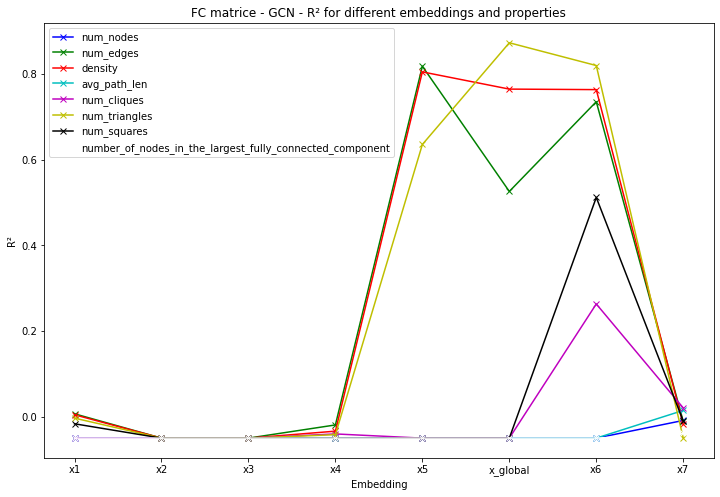

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7'] #, 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2_plot.png")


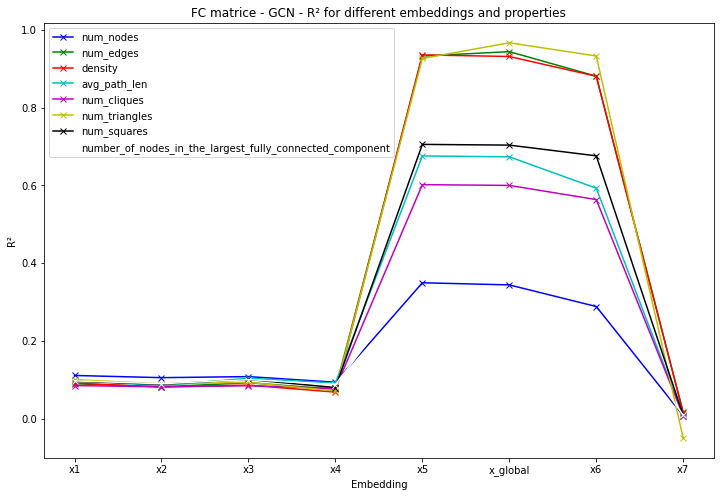

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7'] #, 'x8']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig("results/"+DATASET+"_"+MODEL+"train_R2_plot.png")

#### Test with more properties

In [21]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient
        ))
    return properties


train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)



Betweenness Centralization: 0.001724022477030078
PageRank Centralization: 0.011393522233220854
Average Clustering Coefficient: 0.46590185426058695
Transitivity: 0.5531747591900924
Betweenness Centralization: 0.0017261983853566708
PageRank Centralization: 0.008926832657320428
Average Clustering Coefficient: 0.5182009816568728
Transitivity: 0.5797223390828776
Betweenness Centralization: 0.003333083015572392
PageRank Centralization: 0.015313849504207902
Average Clustering Coefficient: 0.4704590487485227
Transitivity: 0.4714022140221402
Betweenness Centralization: 0.0010671877568257148
PageRank Centralization: 0.005223720319742302
Average Clustering Coefficient: 0.5604119583322708
Transitivity: 0.5464108308171812
Betweenness Centralization: 0.0022241433151757965
PageRank Centralization: 0.010110693464664746
Average Clustering Coefficient: 0.5817108880061148
Transitivity: 0.6164350158497928
Betweenness Centralization: 0.0008253715900658974
PageRank Centralization: 0.008937849000785932
Avera

Betweenness Centralization: 0.001078428822044226
PageRank Centralization: 0.009063561996750147
Average Clustering Coefficient: 0.5532543094005744
Transitivity: 0.5523364485981308
Betweenness Centralization: 0.001653614405354768
PageRank Centralization: 0.007032983882622251
Average Clustering Coefficient: 0.5508670653133515
Transitivity: 0.5519043035886154
Betweenness Centralization: 0.0015445362029709983
PageRank Centralization: 0.009370313296131976
Average Clustering Coefficient: 0.503380722715761
Transitivity: 0.5818673883626523
Betweenness Centralization: 0.0017807546976311142
PageRank Centralization: 0.009501326946814097
Average Clustering Coefficient: 0.4149566523606274
Transitivity: 0.4692404834926935
Betweenness Centralization: 0.0020229469275225478
PageRank Centralization: 0.007260008922385329
Average Clustering Coefficient: 0.5209656672192529
Transitivity: 0.5912332579579057
Betweenness Centralization: 0.0011742922774086507
PageRank Centralization: 0.0074486415980829805
Averag

Average Clustering Coefficient: 0.4677095114948748
Transitivity: 0.47178947368421054
Betweenness Centralization: 0.0012685107404340795
PageRank Centralization: 0.0068168393209759245
Average Clustering Coefficient: 0.5186194311514003
Transitivity: 0.5033734232912878
Betweenness Centralization: 0.0009491348124185677
PageRank Centralization: 0.006918374381046993
Average Clustering Coefficient: 0.48102698538622907
Transitivity: 0.4596774193548387
Betweenness Centralization: 0.0012768517676512569
PageRank Centralization: 0.012649930264661288
Average Clustering Coefficient: 0.5059288865619318
Transitivity: 0.4874008810572687
Betweenness Centralization: 0.0009213240690828585
PageRank Centralization: 0.010800485001101505
Average Clustering Coefficient: 0.4979806981681155
Transitivity: 0.5099398139704542
Betweenness Centralization: 0.002157265795254701
PageRank Centralization: 0.008179831460735679
Average Clustering Coefficient: 0.5752182147069974
Transitivity: 0.6369971075466737
Betweenness Ce

Betweenness Centralization: 0.0014654430088957636
PageRank Centralization: 0.007175270605341496
Average Clustering Coefficient: 0.5313838022553865
Transitivity: 0.5791930643547849
Betweenness Centralization: 0.0023295450822815385
PageRank Centralization: 0.007339947681879866
Average Clustering Coefficient: 0.4882268866324595
Transitivity: 0.49248774315989247
Betweenness Centralization: 0.0014804367483372718
PageRank Centralization: 0.006898064630729408
Average Clustering Coefficient: 0.4274698304110067
Transitivity: 0.4977714748784441
Betweenness Centralization: 0.0013696492907756873
PageRank Centralization: 0.006859673356675671
Average Clustering Coefficient: 0.4807573723501981
Transitivity: 0.5229514415781487
Betweenness Centralization: 0.0011823545553778186
PageRank Centralization: 0.008095825644688965
Average Clustering Coefficient: 0.48566923118476035
Transitivity: 0.5588270640548011
Betweenness Centralization: 0.0008939702680792592
PageRank Centralization: 0.0076129297104203415
A

Betweenness Centralization: 0.0007162682787337847
PageRank Centralization: 0.008947032081459878
Average Clustering Coefficient: 0.41375953274526434
Transitivity: 0.4521642619311876
Betweenness Centralization: 0.0011434019801239968
PageRank Centralization: 0.009548973385956892
Average Clustering Coefficient: 0.41876977368463436
Transitivity: 0.4487510766580534
Betweenness Centralization: 0.0015447532700325556
PageRank Centralization: 0.01063250198665506
Average Clustering Coefficient: 0.46562118234926914
Transitivity: 0.4886090278760436
Betweenness Centralization: 0.0010981793433088153
PageRank Centralization: 0.01043065988519064
Average Clustering Coefficient: 0.49216030073268235
Transitivity: 0.5008333333333334
Betweenness Centralization: 0.0010822288739901177
PageRank Centralization: 0.009496451064002627
Average Clustering Coefficient: 0.5314784783320485
Transitivity: 0.5385813782991202
Betweenness Centralization: 0.0016729574129879109
PageRank Centralization: 0.0066549582902010315
A

Betweenness Centralization: 0.0009281198376291561
PageRank Centralization: 0.00724683769501419
Average Clustering Coefficient: 0.5122449653285183
Transitivity: 0.5569395017793595
Betweenness Centralization: 0.0022617902301814673
PageRank Centralization: 0.009629642317162127
Average Clustering Coefficient: 0.45033410327527973
Transitivity: 0.6300099370652534
Betweenness Centralization: 0.0020996979398163096
PageRank Centralization: 0.008304006896864726
Average Clustering Coefficient: 0.41661745334311706
Transitivity: 0.4287369640787949
Betweenness Centralization: 0.0012498034543931896
PageRank Centralization: 0.008991904382429276
Average Clustering Coefficient: 0.4893009200889593
Transitivity: 0.552185089974293
Betweenness Centralization: 0.001452234410118574
PageRank Centralization: 0.006482523795419377
Average Clustering Coefficient: 0.4563749052879488
Transitivity: 0.4939879759519038
Betweenness Centralization: 0.002096665062687758
PageRank Centralization: 0.0080969452661344
Average 

PageRank Centralization: 0.007157924869643705
Average Clustering Coefficient: 0.4944544344544343
Transitivity: 0.504791620236238
Betweenness Centralization: 0.0006950915804825128
PageRank Centralization: 0.0058676434201165705
Average Clustering Coefficient: 0.4511632887087187
Transitivity: 0.45184036102101255
Betweenness Centralization: 0.00268997163384751
PageRank Centralization: 0.009619717764229523
Average Clustering Coefficient: 0.47187694034280314
Transitivity: 0.5198438516590761
Betweenness Centralization: 0.0008332279148941432
PageRank Centralization: 0.0072472085940706536
Average Clustering Coefficient: 0.5571264403057328
Transitivity: 0.538109907582232
Betweenness Centralization: 0.002518871285169076
PageRank Centralization: 0.0075200786598385305
Average Clustering Coefficient: 0.4690494610753231
Transitivity: 0.4968982630272953
Betweenness Centralization: 0.0026764000066434113
PageRank Centralization: 0.010067488615775723
Average Clustering Coefficient: 0.48331265947365004
Tr

Betweenness Centralization: 0.0014055379802366055
PageRank Centralization: 0.005585101263801825
Average Clustering Coefficient: 0.5240769477785061
Transitivity: 0.5414705404966726
Betweenness Centralization: 0.0024985181175632876
PageRank Centralization: 0.007848103983640765
Average Clustering Coefficient: 0.46933098209987806
Transitivity: 0.49395699262282217
Betweenness Centralization: 0.0008210593645557531
PageRank Centralization: 0.007822104940505191
Average Clustering Coefficient: 0.48953160246672156
Transitivity: 0.4874131944444444
Betweenness Centralization: 0.00199855712115177
PageRank Centralization: 0.008469836286737838
Average Clustering Coefficient: 0.6179367414303683
Transitivity: 0.6934878587196468
Betweenness Centralization: 0.000920021292518158
PageRank Centralization: 0.006558458990086776
Average Clustering Coefficient: 0.5271327413193283
Transitivity: 0.5668050495636703
Betweenness Centralization: 0.000812674541547123
PageRank Centralization: 0.008713141766060256
Avera

Betweenness Centralization: 0.001516910910773752
PageRank Centralization: 0.007526350559757753
Average Clustering Coefficient: 0.5066604959928422
Transitivity: 0.4933936022253129
Betweenness Centralization: 0.0023846473295612495
PageRank Centralization: 0.008042888596630106
Average Clustering Coefficient: 0.3866151866151865
Transitivity: 0.45572705117790413
Betweenness Centralization: 0.0016016469382373227
PageRank Centralization: 0.0053399077686798494
Average Clustering Coefficient: 0.5216941943268408
Transitivity: 0.5514465065502183
Betweenness Centralization: 0.0017179575163098497
PageRank Centralization: 0.011097825432126668
Average Clustering Coefficient: 0.49541768431087346
Transitivity: 0.49425947187141217
Betweenness Centralization: 0.001286746842070209
PageRank Centralization: 0.0077858984250753095
Average Clustering Coefficient: 0.5105042981635014
Transitivity: 0.5305766596089176
Betweenness Centralization: 0.0012700122504839522
PageRank Centralization: 0.0062287289296227046


Average Clustering Coefficient: 0.4240001786117657
Transitivity: 0.4571134020618557
Betweenness Centralization: 0.001166007175048415
PageRank Centralization: 0.00989421068041138
Average Clustering Coefficient: 0.45597644833192497
Transitivity: 0.4685908319185059
Betweenness Centralization: 0.002702588734957143
PageRank Centralization: 0.0067912353451892215
Average Clustering Coefficient: 0.5637214077814213
Transitivity: 0.5724394339170065
Betweenness Centralization: 0.0013901707371688072
PageRank Centralization: 0.008168479325963795
Average Clustering Coefficient: 0.49171251506155267
Transitivity: 0.5435333896872359
Betweenness Centralization: 0.0010519311987203695
PageRank Centralization: 0.00547314513454611
Average Clustering Coefficient: 0.5418529577198309
Transitivity: 0.5374882218333558
Betweenness Centralization: 0.002587003819778906
PageRank Centralization: 0.007814848548239115
Average Clustering Coefficient: 0.4451990198476406
Transitivity: 0.4886025768087215
Betweenness Centra

Betweenness Centralization: 0.0009217250623534495
PageRank Centralization: 0.007273530727523175
Average Clustering Coefficient: 0.5320536776785756
Transitivity: 0.5588415756534544
Betweenness Centralization: 0.0009380664996812389
PageRank Centralization: 0.009591047000934662
Average Clustering Coefficient: 0.4764856165772947
Transitivity: 0.4833555259653795
Betweenness Centralization: 0.0023251061920560967
PageRank Centralization: 0.009377143575738656
Average Clustering Coefficient: 0.5005424148744952
Transitivity: 0.552507426175083
Betweenness Centralization: 0.001815113961322378
PageRank Centralization: 0.009433360952540588
Average Clustering Coefficient: 0.45783372456774474
Transitivity: 0.5086599817684594
Betweenness Centralization: 0.0019091769595678502
PageRank Centralization: 0.006796858437248372
Average Clustering Coefficient: 0.45046395812649676
Transitivity: 0.4803788903924222
Betweenness Centralization: 0.0012379705816286913
PageRank Centralization: 0.009182013375959112
Aver

PageRank Centralization: 0.00993624123036884
Average Clustering Coefficient: 0.4509632121148336
Transitivity: 0.5024163568773234
Betweenness Centralization: 0.0010277611829384418
PageRank Centralization: 0.006075629868648715
Average Clustering Coefficient: 0.5200271217786161
Transitivity: 0.5268273199307683
Betweenness Centralization: 0.002136934699763706
PageRank Centralization: 0.009909813620584086
Average Clustering Coefficient: 0.5553716397051118
Transitivity: 0.6231974921630095
Betweenness Centralization: 0.000971711536526475
PageRank Centralization: 0.010589450842423508
Average Clustering Coefficient: 0.4810739094109491
Transitivity: 0.4468796433878158
Betweenness Centralization: 0.0014091235825892552
PageRank Centralization: 0.010444954527873787
Average Clustering Coefficient: 0.4977023059948084
Transitivity: 0.48409969918349804
Betweenness Centralization: 0.001794477208638177
PageRank Centralization: 0.010612906596771813
Average Clustering Coefficient: 0.44372681984911094
Trans

Betweenness Centralization: 0.0008637057092722818
PageRank Centralization: 0.006350297562790588
Average Clustering Coefficient: 0.46823060668133104
Transitivity: 0.4661532225374949
Betweenness Centralization: 0.0014277243347639904
PageRank Centralization: 0.00873520663242639
Average Clustering Coefficient: 0.4841393986130831
Transitivity: 0.4960221376686268
Betweenness Centralization: 0.0010307431039437566
PageRank Centralization: 0.007000915566459421
Average Clustering Coefficient: 0.5034403365374278
Transitivity: 0.5182947297750923
Betweenness Centralization: 0.0009504194890376085
PageRank Centralization: 0.007666336230690025
Average Clustering Coefficient: 0.4928862693568574
Transitivity: 0.5093497662558436
Betweenness Centralization: 0.0013976874449208837
PageRank Centralization: 0.007867531028245287
Average Clustering Coefficient: 0.46448007661562635
Transitivity: 0.4816
Betweenness Centralization: 0.001956189465092116
PageRank Centralization: 0.008335881827451869
Average Clusteri

Betweenness Centralization: 0.0024045696700124184
PageRank Centralization: 0.007040974093566359
Average Clustering Coefficient: 0.46764093606198887
Transitivity: 0.5448785638859557
Betweenness Centralization: 0.0008174002329832467
PageRank Centralization: 0.007495394432106658
Average Clustering Coefficient: 0.5599020603717252
Transitivity: 0.5669572107765452
Betweenness Centralization: 0.0011550069024147246
PageRank Centralization: 0.005499582004745223
Average Clustering Coefficient: 0.5684896818998788
Transitivity: 0.5645106382978723
Betweenness Centralization: 0.0019460209510531274
PageRank Centralization: 0.00913982659666422
Average Clustering Coefficient: 0.4552153906699358
Transitivity: 0.4924969987995198
Betweenness Centralization: 0.0010246359021929472
PageRank Centralization: 0.00915216397198698
Average Clustering Coefficient: 0.4661218101478001
Transitivity: 0.4780077619663648
Betweenness Centralization: 0.001665419114331508
PageRank Centralization: 0.006442575583806387
Averag

PageRank Centralization: 0.009143329673508031
Average Clustering Coefficient: 0.45403185073846103
Transitivity: 0.550351288056206
Betweenness Centralization: 0.0022497419797673705
PageRank Centralization: 0.010577522638770574
Average Clustering Coefficient: 0.48934060808153246
Transitivity: 0.523167649536647
Betweenness Centralization: 0.0010416665692794963
PageRank Centralization: 0.009456332602624153
Average Clustering Coefficient: 0.47996138604524435
Transitivity: 0.44419134396355353
Betweenness Centralization: 0.0014348914135937838
PageRank Centralization: 0.006506707383036154
Average Clustering Coefficient: 0.5480483917179709
Transitivity: 0.5884944920440637
Betweenness Centralization: 0.0016108831068990961
PageRank Centralization: 0.010909668112844531
Average Clustering Coefficient: 0.4718958288523974
Transitivity: 0.49524534043362495
Betweenness Centralization: 0.0025346137103585548
PageRank Centralization: 0.006383692921346192
Average Clustering Coefficient: 0.48112751982317176

PageRank Centralization: 0.008273162445901639
Average Clustering Coefficient: 0.43336446825386554
Transitivity: 0.5583825533848251
Betweenness Centralization: 0.0013593724269257367
PageRank Centralization: 0.007005269015285417
Average Clustering Coefficient: 0.4763324333430826
Transitivity: 0.47253192783296166
Betweenness Centralization: 0.0013939390950445589
PageRank Centralization: 0.009756231258349225
Average Clustering Coefficient: 0.45117433848083993
Transitivity: 0.44441424300081545
Betweenness Centralization: 0.0013066641100757171
PageRank Centralization: 0.00730245473729613
Average Clustering Coefficient: 0.46792182010717454
Transitivity: 0.4788553259141494
Betweenness Centralization: 0.0017403484403489041
PageRank Centralization: 0.00725847115095443
Average Clustering Coefficient: 0.464525297934389
Transitivity: 0.48897795591182364
Betweenness Centralization: 0.0070442619307324586
PageRank Centralization: 0.01661127390447105
Average Clustering Coefficient: 0.4607135814746503
T

Betweenness Centralization: 0.0016856775824563843
PageRank Centralization: 0.00908184356799375
Average Clustering Coefficient: 0.5344447553895805
Transitivity: 0.5570987654320988
Betweenness Centralization: 0.0018756753359639214
PageRank Centralization: 0.010505896463184783
Average Clustering Coefficient: 0.47150849892828517
Transitivity: 0.5328220858895706
Betweenness Centralization: 0.0010453933737133542
PageRank Centralization: 0.007292774971451604
Average Clustering Coefficient: 0.5607630613742874
Transitivity: 0.6013860369609856
Betweenness Centralization: 0.0018181391287013225
PageRank Centralization: 0.009819860146188675
Average Clustering Coefficient: 0.4086637544127936
Transitivity: 0.4463873309138898
Betweenness Centralization: 0.0013503046416461972
PageRank Centralization: 0.009872585902384044
Average Clustering Coefficient: 0.495386159536545
Transitivity: 0.5170704845814978
Betweenness Centralization: 0.0034806531808260917
PageRank Centralization: 0.014161262687004829
Avera

Betweenness Centralization: 0.0020113284584052458
PageRank Centralization: 0.007722101339860075
Average Clustering Coefficient: 0.541762365601375
Transitivity: 0.5532017332691381
Betweenness Centralization: 0.0017224415229168152
PageRank Centralization: 0.007477184725607194
Average Clustering Coefficient: 0.5367652983112666
Transitivity: 0.5690537084398977
Betweenness Centralization: 0.001767474025081739
PageRank Centralization: 0.007992790262564123
Average Clustering Coefficient: 0.4700049721445603
Transitivity: 0.4904831625183016
Betweenness Centralization: 0.0016328465196567194
PageRank Centralization: 0.008621646590585837
Average Clustering Coefficient: 0.5300937959682707
Transitivity: 0.5120593692022264
Betweenness Centralization: 0.0013599217822177058
PageRank Centralization: 0.005178469079161085
Average Clustering Coefficient: 0.5249640037672492
Transitivity: 0.5316221765913758
Betweenness Centralization: 0.0024663977600206436
PageRank Centralization: 0.009106253167004516
Averag

Betweenness Centralization: 0.0008871552674759707
PageRank Centralization: 0.009317613594688488
Average Clustering Coefficient: 0.4462734282178723
Transitivity: 0.41712204007285975
Betweenness Centralization: 0.0023783017721370047
PageRank Centralization: 0.014182614172205487
Average Clustering Coefficient: 0.39454244861692256
Transitivity: 0.48103245991396165
Betweenness Centralization: 0.0015876179105996013
PageRank Centralization: 0.006915600388367125
Average Clustering Coefficient: 0.5146113632955738
Transitivity: 0.47149972329828443
Betweenness Centralization: 0.001781738554614315
PageRank Centralization: 0.007591241853221838
Average Clustering Coefficient: 0.48088565705198566
Transitivity: 0.4888496356811658
Betweenness Centralization: 0.0008300319872168662
PageRank Centralization: 0.006816871534742043
Average Clustering Coefficient: 0.496679373321232
Transitivity: 0.5503430892031929
Betweenness Centralization: 0.0008196102991528209
PageRank Centralization: 0.009163350524141854
A

Betweenness Centralization: 0.0013461253659027526
PageRank Centralization: 0.006015980431239109
Average Clustering Coefficient: 0.4003437625176755
Transitivity: 0.4754262788365095
Betweenness Centralization: 0.001354877126168362
PageRank Centralization: 0.008362501892887843
Average Clustering Coefficient: 0.4832951717222815
Transitivity: 0.5417417417417417
Betweenness Centralization: 0.0019905387441417365
PageRank Centralization: 0.012432968866157048
Average Clustering Coefficient: 0.34220174270174253
Transitivity: 0.39227895392278955
Betweenness Centralization: 0.003180094617313811
PageRank Centralization: 0.01323578618697142
Average Clustering Coefficient: 0.5113408083144926
Transitivity: 0.47238805970149256
Betweenness Centralization: 0.0017256439329562693
PageRank Centralization: 0.008567501625708827
Average Clustering Coefficient: 0.5377323980938903
Transitivity: 0.5439469320066335
Betweenness Centralization: 0.0026612851276239533
PageRank Centralization: 0.007108045370697871
Aver

Betweenness Centralization: 0.00202867613423292
PageRank Centralization: 0.009813737762754448
Average Clustering Coefficient: 0.4410444655477634
Transitivity: 0.5445456565207731
Betweenness Centralization: 0.0007142165600526212
PageRank Centralization: 0.007212055387373667
Average Clustering Coefficient: 0.5117080935639147
Transitivity: 0.4988516306844281
Betweenness Centralization: 0.001330600828298656
PageRank Centralization: 0.007252068114920443
Average Clustering Coefficient: 0.501836945379145
Transitivity: 0.5426267281105991
Betweenness Centralization: 0.0013214345177474374
PageRank Centralization: 0.011836695445702074
Average Clustering Coefficient: 0.45097654687507704
Transitivity: 0.5001577287066246
Betweenness Centralization: 0.0017327051467613986
PageRank Centralization: 0.009163646101507283
Average Clustering Coefficient: 0.34774598490194825
Transitivity: 0.42534246575342466
Betweenness Centralization: 0.0011085032118464796
PageRank Centralization: 0.010507991620581095
Avera

Betweenness Centralization: 0.0018087026218641929
PageRank Centralization: 0.009021034162388255
Average Clustering Coefficient: 0.4630876980365473
Transitivity: 0.4902141802067947
Betweenness Centralization: 0.0016533376479063052
PageRank Centralization: 0.008152086178724576
Average Clustering Coefficient: 0.5033589702650143
Transitivity: 0.5011638316920323
Betweenness Centralization: 0.0019714566431439044
PageRank Centralization: 0.00614155664069917
Average Clustering Coefficient: 0.5144277461668766
Transitivity: 0.5209187858900738
Betweenness Centralization: 0.0012205075773318351
PageRank Centralization: 0.011501601231666258
Average Clustering Coefficient: 0.44029188608834613
Transitivity: 0.423602853745541
Betweenness Centralization: 0.00243979950234664
PageRank Centralization: 0.007348304480693434
Average Clustering Coefficient: 0.5058100336977341
Transitivity: 0.6015158474965548
Betweenness Centralization: 0.0011041202274880775
PageRank Centralization: 0.008227530348479525
Average

Betweenness Centralization: 0.0018201359874787156
PageRank Centralization: 0.008460297082263856
Average Clustering Coefficient: 0.4826679238814408
Transitivity: 0.504950495049505
Betweenness Centralization: 0.002051952630925557
PageRank Centralization: 0.010858669251144443
Average Clustering Coefficient: 0.42320778836009926
Transitivity: 0.47807288449660285
Betweenness Centralization: 0.0014541801683563254
PageRank Centralization: 0.008761930304871155
Average Clustering Coefficient: 0.49183145848967347
Transitivity: 0.4991715976331361
Betweenness Centralization: 0.0028360307224051013
PageRank Centralization: 0.0061930027591205255
Average Clustering Coefficient: 0.4450344546326689
Transitivity: 0.5451127819548872
Betweenness Centralization: 0.0018044420389064205
PageRank Centralization: 0.008448310165054668
Average Clustering Coefficient: 0.44032132042967953
Transitivity: 0.5016270337922403
Betweenness Centralization: 0.0013245235178387512
PageRank Centralization: 0.004942579077278136
A

Betweenness Centralization: 0.0014638511351939708
PageRank Centralization: 0.008661847717233256
Average Clustering Coefficient: 0.5167356234498516
Transitivity: 0.5475487300649734
Betweenness Centralization: 0.0014102197443338204
PageRank Centralization: 0.005800143760952389
Average Clustering Coefficient: 0.5245073979728712
Transitivity: 0.5486008836524301
Betweenness Centralization: 0.0017885124033258774
PageRank Centralization: 0.00679621096531839
Average Clustering Coefficient: 0.5877295475210763
Transitivity: 0.6386360548838473
Betweenness Centralization: 0.0013537351854541722
PageRank Centralization: 0.008818736170199739
Average Clustering Coefficient: 0.46282878628079854
Transitivity: 0.46585434967412864
Betweenness Centralization: 0.0011540564123322134
PageRank Centralization: 0.00654852011557559
Average Clustering Coefficient: 0.4584192491760282
Transitivity: 0.4619460500963391
Betweenness Centralization: 0.0026462073876146433
PageRank Centralization: 0.007831809269030458
Aver

Betweenness Centralization: 0.0021010019279609155
PageRank Centralization: 0.005030353056746262
Average Clustering Coefficient: 0.568382728699251
Transitivity: 0.5882778581765558
Betweenness Centralization: 0.002945286284485716
PageRank Centralization: 0.011509264380348582
Average Clustering Coefficient: 0.46805048297760427
Transitivity: 0.509526938239159
Betweenness Centralization: 0.0009839729896768208
PageRank Centralization: 0.0060578904435426364
Average Clustering Coefficient: 0.5246284307517313
Transitivity: 0.5452979181622398
Betweenness Centralization: 0.001351713748682092
PageRank Centralization: 0.006817835397595042
Average Clustering Coefficient: 0.5330934063602131
Transitivity: 0.5249563021946009
Betweenness Centralization: 0.0014282353577177633
PageRank Centralization: 0.007416875537778713
Average Clustering Coefficient: 0.4785314057773338
Transitivity: 0.5400106932810551
Betweenness Centralization: 0.0010316041430663509
PageRank Centralization: 0.00860785593163222
Average

Betweenness Centralization: 0.0011924171575782014
PageRank Centralization: 0.006520220316963459
Average Clustering Coefficient: 0.502038997008037
Transitivity: 0.508293287862347
Betweenness Centralization: 0.0008634123690006388
PageRank Centralization: 0.006708728487108755
Average Clustering Coefficient: 0.47610746093718215
Transitivity: 0.4782608695652174
Betweenness Centralization: 0.000992912363149209
PageRank Centralization: 0.007352101318158062
Average Clustering Coefficient: 0.5151500480014238
Transitivity: 0.542997542997543
Betweenness Centralization: 0.002154295831603067
PageRank Centralization: 0.010053923210131287
Average Clustering Coefficient: 0.4654667585415505
Transitivity: 0.5074013157894737
Betweenness Centralization: 0.0013296213647828053
PageRank Centralization: 0.007689142376348121
Average Clustering Coefficient: 0.5139498295725493
Transitivity: 0.5600059781796443
Betweenness Centralization: 0.002770158536525421
PageRank Centralization: 0.009289717850706414
Average C

Betweenness Centralization: 0.0013379507809817095
PageRank Centralization: 0.008467516232915685
Average Clustering Coefficient: 0.5275623990443825
Transitivity: 0.5552902739381754
Betweenness Centralization: 0.001583385522846357
PageRank Centralization: 0.008233305264619607
Average Clustering Coefficient: 0.49476767799821303
Transitivity: 0.5863593305967792
Betweenness Centralization: 0.0016347367408760672
PageRank Centralization: 0.00813269855164884
Average Clustering Coefficient: 0.4886480648494378
Transitivity: 0.4900380228136882
Betweenness Centralization: 0.0010023292907494043
PageRank Centralization: 0.008160120621369019
Average Clustering Coefficient: 0.48061459022287645
Transitivity: 0.4894878706199461
Betweenness Centralization: 0.0015829800379157611
PageRank Centralization: 0.006635329131324629
Average Clustering Coefficient: 0.5318217956616056
Transitivity: 0.5531635168447001
Betweenness Centralization: 0.0029656621462989695
PageRank Centralization: 0.010762894605546506
Aver

Betweenness Centralization: 0.0011143356486359233
PageRank Centralization: 0.008613578607170156
Average Clustering Coefficient: 0.4962934684617187
Transitivity: 0.4937388193202147
Betweenness Centralization: 0.0008892679629033581
PageRank Centralization: 0.007240255391274555
Average Clustering Coefficient: 0.5434549545371824
Transitivity: 0.5155453363990803
Betweenness Centralization: 0.0018627244239548418
PageRank Centralization: 0.007428719290951967
Average Clustering Coefficient: 0.5183264748667225
Transitivity: 0.4933873720136519
Betweenness Centralization: 0.0012350135717390976
PageRank Centralization: 0.009353707275613826
Average Clustering Coefficient: 0.4189366653742922
Transitivity: 0.4959083469721768
Betweenness Centralization: 0.0016445674761078367
PageRank Centralization: 0.0079872427680158
Average Clustering Coefficient: 0.5427111532909061
Transitivity: 0.5390659100829333
Betweenness Centralization: 0.0015388914949475984
PageRank Centralization: 0.00650579466157904
Average

PageRank Centralization: 0.006551894645281697
Average Clustering Coefficient: 0.5481699005739928
Transitivity: 0.5498549673676577
Betweenness Centralization: 0.0015853564393954812
PageRank Centralization: 0.00741589177474003
Average Clustering Coefficient: 0.4615996948814283
Transitivity: 0.45771693530580704
Betweenness Centralization: 0.0012486010261372835
PageRank Centralization: 0.0073055885849242705
Average Clustering Coefficient: 0.48583308207118625
Transitivity: 0.5483451097062105
Betweenness Centralization: 0.0021973812799885957
PageRank Centralization: 0.011182642116796032
Average Clustering Coefficient: 0.5387153875177308
Transitivity: 0.5824577432617634
Betweenness Centralization: 0.0014637084528843765
PageRank Centralization: 0.008717282082864321
Average Clustering Coefficient: 0.47309137378593125
Transitivity: 0.4914442162902122
Betweenness Centralization: 0.001850640901880779
PageRank Centralization: 0.00962667493437238
Average Clustering Coefficient: 0.5285684586430079
Tr

Betweenness Centralization: 0.0009472422156525138
PageRank Centralization: 0.009744465789240505
Average Clustering Coefficient: 0.512134557934936
Transitivity: 0.5065540990890913
Betweenness Centralization: 0.0014458822499461934
PageRank Centralization: 0.00707447849683341
Average Clustering Coefficient: 0.46180780572084923
Transitivity: 0.45569620253164556
Betweenness Centralization: 0.0013979064881632602
PageRank Centralization: 0.007846147171860529
Average Clustering Coefficient: 0.5088957170425157
Transitivity: 0.521557719054242
Betweenness Centralization: 0.0014128895904302352
PageRank Centralization: 0.007317694963814426
Average Clustering Coefficient: 0.4243951485022913
Transitivity: 0.43566176470588236
Betweenness Centralization: 0.0010183868538225756
PageRank Centralization: 0.006236768298432315
Average Clustering Coefficient: 0.5168859525482221
Transitivity: 0.5470912431108389
Betweenness Centralization: 0.003388877687448954
PageRank Centralization: 0.010740217375318866
Avera

Betweenness Centralization: 0.0019242628019987482
PageRank Centralization: 0.0078933341462205
Average Clustering Coefficient: 0.437255254665969
Transitivity: 0.4404833836858006
Betweenness Centralization: 0.0014211730657048124
PageRank Centralization: 0.008409562943989196
Average Clustering Coefficient: 0.49054520377872657
Transitivity: 0.5700258397932817
Betweenness Centralization: 0.0016015888608094807
PageRank Centralization: 0.008690623973229263
Average Clustering Coefficient: 0.5515680074517951
Transitivity: 0.5680586547656997
Betweenness Centralization: 0.0011152757709308823
PageRank Centralization: 0.006271841501676609
Average Clustering Coefficient: 0.48315944816959006
Transitivity: 0.49604933513201
Betweenness Centralization: 0.0014292724449325037
PageRank Centralization: 0.00993291157293805
Average Clustering Coefficient: 0.4742735744374238
Transitivity: 0.5309236947791165
Betweenness Centralization: 0.0014965941334372744
PageRank Centralization: 0.01258466277465926
Average C

Betweenness Centralization: 0.0008226177303661111
PageRank Centralization: 0.007698642714311928
Average Clustering Coefficient: 0.4982246616170547
Transitivity: 0.5463705308775731
Betweenness Centralization: 0.001885348652448179
PageRank Centralization: 0.014451840935601824
Average Clustering Coefficient: 0.4269826246251854
Transitivity: 0.44281976296752346
Betweenness Centralization: 0.0016893666604143266
PageRank Centralization: 0.007261296426249012
Average Clustering Coefficient: 0.4895942907095146
Transitivity: 0.5292717753450737
Betweenness Centralization: 0.0018209978285594372
PageRank Centralization: 0.00897324572453724
Average Clustering Coefficient: 0.4776766954642951
Transitivity: 0.5410855635130042
Betweenness Centralization: 0.0012753723987881404
PageRank Centralization: 0.007274189747062118
Average Clustering Coefficient: 0.43347151119790084
Transitivity: 0.5371937639198219
Betweenness Centralization: 0.0018873677135838164
PageRank Centralization: 0.013900461549921276
Aver

Betweenness Centralization: 0.0012422850521366885
PageRank Centralization: 0.010539207884562881
Average Clustering Coefficient: 0.5221324176132278
Transitivity: 0.5449548488417746
Betweenness Centralization: 0.002079509050382154
PageRank Centralization: 0.00862122397216339
Average Clustering Coefficient: 0.4904713791391004
Transitivity: 0.5386548125241593
Betweenness Centralization: 0.0017082454844297328
PageRank Centralization: 0.007257419814688709
Average Clustering Coefficient: 0.5042735176880524
Transitivity: 0.5379715825575698
Betweenness Centralization: 0.001079859727098108
PageRank Centralization: 0.007172021658469183
Average Clustering Coefficient: 0.5102042836349443
Transitivity: 0.48226221079691517
Betweenness Centralization: 0.0012215599777280182
PageRank Centralization: 0.009627955726328253
Average Clustering Coefficient: 0.4894410093462882
Transitivity: 0.5043808894032071
Betweenness Centralization: 0.0011317265369667152
PageRank Centralization: 0.009382661878394582
Averag

Betweenness Centralization: 0.0013304051363212306
PageRank Centralization: 0.011308031231303485
Average Clustering Coefficient: 0.4684671436335595
Transitivity: 0.47487270312154084
Betweenness Centralization: 0.0011575301340351622
PageRank Centralization: 0.007508765687592212
Average Clustering Coefficient: 0.564576465269958
Transitivity: 0.5786350148367952
Betweenness Centralization: 0.0011720199531485163
PageRank Centralization: 0.009914984287476005
Average Clustering Coefficient: 0.4400846687742695
Transitivity: 0.46696665984863983
Betweenness Centralization: 0.0020427746935174295
PageRank Centralization: 0.008514572099399582
Average Clustering Coefficient: 0.458322257664363
Transitivity: 0.5150893641957223
Betweenness Centralization: 0.0009497320032780242
PageRank Centralization: 0.007539961831863514
Average Clustering Coefficient: 0.4868892026841561
Transitivity: 0.4892683691054363
Betweenness Centralization: 0.0017553668978511963
PageRank Centralization: 0.007050286215844919
Aver

Betweenness Centralization: 0.0012417635259602757
PageRank Centralization: 0.007623680145143383
Average Clustering Coefficient: 0.5915816828385075
Transitivity: 0.6449089978802719
Betweenness Centralization: 0.0013954038255213693
PageRank Centralization: 0.006993729299675583
Average Clustering Coefficient: 0.5095662039012424
Transitivity: 0.5204366000928936
Betweenness Centralization: 0.0015868546427589758
PageRank Centralization: 0.008883798900057973
Average Clustering Coefficient: 0.45325290131324597
Transitivity: 0.45181255526083114
Betweenness Centralization: 0.0023466568829991195
PageRank Centralization: 0.008319393588301267
Average Clustering Coefficient: 0.4301510682041654
Transitivity: 0.4356193142057383
Betweenness Centralization: 0.002862916203205466
PageRank Centralization: 0.013808503447373773
Average Clustering Coefficient: 0.26507936507936497
Transitivity: 0.35
Betweenness Centralization: 0.001929097615535771
PageRank Centralization: 0.010670642573089882
Average Clusterin

In [22]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7216685/ipykernel_2371535/1310961172.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 5845.6709
Epoch [2000/800000], Property: num_nodes, Loss: 3225.6165
Epoch [3000/800000], Property: num_nodes, Loss: 2067.6055
Epoch [4000/800000], Property: num_nodes, Loss: 1315.7389
Epoch [5000/800000], Property: num_nodes, Loss: 809.9819
Epoch [6000/800000], Property: num_nodes, Loss: 494.9625
Epoch [7000/800000], Property: num_nodes, Loss: 327.7167
Epoch [8000/800000], Property: num_nodes, Loss: 250.6606
Epoch [9000/800000], Property: num_nodes, Loss: 210.9350
Epoch [10000/800000], Property: num_nodes, Loss: 182.3801
Epoch [11000/800000], Property: num_nodes, Loss: 158.3209
Epoch [12000/800000], Property: num_nodes, Loss: 138.1353
Epoch [13000/800000], Property: num_nodes, Loss: 121.9532
Epoch [14000/800000], Property: num_nodes, Loss: 109.3171
Epoch [15000/800000], Property: num_nodes, Loss: 99.5962
Epoch [16000/800000], Property: num_nodes, Loss: 92.2236
Epoch [17000/800000], Property: num_nodes, Loss: 86.6172
Epoch [18000/800000], 

Epoch [12000/800000], Property: num_edges, Loss: 51133.5273
Epoch [13000/800000], Property: num_edges, Loss: 45710.7227
Epoch [14000/800000], Property: num_edges, Loss: 40922.1680
Epoch [15000/800000], Property: num_edges, Loss: 36685.9297
Epoch [16000/800000], Property: num_edges, Loss: 32962.7070
Epoch [17000/800000], Property: num_edges, Loss: 29734.8945
Epoch [18000/800000], Property: num_edges, Loss: 26983.2812
Epoch [19000/800000], Property: num_edges, Loss: 24681.6328
Epoch [20000/800000], Property: num_edges, Loss: 22794.7324
Epoch [21000/800000], Property: num_edges, Loss: 21282.8926
Epoch [22000/800000], Property: num_edges, Loss: 20095.2090
Epoch [23000/800000], Property: num_edges, Loss: 19177.6211
Epoch [24000/800000], Property: num_edges, Loss: 18477.5723
Epoch [25000/800000], Property: num_edges, Loss: 17945.1660
Epoch [26000/800000], Property: num_edges, Loss: 17532.0020
Epoch [27000/800000], Property: num_edges, Loss: 17198.4043
Epoch [28000/800000], Property: num_edge

Epoch [148000/800000], Property: num_edges, Loss: 13148.8506
Epoch [149000/800000], Property: num_edges, Loss: 13144.3779
Epoch [150000/800000], Property: num_edges, Loss: 13139.9199
Epoch [151000/800000], Property: num_edges, Loss: 13135.4775
Epoch [152000/800000], Property: num_edges, Loss: 13131.0439
Epoch [153000/800000], Property: num_edges, Loss: 13126.6260
Epoch [154000/800000], Property: num_edges, Loss: 13122.2236
Epoch [155000/800000], Property: num_edges, Loss: 13117.8350
Epoch [156000/800000], Property: num_edges, Loss: 13113.4590
Epoch [157000/800000], Property: num_edges, Loss: 13109.0967
Epoch [158000/800000], Property: num_edges, Loss: 13104.7471
Epoch [159000/800000], Property: num_edges, Loss: 13100.4121
Epoch [160000/800000], Property: num_edges, Loss: 13096.0928
Epoch [161000/800000], Property: num_edges, Loss: 13091.7842
Epoch [162000/800000], Property: num_edges, Loss: 13087.4922
Epoch [163000/800000], Property: num_edges, Loss: 13083.2119
Epoch [164000/800000], P

Epoch [283000/800000], Property: num_edges, Loss: 12668.7422
Epoch [284000/800000], Property: num_edges, Loss: 12666.0918
Epoch [285000/800000], Property: num_edges, Loss: 12663.4551
Epoch [286000/800000], Property: num_edges, Loss: 12660.8340
Epoch [287000/800000], Property: num_edges, Loss: 12658.2256
Epoch [288000/800000], Property: num_edges, Loss: 12655.6318
Epoch [289000/800000], Property: num_edges, Loss: 12653.0527
Epoch [290000/800000], Property: num_edges, Loss: 12650.4873
Epoch [291000/800000], Property: num_edges, Loss: 12647.9365
Epoch [292000/800000], Property: num_edges, Loss: 12645.3994
Epoch [293000/800000], Property: num_edges, Loss: 12642.8789
Epoch [294000/800000], Property: num_edges, Loss: 12640.3691
Epoch [295000/800000], Property: num_edges, Loss: 12637.8750
Epoch [296000/800000], Property: num_edges, Loss: 12635.3945
Epoch [297000/800000], Property: num_edges, Loss: 12632.9297
Epoch [298000/800000], Property: num_edges, Loss: 12630.4775
Epoch [299000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 12440.8301
Epoch [419000/800000], Property: num_edges, Loss: 12440.0908
Epoch [420000/800000], Property: num_edges, Loss: 12439.3613
Epoch [421000/800000], Property: num_edges, Loss: 12438.6504
Epoch [422000/800000], Property: num_edges, Loss: 12437.9463
Epoch [423000/800000], Property: num_edges, Loss: 12437.2598
Epoch [424000/800000], Property: num_edges, Loss: 12436.5869
Epoch [425000/800000], Property: num_edges, Loss: 12435.9248
Epoch [426000/800000], Property: num_edges, Loss: 12435.2773
Epoch [427000/800000], Property: num_edges, Loss: 12434.6445
Epoch [428000/800000], Property: num_edges, Loss: 12434.0234
Epoch [429000/800000], Property: num_edges, Loss: 12433.4170
Epoch [430000/800000], Property: num_edges, Loss: 12432.8223
Epoch [431000/800000], Property: num_edges, Loss: 12432.2412
Epoch [432000/800000], Property: num_edges, Loss: 12431.6758
Epoch [433000/800000], Property: num_edges, Loss: 12431.1201
Epoch [434000/800000], P

Epoch [8000/800000], Property: clustering_coeff, Loss: 0.0020
Early stopping at epoch 8356
Embedding: torch.Size([1523, 128])
Property: clustering_coeff
  Train MSE: 0.0020, Test MSE: 0.0026
  Train R²: 0.0984, Test R²: -0.0455
Epoch [1000/800000], Property: transitivity, Loss: 0.0043
Epoch [2000/800000], Property: transitivity, Loss: 0.0033
Epoch [3000/800000], Property: transitivity, Loss: 0.0029
Epoch [4000/800000], Property: transitivity, Loss: 0.0026
Epoch [5000/800000], Property: transitivity, Loss: 0.0026
Epoch [6000/800000], Property: transitivity, Loss: 0.0026
Epoch [7000/800000], Property: transitivity, Loss: 0.0026
Epoch [8000/800000], Property: transitivity, Loss: 0.0026
Early stopping at epoch 8701
Embedding: torch.Size([1523, 128])
Property: transitivity
  Train MSE: 0.0026, Test MSE: 0.0035
  Train R²: 0.0984, Test R²: -0.1325
Epoch [1000/800000], Property: assortativity, Loss: 0.0099
Epoch [2000/800000], Property: assortativity, Loss: 0.0091
Epoch [3000/800000], Propert

Epoch [113000/800000], Property: num_cliques, Loss: 591.1224
Epoch [114000/800000], Property: num_cliques, Loss: 590.5509
Epoch [115000/800000], Property: num_cliques, Loss: 589.9927
Epoch [116000/800000], Property: num_cliques, Loss: 589.4479
Epoch [117000/800000], Property: num_cliques, Loss: 588.9165
Epoch [118000/800000], Property: num_cliques, Loss: 588.3984
Epoch [119000/800000], Property: num_cliques, Loss: 587.8936
Epoch [120000/800000], Property: num_cliques, Loss: 587.4022
Epoch [121000/800000], Property: num_cliques, Loss: 586.9260
Epoch [122000/800000], Property: num_cliques, Loss: 586.4647
Epoch [123000/800000], Property: num_cliques, Loss: 586.0166
Epoch [124000/800000], Property: num_cliques, Loss: 585.5817
Epoch [125000/800000], Property: num_cliques, Loss: 585.1599
Epoch [126000/800000], Property: num_cliques, Loss: 584.7512
Epoch [127000/800000], Property: num_cliques, Loss: 584.3557
Epoch [128000/800000], Property: num_cliques, Loss: 583.9733
Epoch [129000/800000], P

Epoch [77000/800000], Property: num_triangles, Loss: 341839.8438
Epoch [78000/800000], Property: num_triangles, Loss: 341417.4375
Epoch [79000/800000], Property: num_triangles, Loss: 341004.0312
Epoch [80000/800000], Property: num_triangles, Loss: 340599.5312
Epoch [81000/800000], Property: num_triangles, Loss: 340203.6250
Epoch [82000/800000], Property: num_triangles, Loss: 339816.0938
Epoch [83000/800000], Property: num_triangles, Loss: 339436.7812
Epoch [84000/800000], Property: num_triangles, Loss: 339065.3125
Epoch [85000/800000], Property: num_triangles, Loss: 338701.6250
Epoch [86000/800000], Property: num_triangles, Loss: 338345.5625
Epoch [87000/800000], Property: num_triangles, Loss: 337997.0000
Epoch [88000/800000], Property: num_triangles, Loss: 337655.6875
Epoch [89000/800000], Property: num_triangles, Loss: 337321.4688
Epoch [90000/800000], Property: num_triangles, Loss: 336994.0938
Epoch [91000/800000], Property: num_triangles, Loss: 336673.5312
Epoch [92000/800000], Pro

Epoch [202000/800000], Property: num_triangles, Loss: 321325.7500
Epoch [203000/800000], Property: num_triangles, Loss: 321268.8750
Epoch [204000/800000], Property: num_triangles, Loss: 321212.6875
Epoch [205000/800000], Property: num_triangles, Loss: 321157.2188
Epoch [206000/800000], Property: num_triangles, Loss: 321102.5000
Epoch [207000/800000], Property: num_triangles, Loss: 321048.3750
Epoch [208000/800000], Property: num_triangles, Loss: 320995.0000
Epoch [209000/800000], Property: num_triangles, Loss: 320942.2812
Epoch [210000/800000], Property: num_triangles, Loss: 320890.3438
Epoch [211000/800000], Property: num_triangles, Loss: 320839.0938
Epoch [212000/800000], Property: num_triangles, Loss: 320788.4375
Epoch [213000/800000], Property: num_triangles, Loss: 320738.5312
Epoch [214000/800000], Property: num_triangles, Loss: 320689.2188
Epoch [215000/800000], Property: num_triangles, Loss: 320640.5625
Epoch [216000/800000], Property: num_triangles, Loss: 320592.5000
Epoch [217

Epoch [327000/800000], Property: num_triangles, Loss: 318217.7188
Epoch [328000/800000], Property: num_triangles, Loss: 318208.9375
Epoch [329000/800000], Property: num_triangles, Loss: 318200.1562
Epoch [330000/800000], Property: num_triangles, Loss: 318191.4375
Epoch [331000/800000], Property: num_triangles, Loss: 318182.7500
Epoch [332000/800000], Property: num_triangles, Loss: 318174.1250
Epoch [333000/800000], Property: num_triangles, Loss: 318165.5000
Epoch [334000/800000], Property: num_triangles, Loss: 318156.9375
Epoch [335000/800000], Property: num_triangles, Loss: 318148.4062
Epoch [336000/800000], Property: num_triangles, Loss: 318139.9688
Epoch [337000/800000], Property: num_triangles, Loss: 318131.4688
Epoch [338000/800000], Property: num_triangles, Loss: 318123.0625
Epoch [339000/800000], Property: num_triangles, Loss: 318114.7188
Epoch [340000/800000], Property: num_triangles, Loss: 318106.4375
Epoch [341000/800000], Property: num_triangles, Loss: 318098.1562
Epoch [342

Epoch [452000/800000], Property: num_triangles, Loss: 317389.7500
Epoch [453000/800000], Property: num_triangles, Loss: 317384.5312
Epoch [454000/800000], Property: num_triangles, Loss: 317379.3750
Epoch [455000/800000], Property: num_triangles, Loss: 317374.1875
Epoch [456000/800000], Property: num_triangles, Loss: 317369.0312
Epoch [457000/800000], Property: num_triangles, Loss: 317363.9688
Epoch [458000/800000], Property: num_triangles, Loss: 317358.8438
Epoch [459000/800000], Property: num_triangles, Loss: 317353.7188
Epoch [460000/800000], Property: num_triangles, Loss: 317348.6562
Epoch [461000/800000], Property: num_triangles, Loss: 317343.5938
Epoch [462000/800000], Property: num_triangles, Loss: 317338.5000
Epoch [463000/800000], Property: num_triangles, Loss: 317333.4688
Epoch [464000/800000], Property: num_triangles, Loss: 317328.4375
Epoch [465000/800000], Property: num_triangles, Loss: 317323.4375
Epoch [466000/800000], Property: num_triangles, Loss: 317318.4062
Epoch [467

Epoch [577000/800000], Property: num_triangles, Loss: 316857.7500
Epoch [578000/800000], Property: num_triangles, Loss: 316854.3750
Epoch [579000/800000], Property: num_triangles, Loss: 316851.1250
Epoch [580000/800000], Property: num_triangles, Loss: 316847.7812
Epoch [581000/800000], Property: num_triangles, Loss: 316844.4688
Epoch [582000/800000], Property: num_triangles, Loss: 316841.1875
Epoch [583000/800000], Property: num_triangles, Loss: 316837.9375
Epoch [584000/800000], Property: num_triangles, Loss: 316834.6875
Epoch [585000/800000], Property: num_triangles, Loss: 316831.4062
Epoch [586000/800000], Property: num_triangles, Loss: 316828.1875
Epoch [587000/800000], Property: num_triangles, Loss: 316825.0000
Epoch [588000/800000], Property: num_triangles, Loss: 316821.8125
Epoch [589000/800000], Property: num_triangles, Loss: 316818.5938
Epoch [590000/800000], Property: num_triangles, Loss: 316815.4375
Epoch [591000/800000], Property: num_triangles, Loss: 316812.2812
Epoch [592

Epoch [702000/800000], Property: num_triangles, Loss: 316544.2812
Epoch [703000/800000], Property: num_triangles, Loss: 316542.6562
Epoch [704000/800000], Property: num_triangles, Loss: 316541.0000
Epoch [705000/800000], Property: num_triangles, Loss: 316539.3438
Epoch [706000/800000], Property: num_triangles, Loss: 316537.6875
Epoch [707000/800000], Property: num_triangles, Loss: 316536.0938
Epoch [708000/800000], Property: num_triangles, Loss: 316534.5312
Epoch [709000/800000], Property: num_triangles, Loss: 316532.9375
Epoch [710000/800000], Property: num_triangles, Loss: 316531.3438
Epoch [711000/800000], Property: num_triangles, Loss: 316529.7812
Epoch [712000/800000], Property: num_triangles, Loss: 316528.2500
Epoch [713000/800000], Property: num_triangles, Loss: 316526.6875
Epoch [714000/800000], Property: num_triangles, Loss: 316525.1875
Epoch [715000/800000], Property: num_triangles, Loss: 316523.7188
Epoch [716000/800000], Property: num_triangles, Loss: 316522.1875
Epoch [717

Epoch [6000/800000], Property: largest_component_size, Loss: 484.6380
Epoch [7000/800000], Property: largest_component_size, Loss: 323.9671
Epoch [8000/800000], Property: largest_component_size, Loss: 250.0560
Epoch [9000/800000], Property: largest_component_size, Loss: 211.4662
Epoch [10000/800000], Property: largest_component_size, Loss: 183.4236
Epoch [11000/800000], Property: largest_component_size, Loss: 159.7627
Epoch [12000/800000], Property: largest_component_size, Loss: 139.9417
Epoch [13000/800000], Property: largest_component_size, Loss: 124.0591
Epoch [14000/800000], Property: largest_component_size, Loss: 111.6539
Epoch [15000/800000], Property: largest_component_size, Loss: 102.1273
Epoch [16000/800000], Property: largest_component_size, Loss: 94.9252
Epoch [17000/800000], Property: largest_component_size, Loss: 89.4658
Epoch [18000/800000], Property: largest_component_size, Loss: 85.2920
Epoch [19000/800000], Property: largest_component_size, Loss: 82.1296
Epoch [20000/8

Epoch [123000/800000], Property: largest_component_size, Loss: 10.8094
Epoch [124000/800000], Property: largest_component_size, Loss: 10.8082
Epoch [125000/800000], Property: largest_component_size, Loss: 10.8080
Epoch [126000/800000], Property: largest_component_size, Loss: 10.8080
Epoch [127000/800000], Property: largest_component_size, Loss: 10.8080
Epoch [128000/800000], Property: largest_component_size, Loss: 10.8080
Early stopping at epoch 128985
Embedding: torch.Size([1523, 128])
Property: largest_component_size
  Train MSE: 10.8080, Test MSE: 22.8825
  Train R²: 0.0973, Test R²: -0.1230
Epoch [1000/800000], Property: avg_degree, Loss: 5.6085
Epoch [2000/800000], Property: avg_degree, Loss: 4.8450
Epoch [3000/800000], Property: avg_degree, Loss: 4.4677
Epoch [4000/800000], Property: avg_degree, Loss: 4.2395
Epoch [5000/800000], Property: avg_degree, Loss: 4.0902
Epoch [6000/800000], Property: avg_degree, Loss: 3.9763
Epoch [7000/800000], Property: avg_degree, Loss: 3.8840
Epoch 

Epoch [44000/800000], Property: graph_energy, Loss: 75048.6875
Epoch [45000/800000], Property: graph_energy, Loss: 73642.9297
Epoch [46000/800000], Property: graph_energy, Loss: 72427.2266
Epoch [47000/800000], Property: graph_energy, Loss: 71376.9688
Epoch [48000/800000], Property: graph_energy, Loss: 70467.0078
Epoch [49000/800000], Property: graph_energy, Loss: 69665.1875
Epoch [50000/800000], Property: graph_energy, Loss: 68938.3516
Epoch [51000/800000], Property: graph_energy, Loss: 68268.7188
Epoch [52000/800000], Property: graph_energy, Loss: 67648.0547
Epoch [53000/800000], Property: graph_energy, Loss: 67069.0391
Epoch [54000/800000], Property: graph_energy, Loss: 66527.6875
Epoch [55000/800000], Property: graph_energy, Loss: 66019.0859
Epoch [56000/800000], Property: graph_energy, Loss: 65537.1562
Epoch [57000/800000], Property: graph_energy, Loss: 65079.2031
Epoch [58000/800000], Property: graph_energy, Loss: 64643.5859
Epoch [59000/800000], Property: graph_energy, Loss: 642

Epoch [173000/800000], Property: graph_energy, Loss: 53764.1250
Epoch [174000/800000], Property: graph_energy, Loss: 53752.2148
Epoch [175000/800000], Property: graph_energy, Loss: 53740.4062
Epoch [176000/800000], Property: graph_energy, Loss: 53728.7031
Epoch [177000/800000], Property: graph_energy, Loss: 53717.0781
Epoch [178000/800000], Property: graph_energy, Loss: 53705.5508
Epoch [179000/800000], Property: graph_energy, Loss: 53694.1211
Epoch [180000/800000], Property: graph_energy, Loss: 53682.7695
Epoch [181000/800000], Property: graph_energy, Loss: 53671.5156
Epoch [182000/800000], Property: graph_energy, Loss: 53660.3594
Epoch [183000/800000], Property: graph_energy, Loss: 53649.2812
Epoch [184000/800000], Property: graph_energy, Loss: 53638.3047
Epoch [185000/800000], Property: graph_energy, Loss: 53627.3945
Epoch [186000/800000], Property: graph_energy, Loss: 53616.5820
Epoch [187000/800000], Property: graph_energy, Loss: 53605.8516
Epoch [188000/800000], Property: graph_e

Epoch [302000/800000], Property: graph_energy, Loss: 52495.3711
Epoch [303000/800000], Property: graph_energy, Loss: 52486.4414
Epoch [304000/800000], Property: graph_energy, Loss: 52477.5195
Epoch [305000/800000], Property: graph_energy, Loss: 52468.6172
Epoch [306000/800000], Property: graph_energy, Loss: 52459.7305
Epoch [307000/800000], Property: graph_energy, Loss: 52450.8594
Epoch [308000/800000], Property: graph_energy, Loss: 52441.9961
Epoch [309000/800000], Property: graph_energy, Loss: 52433.1445
Epoch [310000/800000], Property: graph_energy, Loss: 52424.3086
Epoch [311000/800000], Property: graph_energy, Loss: 52415.5000
Epoch [312000/800000], Property: graph_energy, Loss: 52406.6992
Epoch [313000/800000], Property: graph_energy, Loss: 52397.8984
Epoch [314000/800000], Property: graph_energy, Loss: 52389.1250
Epoch [315000/800000], Property: graph_energy, Loss: 52380.3633
Epoch [316000/800000], Property: graph_energy, Loss: 52371.6211
Epoch [317000/800000], Property: graph_e

Epoch [431000/800000], Property: graph_energy, Loss: 51460.3242
Epoch [432000/800000], Property: graph_energy, Loss: 51453.2266
Epoch [433000/800000], Property: graph_energy, Loss: 51446.1289
Epoch [434000/800000], Property: graph_energy, Loss: 51439.0586
Epoch [435000/800000], Property: graph_energy, Loss: 51431.9961
Epoch [436000/800000], Property: graph_energy, Loss: 51424.9570
Epoch [437000/800000], Property: graph_energy, Loss: 51417.9297
Epoch [438000/800000], Property: graph_energy, Loss: 51410.9102
Epoch [439000/800000], Property: graph_energy, Loss: 51403.9062
Epoch [440000/800000], Property: graph_energy, Loss: 51396.9180
Epoch [441000/800000], Property: graph_energy, Loss: 51389.9414
Epoch [442000/800000], Property: graph_energy, Loss: 51382.9844
Epoch [443000/800000], Property: graph_energy, Loss: 51376.0430
Epoch [444000/800000], Property: graph_energy, Loss: 51369.1133
Epoch [445000/800000], Property: graph_energy, Loss: 51362.1914
Epoch [446000/800000], Property: graph_e

Epoch [560000/800000], Property: graph_energy, Loss: 50668.3242
Epoch [561000/800000], Property: graph_energy, Loss: 50663.1953
Epoch [562000/800000], Property: graph_energy, Loss: 50658.0820
Epoch [563000/800000], Property: graph_energy, Loss: 50652.9727
Epoch [564000/800000], Property: graph_energy, Loss: 50647.8906
Epoch [565000/800000], Property: graph_energy, Loss: 50642.8047
Epoch [566000/800000], Property: graph_energy, Loss: 50637.7500
Epoch [567000/800000], Property: graph_energy, Loss: 50632.6992
Epoch [568000/800000], Property: graph_energy, Loss: 50627.6602
Epoch [569000/800000], Property: graph_energy, Loss: 50622.6445
Epoch [570000/800000], Property: graph_energy, Loss: 50617.6289
Epoch [571000/800000], Property: graph_energy, Loss: 50612.6328
Epoch [572000/800000], Property: graph_energy, Loss: 50607.6523
Epoch [573000/800000], Property: graph_energy, Loss: 50602.6797
Epoch [574000/800000], Property: graph_energy, Loss: 50597.7266
Epoch [575000/800000], Property: graph_e

Epoch [689000/800000], Property: graph_energy, Loss: 50116.7422
Epoch [690000/800000], Property: graph_energy, Loss: 50113.3359
Epoch [691000/800000], Property: graph_energy, Loss: 50109.9375
Epoch [692000/800000], Property: graph_energy, Loss: 50106.5547
Epoch [693000/800000], Property: graph_energy, Loss: 50103.1875
Epoch [694000/800000], Property: graph_energy, Loss: 50099.8281
Epoch [695000/800000], Property: graph_energy, Loss: 50096.4922
Epoch [696000/800000], Property: graph_energy, Loss: 50093.1641
Epoch [697000/800000], Property: graph_energy, Loss: 50089.8477
Epoch [698000/800000], Property: graph_energy, Loss: 50086.5391
Epoch [699000/800000], Property: graph_energy, Loss: 50083.2578
Epoch [700000/800000], Property: graph_energy, Loss: 50079.9805
Epoch [701000/800000], Property: graph_energy, Loss: 50076.7227
Epoch [702000/800000], Property: graph_energy, Loss: 50073.4727
Epoch [703000/800000], Property: graph_energy, Loss: 50070.2344
Epoch [704000/800000], Property: graph_e

Epoch [14000/800000], Property: small_world_coefficient, Loss: 0.8779
Epoch [15000/800000], Property: small_world_coefficient, Loss: 0.8779
Epoch [16000/800000], Property: small_world_coefficient, Loss: 0.8779
Epoch [17000/800000], Property: small_world_coefficient, Loss: 0.8779
Epoch [18000/800000], Property: small_world_coefficient, Loss: 0.8779
Early stopping at epoch 18448
Embedding: torch.Size([1523, 128])
Property: small_world_coefficient
  Train MSE: 0.8779, Test MSE: 1.0082
  Train R²: 0.0838, Test R²: -0.2011
Epoch [1000/800000], Property: num_nodes, Loss: 7744.4614
Epoch [2000/800000], Property: num_nodes, Loss: 5405.5845
Epoch [3000/800000], Property: num_nodes, Loss: 3821.6970
Epoch [4000/800000], Property: num_nodes, Loss: 2683.8181
Epoch [5000/800000], Property: num_nodes, Loss: 1812.7358
Epoch [6000/800000], Property: num_nodes, Loss: 1169.7792
Epoch [7000/800000], Property: num_nodes, Loss: 739.0859
Epoch [8000/800000], Property: num_nodes, Loss: 485.7737
Epoch [9000/80

Epoch [3000/800000], Property: num_edges, Loss: 195397.0156
Epoch [4000/800000], Property: num_edges, Loss: 178543.8906
Epoch [5000/800000], Property: num_edges, Loss: 163993.6406
Epoch [6000/800000], Property: num_edges, Loss: 150602.3438
Epoch [7000/800000], Property: num_edges, Loss: 138217.8438
Epoch [8000/800000], Property: num_edges, Loss: 126882.9297
Epoch [9000/800000], Property: num_edges, Loss: 116586.3203
Epoch [10000/800000], Property: num_edges, Loss: 107252.7500
Epoch [11000/800000], Property: num_edges, Loss: 98764.8047
Epoch [12000/800000], Property: num_edges, Loss: 90976.2031
Epoch [13000/800000], Property: num_edges, Loss: 83761.7891
Epoch [14000/800000], Property: num_edges, Loss: 77033.9766
Epoch [15000/800000], Property: num_edges, Loss: 70745.9219
Epoch [16000/800000], Property: num_edges, Loss: 64889.4883
Epoch [17000/800000], Property: num_edges, Loss: 59459.9023
Epoch [18000/800000], Property: num_edges, Loss: 54446.6875
Epoch [19000/800000], Property: num_edg

Epoch [139000/800000], Property: num_edges, Loss: 13305.1631
Epoch [140000/800000], Property: num_edges, Loss: 13300.2285
Epoch [141000/800000], Property: num_edges, Loss: 13295.3662
Epoch [142000/800000], Property: num_edges, Loss: 13290.5645
Epoch [143000/800000], Property: num_edges, Loss: 13285.8213
Epoch [144000/800000], Property: num_edges, Loss: 13281.1270
Epoch [145000/800000], Property: num_edges, Loss: 13276.4775
Epoch [146000/800000], Property: num_edges, Loss: 13271.8711
Epoch [147000/800000], Property: num_edges, Loss: 13267.3105
Epoch [148000/800000], Property: num_edges, Loss: 13262.7949
Epoch [149000/800000], Property: num_edges, Loss: 13258.3203
Epoch [150000/800000], Property: num_edges, Loss: 13253.8887
Epoch [151000/800000], Property: num_edges, Loss: 13249.5000
Epoch [152000/800000], Property: num_edges, Loss: 13245.1514
Epoch [153000/800000], Property: num_edges, Loss: 13240.8457
Epoch [154000/800000], Property: num_edges, Loss: 13236.5791
Epoch [155000/800000], P

Epoch [274000/800000], Property: num_edges, Loss: 12836.7969
Epoch [275000/800000], Property: num_edges, Loss: 12834.1328
Epoch [276000/800000], Property: num_edges, Loss: 12831.4785
Epoch [277000/800000], Property: num_edges, Loss: 12828.8369
Epoch [278000/800000], Property: num_edges, Loss: 12826.2051
Epoch [279000/800000], Property: num_edges, Loss: 12823.5850
Epoch [280000/800000], Property: num_edges, Loss: 12820.9785
Epoch [281000/800000], Property: num_edges, Loss: 12818.3838
Epoch [282000/800000], Property: num_edges, Loss: 12815.7979
Epoch [283000/800000], Property: num_edges, Loss: 12813.2236
Epoch [284000/800000], Property: num_edges, Loss: 12810.6660
Epoch [285000/800000], Property: num_edges, Loss: 12808.1152
Epoch [286000/800000], Property: num_edges, Loss: 12805.5762
Epoch [287000/800000], Property: num_edges, Loss: 12803.0527
Epoch [288000/800000], Property: num_edges, Loss: 12800.5381
Epoch [289000/800000], Property: num_edges, Loss: 12798.0342
Epoch [290000/800000], P

Epoch [409000/800000], Property: num_edges, Loss: 12583.0752
Epoch [410000/800000], Property: num_edges, Loss: 12582.0068
Epoch [411000/800000], Property: num_edges, Loss: 12580.9482
Epoch [412000/800000], Property: num_edges, Loss: 12579.9004
Epoch [413000/800000], Property: num_edges, Loss: 12578.8652
Epoch [414000/800000], Property: num_edges, Loss: 12577.8398
Epoch [415000/800000], Property: num_edges, Loss: 12576.8242
Epoch [416000/800000], Property: num_edges, Loss: 12575.8213
Epoch [417000/800000], Property: num_edges, Loss: 12574.8291
Epoch [418000/800000], Property: num_edges, Loss: 12573.8447
Epoch [419000/800000], Property: num_edges, Loss: 12572.8760
Epoch [420000/800000], Property: num_edges, Loss: 12571.9160
Epoch [421000/800000], Property: num_edges, Loss: 12570.9678
Epoch [422000/800000], Property: num_edges, Loss: 12570.0293
Epoch [423000/800000], Property: num_edges, Loss: 12569.1016
Epoch [424000/800000], Property: num_edges, Loss: 12568.1865
Epoch [425000/800000], P

Epoch [1000/800000], Property: diameter, Loss: 3.8849
Epoch [2000/800000], Property: diameter, Loss: 3.1688
Epoch [3000/800000], Property: diameter, Loss: 2.7858
Epoch [4000/800000], Property: diameter, Loss: 2.5424
Epoch [5000/800000], Property: diameter, Loss: 2.3906
Epoch [6000/800000], Property: diameter, Loss: 2.2879
Epoch [7000/800000], Property: diameter, Loss: 2.2109
Epoch [8000/800000], Property: diameter, Loss: 2.1511
Epoch [9000/800000], Property: diameter, Loss: 2.1024
Epoch [10000/800000], Property: diameter, Loss: 2.0598
Epoch [11000/800000], Property: diameter, Loss: 2.0217
Epoch [12000/800000], Property: diameter, Loss: 1.9889
Epoch [13000/800000], Property: diameter, Loss: 1.9628
Epoch [14000/800000], Property: diameter, Loss: 1.9440
Epoch [15000/800000], Property: diameter, Loss: 1.9321
Epoch [16000/800000], Property: diameter, Loss: 1.9257
Epoch [17000/800000], Property: diameter, Loss: 1.9232
Epoch [18000/800000], Property: diameter, Loss: 1.9226
Epoch [19000/800000

Epoch [60000/800000], Property: num_cliques, Loss: 634.4446
Epoch [61000/800000], Property: num_cliques, Loss: 633.3513
Epoch [62000/800000], Property: num_cliques, Loss: 632.2695
Epoch [63000/800000], Property: num_cliques, Loss: 631.1990
Epoch [64000/800000], Property: num_cliques, Loss: 630.1398
Epoch [65000/800000], Property: num_cliques, Loss: 629.0919
Epoch [66000/800000], Property: num_cliques, Loss: 628.0552
Epoch [67000/800000], Property: num_cliques, Loss: 627.0296
Epoch [68000/800000], Property: num_cliques, Loss: 626.0153
Epoch [69000/800000], Property: num_cliques, Loss: 625.0121
Epoch [70000/800000], Property: num_cliques, Loss: 624.0203
Epoch [71000/800000], Property: num_cliques, Loss: 623.0372
Epoch [72000/800000], Property: num_cliques, Loss: 622.0640
Epoch [73000/800000], Property: num_cliques, Loss: 621.1022
Epoch [74000/800000], Property: num_cliques, Loss: 620.1517
Epoch [75000/800000], Property: num_cliques, Loss: 619.2131
Epoch [76000/800000], Property: num_cliq

Epoch [24000/800000], Property: num_triangles, Loss: 617362.7500
Epoch [25000/800000], Property: num_triangles, Loss: 603291.2500
Epoch [26000/800000], Property: num_triangles, Loss: 589747.0000
Epoch [27000/800000], Property: num_triangles, Loss: 576707.9375
Epoch [28000/800000], Property: num_triangles, Loss: 564164.6250
Epoch [29000/800000], Property: num_triangles, Loss: 552118.6875
Epoch [30000/800000], Property: num_triangles, Loss: 540563.6875
Epoch [31000/800000], Property: num_triangles, Loss: 529482.6875
Epoch [32000/800000], Property: num_triangles, Loss: 518855.6875
Epoch [33000/800000], Property: num_triangles, Loss: 508673.3750
Epoch [34000/800000], Property: num_triangles, Loss: 498923.2500
Epoch [35000/800000], Property: num_triangles, Loss: 489596.2188
Epoch [36000/800000], Property: num_triangles, Loss: 480689.0312
Epoch [37000/800000], Property: num_triangles, Loss: 472196.5000
Epoch [38000/800000], Property: num_triangles, Loss: 464108.7500
Epoch [39000/800000], Pro

Epoch [150000/800000], Property: num_triangles, Loss: 334701.3438
Epoch [151000/800000], Property: num_triangles, Loss: 334542.3125
Epoch [152000/800000], Property: num_triangles, Loss: 334385.4062
Epoch [153000/800000], Property: num_triangles, Loss: 334230.3750
Epoch [154000/800000], Property: num_triangles, Loss: 334077.4062
Epoch [155000/800000], Property: num_triangles, Loss: 333926.2500
Epoch [156000/800000], Property: num_triangles, Loss: 333776.9375
Epoch [157000/800000], Property: num_triangles, Loss: 333629.4062
Epoch [158000/800000], Property: num_triangles, Loss: 333483.7812
Epoch [159000/800000], Property: num_triangles, Loss: 333339.9062
Epoch [160000/800000], Property: num_triangles, Loss: 333197.8125
Epoch [161000/800000], Property: num_triangles, Loss: 333057.5625
Epoch [162000/800000], Property: num_triangles, Loss: 332919.0625
Epoch [163000/800000], Property: num_triangles, Loss: 332782.3438
Epoch [164000/800000], Property: num_triangles, Loss: 332647.3750
Epoch [165

Epoch [275000/800000], Property: num_triangles, Loss: 324276.6562
Epoch [276000/800000], Property: num_triangles, Loss: 324239.5625
Epoch [277000/800000], Property: num_triangles, Loss: 324202.9375
Epoch [278000/800000], Property: num_triangles, Loss: 324166.6875
Epoch [279000/800000], Property: num_triangles, Loss: 324130.9062
Epoch [280000/800000], Property: num_triangles, Loss: 324095.4688
Epoch [281000/800000], Property: num_triangles, Loss: 324060.4375
Epoch [282000/800000], Property: num_triangles, Loss: 324025.8750
Epoch [283000/800000], Property: num_triangles, Loss: 323991.6250
Epoch [284000/800000], Property: num_triangles, Loss: 323957.7812
Epoch [285000/800000], Property: num_triangles, Loss: 323924.3750
Epoch [286000/800000], Property: num_triangles, Loss: 323891.3438
Epoch [287000/800000], Property: num_triangles, Loss: 323858.6875
Epoch [288000/800000], Property: num_triangles, Loss: 323826.4375
Epoch [289000/800000], Property: num_triangles, Loss: 323794.5938
Epoch [290

Epoch [400000/800000], Property: num_triangles, Loss: 321764.4375
Epoch [401000/800000], Property: num_triangles, Loss: 321755.3750
Epoch [402000/800000], Property: num_triangles, Loss: 321746.3750
Epoch [403000/800000], Property: num_triangles, Loss: 321737.4688
Epoch [404000/800000], Property: num_triangles, Loss: 321728.6250
Epoch [405000/800000], Property: num_triangles, Loss: 321719.8750
Epoch [406000/800000], Property: num_triangles, Loss: 321711.1562
Epoch [407000/800000], Property: num_triangles, Loss: 321702.5312
Epoch [408000/800000], Property: num_triangles, Loss: 321693.9688
Epoch [409000/800000], Property: num_triangles, Loss: 321685.5000
Epoch [410000/800000], Property: num_triangles, Loss: 321677.0625
Epoch [411000/800000], Property: num_triangles, Loss: 321668.7188
Epoch [412000/800000], Property: num_triangles, Loss: 321660.3750
Epoch [413000/800000], Property: num_triangles, Loss: 321652.1875
Epoch [414000/800000], Property: num_triangles, Loss: 321644.0312
Epoch [415

Epoch [525000/800000], Property: num_triangles, Loss: 321001.1562
Epoch [526000/800000], Property: num_triangles, Loss: 320996.7188
Epoch [527000/800000], Property: num_triangles, Loss: 320992.3125
Epoch [528000/800000], Property: num_triangles, Loss: 320987.9062
Epoch [529000/800000], Property: num_triangles, Loss: 320983.5625
Epoch [530000/800000], Property: num_triangles, Loss: 320979.1562
Epoch [531000/800000], Property: num_triangles, Loss: 320974.7812
Epoch [532000/800000], Property: num_triangles, Loss: 320970.4688
Epoch [533000/800000], Property: num_triangles, Loss: 320966.0625
Epoch [534000/800000], Property: num_triangles, Loss: 320961.7812
Epoch [535000/800000], Property: num_triangles, Loss: 320957.4375
Epoch [536000/800000], Property: num_triangles, Loss: 320953.1562
Epoch [537000/800000], Property: num_triangles, Loss: 320948.8125
Epoch [538000/800000], Property: num_triangles, Loss: 320944.5312
Epoch [539000/800000], Property: num_triangles, Loss: 320940.2500
Epoch [540

Epoch [650000/800000], Property: num_triangles, Loss: 320533.3125
Epoch [651000/800000], Property: num_triangles, Loss: 320530.2500
Epoch [652000/800000], Property: num_triangles, Loss: 320527.2188
Epoch [653000/800000], Property: num_triangles, Loss: 320524.1562
Epoch [654000/800000], Property: num_triangles, Loss: 320521.1562
Epoch [655000/800000], Property: num_triangles, Loss: 320518.1875
Epoch [656000/800000], Property: num_triangles, Loss: 320515.1562
Epoch [657000/800000], Property: num_triangles, Loss: 320512.1562
Epoch [658000/800000], Property: num_triangles, Loss: 320509.2188
Epoch [659000/800000], Property: num_triangles, Loss: 320506.2188
Epoch [660000/800000], Property: num_triangles, Loss: 320503.3125
Epoch [661000/800000], Property: num_triangles, Loss: 320500.3750
Epoch [662000/800000], Property: num_triangles, Loss: 320497.4062
Epoch [663000/800000], Property: num_triangles, Loss: 320494.4688
Epoch [664000/800000], Property: num_triangles, Loss: 320491.5625
Epoch [665

Epoch [775000/800000], Property: num_triangles, Loss: 320236.5000
Epoch [776000/800000], Property: num_triangles, Loss: 320234.8750
Epoch [777000/800000], Property: num_triangles, Loss: 320233.1875
Epoch [778000/800000], Property: num_triangles, Loss: 320231.5000
Epoch [779000/800000], Property: num_triangles, Loss: 320229.8125
Epoch [780000/800000], Property: num_triangles, Loss: 320228.2188
Epoch [781000/800000], Property: num_triangles, Loss: 320226.5938
Epoch [782000/800000], Property: num_triangles, Loss: 320224.9688
Epoch [783000/800000], Property: num_triangles, Loss: 320223.3750
Epoch [784000/800000], Property: num_triangles, Loss: 320221.7812
Epoch [785000/800000], Property: num_triangles, Loss: 320220.2188
Epoch [786000/800000], Property: num_triangles, Loss: 320218.6250
Epoch [787000/800000], Property: num_triangles, Loss: 320217.0625
Epoch [788000/800000], Property: num_triangles, Loss: 320215.5000
Epoch [789000/800000], Property: num_triangles, Loss: 320213.9375
Epoch [790

Epoch [73000/800000], Property: largest_component_size, Loss: 22.6368
Epoch [74000/800000], Property: largest_component_size, Loss: 22.1353
Epoch [75000/800000], Property: largest_component_size, Loss: 21.6446
Epoch [76000/800000], Property: largest_component_size, Loss: 21.1650
Epoch [77000/800000], Property: largest_component_size, Loss: 20.6963
Epoch [78000/800000], Property: largest_component_size, Loss: 20.2385
Epoch [79000/800000], Property: largest_component_size, Loss: 19.7917
Epoch [80000/800000], Property: largest_component_size, Loss: 19.3558
Epoch [81000/800000], Property: largest_component_size, Loss: 18.9309
Epoch [82000/800000], Property: largest_component_size, Loss: 18.5169
Epoch [83000/800000], Property: largest_component_size, Loss: 18.1140
Epoch [84000/800000], Property: largest_component_size, Loss: 17.7241
Epoch [85000/800000], Property: largest_component_size, Loss: 17.3458
Epoch [86000/800000], Property: largest_component_size, Loss: 16.9782
Epoch [87000/800000]

Epoch [2000/800000], Property: algebraic_connectivity, Loss: 0.3061
Epoch [3000/800000], Property: algebraic_connectivity, Loss: 0.2365
Epoch [4000/800000], Property: algebraic_connectivity, Loss: 0.1982
Epoch [5000/800000], Property: algebraic_connectivity, Loss: 0.1739
Epoch [6000/800000], Property: algebraic_connectivity, Loss: 0.1566
Epoch [7000/800000], Property: algebraic_connectivity, Loss: 0.1429
Epoch [8000/800000], Property: algebraic_connectivity, Loss: 0.1309
Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.1202
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.1114
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.1055
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.1028
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.1019
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.1018
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.1018
Epoch [16000/800000], Property: algebraic_

Epoch [109000/800000], Property: graph_energy, Loss: 60705.1328
Epoch [110000/800000], Property: graph_energy, Loss: 60534.3242
Epoch [111000/800000], Property: graph_energy, Loss: 60367.9336
Epoch [112000/800000], Property: graph_energy, Loss: 60205.9102
Epoch [113000/800000], Property: graph_energy, Loss: 60048.1836
Epoch [114000/800000], Property: graph_energy, Loss: 59894.7148
Epoch [115000/800000], Property: graph_energy, Loss: 59745.4492
Epoch [116000/800000], Property: graph_energy, Loss: 59600.3164
Epoch [117000/800000], Property: graph_energy, Loss: 59459.1953
Epoch [118000/800000], Property: graph_energy, Loss: 59322.0000
Epoch [119000/800000], Property: graph_energy, Loss: 59188.5547
Epoch [120000/800000], Property: graph_energy, Loss: 59058.7695
Epoch [121000/800000], Property: graph_energy, Loss: 58932.5117
Epoch [122000/800000], Property: graph_energy, Loss: 58809.5664
Epoch [123000/800000], Property: graph_energy, Loss: 58689.6406
Epoch [124000/800000], Property: graph_e

Epoch [238000/800000], Property: graph_energy, Loss: 53623.9219
Epoch [239000/800000], Property: graph_energy, Loss: 53610.1211
Epoch [240000/800000], Property: graph_energy, Loss: 53596.4922
Epoch [241000/800000], Property: graph_energy, Loss: 53583.0117
Epoch [242000/800000], Property: graph_energy, Loss: 53569.6602
Epoch [243000/800000], Property: graph_energy, Loss: 53556.4766
Epoch [244000/800000], Property: graph_energy, Loss: 53543.4180
Epoch [245000/800000], Property: graph_energy, Loss: 53530.5195
Epoch [246000/800000], Property: graph_energy, Loss: 53517.7578
Epoch [247000/800000], Property: graph_energy, Loss: 53505.1250
Epoch [248000/800000], Property: graph_energy, Loss: 53492.6211
Epoch [249000/800000], Property: graph_energy, Loss: 53480.2461
Epoch [250000/800000], Property: graph_energy, Loss: 53467.9922
Epoch [251000/800000], Property: graph_energy, Loss: 53455.8516
Epoch [252000/800000], Property: graph_energy, Loss: 53443.8359
Epoch [253000/800000], Property: graph_e

Epoch [367000/800000], Property: graph_energy, Loss: 52435.3867
Epoch [368000/800000], Property: graph_energy, Loss: 52428.0547
Epoch [369000/800000], Property: graph_energy, Loss: 52420.7266
Epoch [370000/800000], Property: graph_energy, Loss: 52413.4141
Epoch [371000/800000], Property: graph_energy, Loss: 52406.1211
Epoch [372000/800000], Property: graph_energy, Loss: 52398.8281
Epoch [373000/800000], Property: graph_energy, Loss: 52391.5469
Epoch [374000/800000], Property: graph_energy, Loss: 52384.2852
Epoch [375000/800000], Property: graph_energy, Loss: 52377.0352
Epoch [376000/800000], Property: graph_energy, Loss: 52369.7930
Epoch [377000/800000], Property: graph_energy, Loss: 52362.5547
Epoch [378000/800000], Property: graph_energy, Loss: 52355.3398
Epoch [379000/800000], Property: graph_energy, Loss: 52348.1328
Epoch [380000/800000], Property: graph_energy, Loss: 52340.9414
Epoch [381000/800000], Property: graph_energy, Loss: 52333.7500
Epoch [382000/800000], Property: graph_e

Epoch [496000/800000], Property: graph_energy, Loss: 51585.2930
Epoch [497000/800000], Property: graph_energy, Loss: 51579.4570
Epoch [498000/800000], Property: graph_energy, Loss: 51573.6328
Epoch [499000/800000], Property: graph_energy, Loss: 51567.8203
Epoch [500000/800000], Property: graph_energy, Loss: 51562.0273
Epoch [501000/800000], Property: graph_energy, Loss: 51556.2383
Epoch [502000/800000], Property: graph_energy, Loss: 51550.4570
Epoch [503000/800000], Property: graph_energy, Loss: 51544.6992
Epoch [504000/800000], Property: graph_energy, Loss: 51538.9414
Epoch [505000/800000], Property: graph_energy, Loss: 51533.2070
Epoch [506000/800000], Property: graph_energy, Loss: 51527.4805
Epoch [507000/800000], Property: graph_energy, Loss: 51521.7656
Epoch [508000/800000], Property: graph_energy, Loss: 51516.0547
Epoch [509000/800000], Property: graph_energy, Loss: 51510.3672
Epoch [510000/800000], Property: graph_energy, Loss: 51504.6836
Epoch [511000/800000], Property: graph_e

Epoch [625000/800000], Property: graph_energy, Loss: 50943.3281
Epoch [626000/800000], Property: graph_energy, Loss: 50939.0938
Epoch [627000/800000], Property: graph_energy, Loss: 50934.8672
Epoch [628000/800000], Property: graph_energy, Loss: 50930.6484
Epoch [629000/800000], Property: graph_energy, Loss: 50926.4453
Epoch [630000/800000], Property: graph_energy, Loss: 50922.2539
Epoch [631000/800000], Property: graph_energy, Loss: 50918.0664
Epoch [632000/800000], Property: graph_energy, Loss: 50913.9023
Epoch [633000/800000], Property: graph_energy, Loss: 50909.7344
Epoch [634000/800000], Property: graph_energy, Loss: 50905.5859
Epoch [635000/800000], Property: graph_energy, Loss: 50901.4531
Epoch [636000/800000], Property: graph_energy, Loss: 50897.3242
Epoch [637000/800000], Property: graph_energy, Loss: 50893.2109
Epoch [638000/800000], Property: graph_energy, Loss: 50889.1016
Epoch [639000/800000], Property: graph_energy, Loss: 50885.0078
Epoch [640000/800000], Property: graph_e

Epoch [754000/800000], Property: graph_energy, Loss: 50487.1133
Epoch [755000/800000], Property: graph_energy, Loss: 50484.2930
Epoch [756000/800000], Property: graph_energy, Loss: 50481.4766
Epoch [757000/800000], Property: graph_energy, Loss: 50478.6719
Epoch [758000/800000], Property: graph_energy, Loss: 50475.8828
Epoch [759000/800000], Property: graph_energy, Loss: 50473.0977
Epoch [760000/800000], Property: graph_energy, Loss: 50470.3281
Epoch [761000/800000], Property: graph_energy, Loss: 50467.5703
Epoch [762000/800000], Property: graph_energy, Loss: 50464.8203
Epoch [763000/800000], Property: graph_energy, Loss: 50462.0820
Epoch [764000/800000], Property: graph_energy, Loss: 50459.3555
Epoch [765000/800000], Property: graph_energy, Loss: 50456.6406
Epoch [766000/800000], Property: graph_energy, Loss: 50453.9375
Epoch [767000/800000], Property: graph_energy, Loss: 50451.2461
Epoch [768000/800000], Property: graph_energy, Loss: 50448.5664
Epoch [769000/800000], Property: graph_e

Epoch [65000/800000], Property: num_nodes, Loss: 17.3348
Epoch [66000/800000], Property: num_nodes, Loss: 16.9131
Epoch [67000/800000], Property: num_nodes, Loss: 16.4989
Epoch [68000/800000], Property: num_nodes, Loss: 16.0924
Epoch [69000/800000], Property: num_nodes, Loss: 15.6934
Epoch [70000/800000], Property: num_nodes, Loss: 15.3019
Epoch [71000/800000], Property: num_nodes, Loss: 14.9181
Epoch [72000/800000], Property: num_nodes, Loss: 14.5425
Epoch [73000/800000], Property: num_nodes, Loss: 14.1743
Epoch [74000/800000], Property: num_nodes, Loss: 13.8133
Epoch [75000/800000], Property: num_nodes, Loss: 13.4597
Epoch [76000/800000], Property: num_nodes, Loss: 13.1133
Epoch [77000/800000], Property: num_nodes, Loss: 12.7742
Epoch [78000/800000], Property: num_nodes, Loss: 12.4425
Epoch [79000/800000], Property: num_nodes, Loss: 12.1179
Epoch [80000/800000], Property: num_nodes, Loss: 11.8007
Epoch [81000/800000], Property: num_nodes, Loss: 11.4909
Epoch [82000/800000], Property:

Epoch [23000/800000], Property: num_edges, Loss: 54572.7109
Epoch [24000/800000], Property: num_edges, Loss: 50561.6953
Epoch [25000/800000], Property: num_edges, Loss: 46851.3164
Epoch [26000/800000], Property: num_edges, Loss: 43429.6055
Epoch [27000/800000], Property: num_edges, Loss: 40287.8984
Epoch [28000/800000], Property: num_edges, Loss: 37422.6328
Epoch [29000/800000], Property: num_edges, Loss: 34829.5156
Epoch [30000/800000], Property: num_edges, Loss: 32500.2441
Epoch [31000/800000], Property: num_edges, Loss: 30422.5957
Epoch [32000/800000], Property: num_edges, Loss: 28585.1562
Epoch [33000/800000], Property: num_edges, Loss: 26978.7676
Epoch [34000/800000], Property: num_edges, Loss: 25589.7363
Epoch [35000/800000], Property: num_edges, Loss: 24401.7246
Epoch [36000/800000], Property: num_edges, Loss: 23398.0723
Epoch [37000/800000], Property: num_edges, Loss: 22565.0039
Epoch [38000/800000], Property: num_edges, Loss: 21887.0723
Epoch [39000/800000], Property: num_edge

Epoch [159000/800000], Property: num_edges, Loss: 13372.3174
Epoch [160000/800000], Property: num_edges, Loss: 13362.2373
Epoch [161000/800000], Property: num_edges, Loss: 13352.2812
Epoch [162000/800000], Property: num_edges, Loss: 13342.4375
Epoch [163000/800000], Property: num_edges, Loss: 13332.7080
Epoch [164000/800000], Property: num_edges, Loss: 13323.0859
Epoch [165000/800000], Property: num_edges, Loss: 13313.5703
Epoch [166000/800000], Property: num_edges, Loss: 13304.1553
Epoch [167000/800000], Property: num_edges, Loss: 13294.8379
Epoch [168000/800000], Property: num_edges, Loss: 13285.6182
Epoch [169000/800000], Property: num_edges, Loss: 13276.4941
Epoch [170000/800000], Property: num_edges, Loss: 13267.4619
Epoch [171000/800000], Property: num_edges, Loss: 13258.5215
Epoch [172000/800000], Property: num_edges, Loss: 13249.6768
Epoch [173000/800000], Property: num_edges, Loss: 13240.9219
Epoch [174000/800000], Property: num_edges, Loss: 13232.2578
Epoch [175000/800000], P

Epoch [294000/800000], Property: num_edges, Loss: 12635.8291
Epoch [295000/800000], Property: num_edges, Loss: 12633.2559
Epoch [296000/800000], Property: num_edges, Loss: 12630.7080
Epoch [297000/800000], Property: num_edges, Loss: 12628.1855
Epoch [298000/800000], Property: num_edges, Loss: 12625.6875
Epoch [299000/800000], Property: num_edges, Loss: 12623.2148
Epoch [300000/800000], Property: num_edges, Loss: 12620.7686
Epoch [301000/800000], Property: num_edges, Loss: 12618.3428
Epoch [302000/800000], Property: num_edges, Loss: 12615.9434
Epoch [303000/800000], Property: num_edges, Loss: 12613.5645
Epoch [304000/800000], Property: num_edges, Loss: 12611.2080
Epoch [305000/800000], Property: num_edges, Loss: 12608.8750
Epoch [306000/800000], Property: num_edges, Loss: 12606.5625
Epoch [307000/800000], Property: num_edges, Loss: 12604.2676
Epoch [308000/800000], Property: num_edges, Loss: 12601.9951
Epoch [309000/800000], Property: num_edges, Loss: 12599.7412
Epoch [310000/800000], P

Epoch [429000/800000], Property: num_edges, Loss: 12429.5391
Epoch [430000/800000], Property: num_edges, Loss: 12428.7441
Epoch [431000/800000], Property: num_edges, Loss: 12427.9629
Epoch [432000/800000], Property: num_edges, Loss: 12427.1836
Epoch [433000/800000], Property: num_edges, Loss: 12426.4150
Epoch [434000/800000], Property: num_edges, Loss: 12425.6523
Epoch [435000/800000], Property: num_edges, Loss: 12424.8965
Epoch [436000/800000], Property: num_edges, Loss: 12424.1514
Epoch [437000/800000], Property: num_edges, Loss: 12423.4102
Epoch [438000/800000], Property: num_edges, Loss: 12422.6787
Epoch [439000/800000], Property: num_edges, Loss: 12421.9531
Epoch [440000/800000], Property: num_edges, Loss: 12421.2373
Epoch [441000/800000], Property: num_edges, Loss: 12420.5264
Epoch [442000/800000], Property: num_edges, Loss: 12419.8252
Epoch [443000/800000], Property: num_edges, Loss: 12419.1309
Epoch [444000/800000], Property: num_edges, Loss: 12418.4424
Epoch [445000/800000], P

Epoch [7000/800000], Property: density, Loss: 0.0003
Epoch [8000/800000], Property: density, Loss: 0.0003
Epoch [9000/800000], Property: density, Loss: 0.0003
Epoch [10000/800000], Property: density, Loss: 0.0003
Epoch [11000/800000], Property: density, Loss: 0.0003
Epoch [12000/800000], Property: density, Loss: 0.0003
Epoch [13000/800000], Property: density, Loss: 0.0003
Epoch [14000/800000], Property: density, Loss: 0.0003
Early stopping at epoch 14009
Embedding: torch.Size([1523, 128])
Property: density
  Train MSE: 0.0003, Test MSE: 0.0004
  Train R²: 0.0849, Test R²: -0.0586
Epoch [1000/800000], Property: avg_path_len, Loss: 0.3084
Epoch [2000/800000], Property: avg_path_len, Loss: 0.2268
Epoch [3000/800000], Property: avg_path_len, Loss: 0.1934
Epoch [4000/800000], Property: avg_path_len, Loss: 0.1758
Epoch [5000/800000], Property: avg_path_len, Loss: 0.1644
Epoch [6000/800000], Property: avg_path_len, Loss: 0.1552
Epoch [7000/800000], Property: avg_path_len, Loss: 0.1473
Epoch [

Epoch [31000/800000], Property: radius, Loss: 0.4290
Epoch [32000/800000], Property: radius, Loss: 0.4290
Epoch [33000/800000], Property: radius, Loss: 0.4290
Epoch [34000/800000], Property: radius, Loss: 0.4290
Epoch [35000/800000], Property: radius, Loss: 0.4290
Epoch [36000/800000], Property: radius, Loss: 0.4290
Epoch [37000/800000], Property: radius, Loss: 0.4290
Epoch [38000/800000], Property: radius, Loss: 0.4290
Epoch [39000/800000], Property: radius, Loss: 0.4290
Epoch [40000/800000], Property: radius, Loss: 0.4290
Epoch [41000/800000], Property: radius, Loss: 0.4290
Epoch [42000/800000], Property: radius, Loss: 0.4290
Epoch [43000/800000], Property: radius, Loss: 0.4290
Epoch [44000/800000], Property: radius, Loss: 0.4290
Epoch [45000/800000], Property: radius, Loss: 0.4290
Epoch [46000/800000], Property: radius, Loss: 0.4290
Epoch [47000/800000], Property: radius, Loss: 0.4290
Epoch [48000/800000], Property: radius, Loss: 0.4290
Epoch [49000/800000], Property: radius, Loss: 

Epoch [53000/800000], Property: num_cliques, Loss: 657.4084
Epoch [54000/800000], Property: num_cliques, Loss: 654.9753
Epoch [55000/800000], Property: num_cliques, Loss: 652.6364
Epoch [56000/800000], Property: num_cliques, Loss: 650.3887
Epoch [57000/800000], Property: num_cliques, Loss: 648.2305
Epoch [58000/800000], Property: num_cliques, Loss: 646.1584
Epoch [59000/800000], Property: num_cliques, Loss: 644.1694
Epoch [60000/800000], Property: num_cliques, Loss: 642.2589
Epoch [61000/800000], Property: num_cliques, Loss: 640.4229
Epoch [62000/800000], Property: num_cliques, Loss: 638.6573
Epoch [63000/800000], Property: num_cliques, Loss: 636.9596
Epoch [64000/800000], Property: num_cliques, Loss: 635.3267
Epoch [65000/800000], Property: num_cliques, Loss: 633.7554
Epoch [66000/800000], Property: num_cliques, Loss: 632.2437
Epoch [67000/800000], Property: num_cliques, Loss: 630.7894
Epoch [68000/800000], Property: num_cliques, Loss: 629.3911
Epoch [69000/800000], Property: num_cliq

Epoch [189000/800000], Property: num_cliques, Loss: 578.8651
Epoch [190000/800000], Property: num_cliques, Loss: 578.8640
Epoch [191000/800000], Property: num_cliques, Loss: 578.8630
Epoch [192000/800000], Property: num_cliques, Loss: 578.8622
Epoch [193000/800000], Property: num_cliques, Loss: 578.8616
Epoch [194000/800000], Property: num_cliques, Loss: 578.8611
Epoch [195000/800000], Property: num_cliques, Loss: 578.8607
Epoch [196000/800000], Property: num_cliques, Loss: 578.8603
Epoch [197000/800000], Property: num_cliques, Loss: 578.8600
Epoch [198000/800000], Property: num_cliques, Loss: 578.8597
Epoch [199000/800000], Property: num_cliques, Loss: 578.8596
Epoch [200000/800000], Property: num_cliques, Loss: 578.8593
Epoch [201000/800000], Property: num_cliques, Loss: 578.8591
Epoch [202000/800000], Property: num_cliques, Loss: 578.8591
Epoch [203000/800000], Property: num_cliques, Loss: 578.8589
Epoch [204000/800000], Property: num_cliques, Loss: 578.8589
Epoch [205000/800000], P

Epoch [101000/800000], Property: num_triangles, Loss: 363905.0625
Epoch [102000/800000], Property: num_triangles, Loss: 363484.8750
Epoch [103000/800000], Property: num_triangles, Loss: 363073.0625
Epoch [104000/800000], Property: num_triangles, Loss: 362669.4688
Epoch [105000/800000], Property: num_triangles, Loss: 362273.7500
Epoch [106000/800000], Property: num_triangles, Loss: 361885.8750
Epoch [107000/800000], Property: num_triangles, Loss: 361505.7500
Epoch [108000/800000], Property: num_triangles, Loss: 361133.3125
Epoch [109000/800000], Property: num_triangles, Loss: 360768.4688
Epoch [110000/800000], Property: num_triangles, Loss: 360411.0938
Epoch [111000/800000], Property: num_triangles, Loss: 360060.8438
Epoch [112000/800000], Property: num_triangles, Loss: 359717.0938
Epoch [113000/800000], Property: num_triangles, Loss: 359379.4062
Epoch [114000/800000], Property: num_triangles, Loss: 359047.6875
Epoch [115000/800000], Property: num_triangles, Loss: 358721.9375
Epoch [116

Epoch [226000/800000], Property: num_triangles, Loss: 340343.7500
Epoch [227000/800000], Property: num_triangles, Loss: 340248.5000
Epoch [228000/800000], Property: num_triangles, Loss: 340153.8125
Epoch [229000/800000], Property: num_triangles, Loss: 340059.6875
Epoch [230000/800000], Property: num_triangles, Loss: 339966.1562
Epoch [231000/800000], Property: num_triangles, Loss: 339873.1875
Epoch [232000/800000], Property: num_triangles, Loss: 339780.8125
Epoch [233000/800000], Property: num_triangles, Loss: 339689.0625
Epoch [234000/800000], Property: num_triangles, Loss: 339597.8125
Epoch [235000/800000], Property: num_triangles, Loss: 339507.1875
Epoch [236000/800000], Property: num_triangles, Loss: 339417.0938
Epoch [237000/800000], Property: num_triangles, Loss: 339327.6250
Epoch [238000/800000], Property: num_triangles, Loss: 339238.6250
Epoch [239000/800000], Property: num_triangles, Loss: 339150.2188
Epoch [240000/800000], Property: num_triangles, Loss: 339062.2500
Epoch [241

Epoch [351000/800000], Property: num_triangles, Loss: 331447.4688
Epoch [352000/800000], Property: num_triangles, Loss: 331392.9375
Epoch [353000/800000], Property: num_triangles, Loss: 331338.6562
Epoch [354000/800000], Property: num_triangles, Loss: 331284.5625
Epoch [355000/800000], Property: num_triangles, Loss: 331230.6250
Epoch [356000/800000], Property: num_triangles, Loss: 331176.9062
Epoch [357000/800000], Property: num_triangles, Loss: 331123.4062
Epoch [358000/800000], Property: num_triangles, Loss: 331070.0625
Epoch [359000/800000], Property: num_triangles, Loss: 331016.9375
Epoch [360000/800000], Property: num_triangles, Loss: 330963.9375
Epoch [361000/800000], Property: num_triangles, Loss: 330911.2188
Epoch [362000/800000], Property: num_triangles, Loss: 330858.6250
Epoch [363000/800000], Property: num_triangles, Loss: 330806.2812
Epoch [364000/800000], Property: num_triangles, Loss: 330754.0938
Epoch [365000/800000], Property: num_triangles, Loss: 330702.0625
Epoch [366

Epoch [476000/800000], Property: num_triangles, Loss: 325868.5312
Epoch [477000/800000], Property: num_triangles, Loss: 325832.5625
Epoch [478000/800000], Property: num_triangles, Loss: 325796.6562
Epoch [479000/800000], Property: num_triangles, Loss: 325760.9062
Epoch [480000/800000], Property: num_triangles, Loss: 325725.2812
Epoch [481000/800000], Property: num_triangles, Loss: 325689.7500
Epoch [482000/800000], Property: num_triangles, Loss: 325654.3438
Epoch [483000/800000], Property: num_triangles, Loss: 325619.0938
Epoch [484000/800000], Property: num_triangles, Loss: 325583.8750
Epoch [485000/800000], Property: num_triangles, Loss: 325548.8750
Epoch [486000/800000], Property: num_triangles, Loss: 325513.9688
Epoch [487000/800000], Property: num_triangles, Loss: 325479.1250
Epoch [488000/800000], Property: num_triangles, Loss: 325444.4688
Epoch [489000/800000], Property: num_triangles, Loss: 325409.8438
Epoch [490000/800000], Property: num_triangles, Loss: 325375.4688
Epoch [491

Epoch [601000/800000], Property: num_triangles, Loss: 322220.5000
Epoch [602000/800000], Property: num_triangles, Loss: 322197.1250
Epoch [603000/800000], Property: num_triangles, Loss: 322173.9062
Epoch [604000/800000], Property: num_triangles, Loss: 322150.7188
Epoch [605000/800000], Property: num_triangles, Loss: 322127.6875
Epoch [606000/800000], Property: num_triangles, Loss: 322104.5938
Epoch [607000/800000], Property: num_triangles, Loss: 322081.6562
Epoch [608000/800000], Property: num_triangles, Loss: 322058.8125
Epoch [609000/800000], Property: num_triangles, Loss: 322036.0312
Epoch [610000/800000], Property: num_triangles, Loss: 322013.3438
Epoch [611000/800000], Property: num_triangles, Loss: 321990.6875
Epoch [612000/800000], Property: num_triangles, Loss: 321968.1250
Epoch [613000/800000], Property: num_triangles, Loss: 321945.6250
Epoch [614000/800000], Property: num_triangles, Loss: 321923.2812
Epoch [615000/800000], Property: num_triangles, Loss: 321900.9688
Epoch [616

Epoch [726000/800000], Property: num_triangles, Loss: 319841.6875
Epoch [727000/800000], Property: num_triangles, Loss: 319826.3750
Epoch [728000/800000], Property: num_triangles, Loss: 319811.1562
Epoch [729000/800000], Property: num_triangles, Loss: 319795.8438
Epoch [730000/800000], Property: num_triangles, Loss: 319780.7188
Epoch [731000/800000], Property: num_triangles, Loss: 319765.5938
Epoch [732000/800000], Property: num_triangles, Loss: 319750.4688
Epoch [733000/800000], Property: num_triangles, Loss: 319735.4375
Epoch [734000/800000], Property: num_triangles, Loss: 319720.4062
Epoch [735000/800000], Property: num_triangles, Loss: 319705.4375
Epoch [736000/800000], Property: num_triangles, Loss: 319690.5625
Epoch [737000/800000], Property: num_triangles, Loss: 319675.6562
Epoch [738000/800000], Property: num_triangles, Loss: 319660.8125
Epoch [739000/800000], Property: num_triangles, Loss: 319646.0938
Epoch [740000/800000], Property: num_triangles, Loss: 319631.2812
Epoch [741

Epoch [55000/800000], Property: num_squares, Loss: 1.2639
Epoch [56000/800000], Property: num_squares, Loss: 1.2639
Epoch [57000/800000], Property: num_squares, Loss: 1.2639
Epoch [58000/800000], Property: num_squares, Loss: 1.2639
Epoch [59000/800000], Property: num_squares, Loss: 1.2639
Epoch [60000/800000], Property: num_squares, Loss: 1.2639
Early stopping at epoch 60116
Embedding: torch.Size([1523, 128])
Property: num_squares
  Train MSE: 1.2639, Test MSE: 1.9067
  Train R²: 0.1009, Test R²: -0.3656
Epoch [1000/800000], Property: largest_component_size, Loss: 9045.6826
Epoch [2000/800000], Property: largest_component_size, Loss: 6754.2993
Epoch [3000/800000], Property: largest_component_size, Loss: 4972.5942
Epoch [4000/800000], Property: largest_component_size, Loss: 3619.3677
Epoch [5000/800000], Property: largest_component_size, Loss: 2592.0469
Epoch [6000/800000], Property: largest_component_size, Loss: 1808.6595
Epoch [7000/800000], Property: largest_component_size, Loss: 122

Epoch [111000/800000], Property: largest_component_size, Loss: 11.2520
Epoch [112000/800000], Property: largest_component_size, Loss: 11.1823
Epoch [113000/800000], Property: largest_component_size, Loss: 11.1194
Epoch [114000/800000], Property: largest_component_size, Loss: 11.0631
Epoch [115000/800000], Property: largest_component_size, Loss: 11.0136
Epoch [116000/800000], Property: largest_component_size, Loss: 10.9704
Epoch [117000/800000], Property: largest_component_size, Loss: 10.9333
Epoch [118000/800000], Property: largest_component_size, Loss: 10.9020
Epoch [119000/800000], Property: largest_component_size, Loss: 10.8762
Epoch [120000/800000], Property: largest_component_size, Loss: 10.8553
Epoch [121000/800000], Property: largest_component_size, Loss: 10.8387
Epoch [122000/800000], Property: largest_component_size, Loss: 10.8255
Epoch [123000/800000], Property: largest_component_size, Loss: 10.8150
Epoch [124000/800000], Property: largest_component_size, Loss: 10.8066
Epoch 

Epoch [61000/800000], Property: avg_degree, Loss: 3.5540
Epoch [62000/800000], Property: avg_degree, Loss: 3.5541
Epoch [63000/800000], Property: avg_degree, Loss: 3.5540
Epoch [64000/800000], Property: avg_degree, Loss: 3.5540
Epoch [65000/800000], Property: avg_degree, Loss: 3.5540
Early stopping at epoch 65676
Embedding: torch.Size([1523, 128])
Property: avg_degree
  Train MSE: 3.5540, Test MSE: 6.0266
  Train R²: 0.0912, Test R²: -0.0746
Epoch [1000/800000], Property: avg_betweenness_centrality, Loss: 0.0002
Epoch [2000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [3000/800000], Property: avg_betweenness_centrality, Loss: 0.0001
Epoch [4000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [5000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [6000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [7000/800000], Property: avg_betweenness_centrality, Loss: 0.0000
Epoch [8000/800000], Property: avg_betweenness_cen

Epoch [32000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [33000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [34000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [35000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [36000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [37000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [38000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [39000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [40000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [41000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [42000/800000], Property: algebraic_connectivity, Loss: 0.1008
Epoch [43000/800000], Property: algebraic_connectivity, Loss: 0.1009
Epoch [44000/800000], Property: algebraic_connectivity, Loss: 0.1008
Early stopping at epoch 44840
Embedding: torch.Size([1523, 128])
Property: algebraic_connectivity
  Tra

Epoch [113000/800000], Property: graph_energy, Loss: 67620.8672
Epoch [114000/800000], Property: graph_energy, Loss: 67366.1953
Epoch [115000/800000], Property: graph_energy, Loss: 67118.3125
Epoch [116000/800000], Property: graph_energy, Loss: 66876.9453
Epoch [117000/800000], Property: graph_energy, Loss: 66641.9141
Epoch [118000/800000], Property: graph_energy, Loss: 66413.0156
Epoch [119000/800000], Property: graph_energy, Loss: 66189.6172
Epoch [120000/800000], Property: graph_energy, Loss: 65971.1328
Epoch [121000/800000], Property: graph_energy, Loss: 65757.2266
Epoch [122000/800000], Property: graph_energy, Loss: 65547.6641
Epoch [123000/800000], Property: graph_energy, Loss: 65342.3594
Epoch [124000/800000], Property: graph_energy, Loss: 65141.4375
Epoch [125000/800000], Property: graph_energy, Loss: 64944.8789
Epoch [126000/800000], Property: graph_energy, Loss: 64752.6836
Epoch [127000/800000], Property: graph_energy, Loss: 64564.8320
Epoch [128000/800000], Property: graph_e

Epoch [242000/800000], Property: graph_energy, Loss: 55348.9336
Epoch [243000/800000], Property: graph_energy, Loss: 55314.9414
Epoch [244000/800000], Property: graph_energy, Loss: 55281.2773
Epoch [245000/800000], Property: graph_energy, Loss: 55247.9102
Epoch [246000/800000], Property: graph_energy, Loss: 55214.8398
Epoch [247000/800000], Property: graph_energy, Loss: 55182.0820
Epoch [248000/800000], Property: graph_energy, Loss: 55149.5977
Epoch [249000/800000], Property: graph_energy, Loss: 55117.4102
Epoch [250000/800000], Property: graph_energy, Loss: 55085.5039
Epoch [251000/800000], Property: graph_energy, Loss: 55053.8867
Epoch [252000/800000], Property: graph_energy, Loss: 55022.5391
Epoch [253000/800000], Property: graph_energy, Loss: 54991.4570
Epoch [254000/800000], Property: graph_energy, Loss: 54960.6406
Epoch [255000/800000], Property: graph_energy, Loss: 54930.0703
Epoch [256000/800000], Property: graph_energy, Loss: 54899.7734
Epoch [257000/800000], Property: graph_e

Epoch [371000/800000], Property: graph_energy, Loss: 52459.9414
Epoch [372000/800000], Property: graph_energy, Loss: 52444.9883
Epoch [373000/800000], Property: graph_energy, Loss: 52430.1289
Epoch [374000/800000], Property: graph_energy, Loss: 52415.3438
Epoch [375000/800000], Property: graph_energy, Loss: 52400.6406
Epoch [376000/800000], Property: graph_energy, Loss: 52386.0234
Epoch [377000/800000], Property: graph_energy, Loss: 52371.4883
Epoch [378000/800000], Property: graph_energy, Loss: 52357.0273
Epoch [379000/800000], Property: graph_energy, Loss: 52342.6562
Epoch [380000/800000], Property: graph_energy, Loss: 52328.3633
Epoch [381000/800000], Property: graph_energy, Loss: 52314.1484
Epoch [382000/800000], Property: graph_energy, Loss: 52300.0117
Epoch [383000/800000], Property: graph_energy, Loss: 52285.9727
Epoch [384000/800000], Property: graph_energy, Loss: 52271.9961
Epoch [385000/800000], Property: graph_energy, Loss: 52258.1133
Epoch [386000/800000], Property: graph_e

Epoch [500000/800000], Property: graph_energy, Loss: 51054.8594
Epoch [501000/800000], Property: graph_energy, Loss: 51046.9961
Epoch [502000/800000], Property: graph_energy, Loss: 51039.1797
Epoch [503000/800000], Property: graph_energy, Loss: 51031.3867
Epoch [504000/800000], Property: graph_energy, Loss: 51023.6445
Epoch [505000/800000], Property: graph_energy, Loss: 51015.9219
Epoch [506000/800000], Property: graph_energy, Loss: 51008.2539
Epoch [507000/800000], Property: graph_energy, Loss: 51000.6094
Epoch [508000/800000], Property: graph_energy, Loss: 50993.0078
Epoch [509000/800000], Property: graph_energy, Loss: 50985.4375
Epoch [510000/800000], Property: graph_energy, Loss: 50977.9102
Epoch [511000/800000], Property: graph_energy, Loss: 50970.4219
Epoch [512000/800000], Property: graph_energy, Loss: 50962.9570
Epoch [513000/800000], Property: graph_energy, Loss: 50955.5352
Epoch [514000/800000], Property: graph_energy, Loss: 50948.1484
Epoch [515000/800000], Property: graph_e

Epoch [629000/800000], Property: graph_energy, Loss: 50323.1406
Epoch [630000/800000], Property: graph_energy, Loss: 50319.0859
Epoch [631000/800000], Property: graph_energy, Loss: 50315.0508
Epoch [632000/800000], Property: graph_energy, Loss: 50311.0273
Epoch [633000/800000], Property: graph_energy, Loss: 50307.0352
Epoch [634000/800000], Property: graph_energy, Loss: 50303.0547
Epoch [635000/800000], Property: graph_energy, Loss: 50299.0820
Epoch [636000/800000], Property: graph_energy, Loss: 50295.1328
Epoch [637000/800000], Property: graph_energy, Loss: 50291.1992
Epoch [638000/800000], Property: graph_energy, Loss: 50287.2852
Epoch [639000/800000], Property: graph_energy, Loss: 50283.3867
Epoch [640000/800000], Property: graph_energy, Loss: 50279.5000
Epoch [641000/800000], Property: graph_energy, Loss: 50275.6406
Epoch [642000/800000], Property: graph_energy, Loss: 50271.7969
Epoch [643000/800000], Property: graph_energy, Loss: 50267.9609
Epoch [644000/800000], Property: graph_e

Epoch [758000/800000], Property: graph_energy, Loss: 49916.3320
Epoch [759000/800000], Property: graph_energy, Loss: 49913.9219
Epoch [760000/800000], Property: graph_energy, Loss: 49911.5156
Epoch [761000/800000], Property: graph_energy, Loss: 49909.1211
Epoch [762000/800000], Property: graph_energy, Loss: 49906.7383
Epoch [763000/800000], Property: graph_energy, Loss: 49904.3633
Epoch [764000/800000], Property: graph_energy, Loss: 49901.9883
Epoch [765000/800000], Property: graph_energy, Loss: 49899.6289
Epoch [766000/800000], Property: graph_energy, Loss: 49897.2773
Epoch [767000/800000], Property: graph_energy, Loss: 49894.9336
Epoch [768000/800000], Property: graph_energy, Loss: 49892.6016
Epoch [769000/800000], Property: graph_energy, Loss: 49890.2812
Epoch [770000/800000], Property: graph_energy, Loss: 49887.9531
Epoch [771000/800000], Property: graph_energy, Loss: 49885.6523
Epoch [772000/800000], Property: graph_energy, Loss: 49883.3633
Epoch [773000/800000], Property: graph_e

Epoch [35000/800000], Property: num_nodes, Loss: 17.7747
Epoch [36000/800000], Property: num_nodes, Loss: 17.0750
Epoch [37000/800000], Property: num_nodes, Loss: 16.4601
Epoch [38000/800000], Property: num_nodes, Loss: 15.9117
Epoch [39000/800000], Property: num_nodes, Loss: 15.4147
Epoch [40000/800000], Property: num_nodes, Loss: 14.9593
Epoch [41000/800000], Property: num_nodes, Loss: 14.5399
Epoch [42000/800000], Property: num_nodes, Loss: 14.1529
Epoch [43000/800000], Property: num_nodes, Loss: 13.7950
Epoch [44000/800000], Property: num_nodes, Loss: 13.4631
Epoch [45000/800000], Property: num_nodes, Loss: 13.1536
Epoch [46000/800000], Property: num_nodes, Loss: 12.8635
Epoch [47000/800000], Property: num_nodes, Loss: 12.5902
Epoch [48000/800000], Property: num_nodes, Loss: 12.3319
Epoch [49000/800000], Property: num_nodes, Loss: 12.0870
Epoch [50000/800000], Property: num_nodes, Loss: 11.8536
Epoch [51000/800000], Property: num_nodes, Loss: 11.6311
Epoch [52000/800000], Property:

Epoch [180000/800000], Property: num_nodes, Loss: 5.1434
Epoch [181000/800000], Property: num_nodes, Loss: 5.1434
Epoch [182000/800000], Property: num_nodes, Loss: 5.1434
Epoch [183000/800000], Property: num_nodes, Loss: 5.1434
Epoch [184000/800000], Property: num_nodes, Loss: 5.1434
Epoch [185000/800000], Property: num_nodes, Loss: 5.1434
Epoch [186000/800000], Property: num_nodes, Loss: 5.1434
Epoch [187000/800000], Property: num_nodes, Loss: 5.1434
Epoch [188000/800000], Property: num_nodes, Loss: 5.1434
Epoch [189000/800000], Property: num_nodes, Loss: 5.1434
Epoch [190000/800000], Property: num_nodes, Loss: 5.1433
Epoch [191000/800000], Property: num_nodes, Loss: 5.1433
Epoch [192000/800000], Property: num_nodes, Loss: 5.1433
Epoch [193000/800000], Property: num_nodes, Loss: 5.1433
Epoch [194000/800000], Property: num_nodes, Loss: 5.1433
Epoch [195000/800000], Property: num_nodes, Loss: 5.1433
Epoch [196000/800000], Property: num_nodes, Loss: 5.1433
Epoch [197000/800000], Property

Epoch [88000/800000], Property: num_edges, Loss: 13812.1357
Epoch [89000/800000], Property: num_edges, Loss: 13785.7383
Epoch [90000/800000], Property: num_edges, Loss: 13760.1631
Epoch [91000/800000], Property: num_edges, Loss: 13735.3975
Epoch [92000/800000], Property: num_edges, Loss: 13711.3789
Epoch [93000/800000], Property: num_edges, Loss: 13688.0977
Epoch [94000/800000], Property: num_edges, Loss: 13665.5000
Epoch [95000/800000], Property: num_edges, Loss: 13643.5537
Epoch [96000/800000], Property: num_edges, Loss: 13622.2129
Epoch [97000/800000], Property: num_edges, Loss: 13601.4473
Epoch [98000/800000], Property: num_edges, Loss: 13581.2197
Epoch [99000/800000], Property: num_edges, Loss: 13561.5088
Epoch [100000/800000], Property: num_edges, Loss: 13542.2822
Epoch [101000/800000], Property: num_edges, Loss: 13523.5352
Epoch [102000/800000], Property: num_edges, Loss: 13505.2715
Epoch [103000/800000], Property: num_edges, Loss: 13487.4883
Epoch [104000/800000], Property: num

Epoch [223000/800000], Property: num_edges, Loss: 12759.7891
Epoch [224000/800000], Property: num_edges, Loss: 12757.8770
Epoch [225000/800000], Property: num_edges, Loss: 12755.9844
Epoch [226000/800000], Property: num_edges, Loss: 12754.1133
Epoch [227000/800000], Property: num_edges, Loss: 12752.2617
Epoch [228000/800000], Property: num_edges, Loss: 12750.4297
Epoch [229000/800000], Property: num_edges, Loss: 12748.6143
Epoch [230000/800000], Property: num_edges, Loss: 12746.8203
Epoch [231000/800000], Property: num_edges, Loss: 12745.0479
Epoch [232000/800000], Property: num_edges, Loss: 12743.2900
Epoch [233000/800000], Property: num_edges, Loss: 12741.5518
Epoch [234000/800000], Property: num_edges, Loss: 12739.8320
Epoch [235000/800000], Property: num_edges, Loss: 12738.1299
Epoch [236000/800000], Property: num_edges, Loss: 12736.4482
Epoch [237000/800000], Property: num_edges, Loss: 12734.7842
Epoch [238000/800000], Property: num_edges, Loss: 12733.1357
Epoch [239000/800000], P

Epoch [358000/800000], Property: num_edges, Loss: 12635.3057
Epoch [359000/800000], Property: num_edges, Loss: 12634.9590
Epoch [360000/800000], Property: num_edges, Loss: 12634.6172
Epoch [361000/800000], Property: num_edges, Loss: 12634.2793
Epoch [362000/800000], Property: num_edges, Loss: 12633.9473
Epoch [363000/800000], Property: num_edges, Loss: 12633.6162
Epoch [364000/800000], Property: num_edges, Loss: 12633.2949
Epoch [365000/800000], Property: num_edges, Loss: 12632.9727
Epoch [366000/800000], Property: num_edges, Loss: 12632.6562
Epoch [367000/800000], Property: num_edges, Loss: 12632.3477
Epoch [368000/800000], Property: num_edges, Loss: 12632.0391
Epoch [369000/800000], Property: num_edges, Loss: 12631.7373
Epoch [370000/800000], Property: num_edges, Loss: 12631.4375
Epoch [371000/800000], Property: num_edges, Loss: 12631.1436
Epoch [372000/800000], Property: num_edges, Loss: 12630.8545
Epoch [373000/800000], Property: num_edges, Loss: 12630.5703
Epoch [374000/800000], P

Epoch [493000/800000], Property: num_edges, Loss: 12615.9395
Epoch [494000/800000], Property: num_edges, Loss: 12615.9053
Epoch [495000/800000], Property: num_edges, Loss: 12615.8711
Epoch [496000/800000], Property: num_edges, Loss: 12615.8408
Epoch [497000/800000], Property: num_edges, Loss: 12615.8086
Epoch [498000/800000], Property: num_edges, Loss: 12615.7803
Epoch [499000/800000], Property: num_edges, Loss: 12615.7480
Epoch [500000/800000], Property: num_edges, Loss: 12615.7207
Epoch [501000/800000], Property: num_edges, Loss: 12615.6924
Epoch [502000/800000], Property: num_edges, Loss: 12615.6650
Epoch [503000/800000], Property: num_edges, Loss: 12615.6377
Epoch [504000/800000], Property: num_edges, Loss: 12615.6113
Epoch [505000/800000], Property: num_edges, Loss: 12615.5879
Epoch [506000/800000], Property: num_edges, Loss: 12615.5645
Epoch [507000/800000], Property: num_edges, Loss: 12615.5400
Epoch [508000/800000], Property: num_edges, Loss: 12615.5166
Epoch [509000/800000], P

Epoch [37000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [38000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [39000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [40000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [41000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [42000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [43000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [44000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [45000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [46000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [47000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [48000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [49000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [50000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [51000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [52000/800000], Property: avg_path_len, Loss: 0.1303
Epoch [53000/800000], Property: avg_path_len, Loss: 0.13

Epoch [99000/800000], Property: diameter, Loss: 1.9067
Epoch [100000/800000], Property: diameter, Loss: 1.9067
Epoch [101000/800000], Property: diameter, Loss: 1.9068
Epoch [102000/800000], Property: diameter, Loss: 1.9067
Epoch [103000/800000], Property: diameter, Loss: 1.9067
Epoch [104000/800000], Property: diameter, Loss: 1.9067
Epoch [105000/800000], Property: diameter, Loss: 1.9067
Epoch [106000/800000], Property: diameter, Loss: 1.9067
Epoch [107000/800000], Property: diameter, Loss: 1.9068
Epoch [108000/800000], Property: diameter, Loss: 1.9067
Epoch [109000/800000], Property: diameter, Loss: 1.9067
Epoch [110000/800000], Property: diameter, Loss: 1.9067
Epoch [111000/800000], Property: diameter, Loss: 1.9067
Early stopping at epoch 111974
Embedding: torch.Size([1523, 128])
Property: diameter
  Train MSE: 1.9067, Test MSE: 2.3622
  Train R²: 0.0860, Test R²: -0.2611
Epoch [1000/800000], Property: radius, Loss: 0.9070
Epoch [2000/800000], Property: radius, Loss: 0.7083
Epoch [30

Epoch [13000/800000], Property: transitivity, Loss: 0.0027
Epoch [14000/800000], Property: transitivity, Loss: 0.0026
Epoch [15000/800000], Property: transitivity, Loss: 0.0026
Epoch [16000/800000], Property: transitivity, Loss: 0.0027
Epoch [17000/800000], Property: transitivity, Loss: 0.0026
Epoch [18000/800000], Property: transitivity, Loss: 0.0027
Epoch [19000/800000], Property: transitivity, Loss: 0.0026
Epoch [20000/800000], Property: transitivity, Loss: 0.0026
Epoch [21000/800000], Property: transitivity, Loss: 0.0026
Epoch [22000/800000], Property: transitivity, Loss: 0.0026
Epoch [23000/800000], Property: transitivity, Loss: 0.0026
Epoch [24000/800000], Property: transitivity, Loss: 0.0026
Epoch [25000/800000], Property: transitivity, Loss: 0.0026
Epoch [26000/800000], Property: transitivity, Loss: 0.0026
Epoch [27000/800000], Property: transitivity, Loss: 0.0026
Epoch [28000/800000], Property: transitivity, Loss: 0.0027
Early stopping at epoch 28003
Embedding: torch.Size([152

Epoch [78000/800000], Property: num_cliques, Loss: 592.0542
Epoch [79000/800000], Property: num_cliques, Loss: 591.7188
Epoch [80000/800000], Property: num_cliques, Loss: 591.3961
Epoch [81000/800000], Property: num_cliques, Loss: 591.0861
Epoch [82000/800000], Property: num_cliques, Loss: 590.7879
Epoch [83000/800000], Property: num_cliques, Loss: 590.5012
Epoch [84000/800000], Property: num_cliques, Loss: 590.2255
Epoch [85000/800000], Property: num_cliques, Loss: 589.9604
Epoch [86000/800000], Property: num_cliques, Loss: 589.7059
Epoch [87000/800000], Property: num_cliques, Loss: 589.4610
Epoch [88000/800000], Property: num_cliques, Loss: 589.2255
Epoch [89000/800000], Property: num_cliques, Loss: 588.9988
Epoch [90000/800000], Property: num_cliques, Loss: 588.7806
Epoch [91000/800000], Property: num_cliques, Loss: 588.5704
Epoch [92000/800000], Property: num_cliques, Loss: 588.3679
Epoch [93000/800000], Property: num_cliques, Loss: 588.1719
Epoch [94000/800000], Property: num_cliq

Epoch [213000/800000], Property: num_cliques, Loss: 583.3042
Epoch [214000/800000], Property: num_cliques, Loss: 583.3039
Epoch [215000/800000], Property: num_cliques, Loss: 583.3036
Epoch [216000/800000], Property: num_cliques, Loss: 583.3035
Epoch [217000/800000], Property: num_cliques, Loss: 583.3032
Epoch [218000/800000], Property: num_cliques, Loss: 583.3030
Epoch [219000/800000], Property: num_cliques, Loss: 583.3029
Epoch [220000/800000], Property: num_cliques, Loss: 583.3027
Epoch [221000/800000], Property: num_cliques, Loss: 583.3027
Epoch [222000/800000], Property: num_cliques, Loss: 583.3025
Epoch [223000/800000], Property: num_cliques, Loss: 583.3023
Epoch [224000/800000], Property: num_cliques, Loss: 583.3022
Epoch [225000/800000], Property: num_cliques, Loss: 583.3021
Epoch [226000/800000], Property: num_cliques, Loss: 583.3020
Epoch [227000/800000], Property: num_cliques, Loss: 583.3018
Epoch [228000/800000], Property: num_cliques, Loss: 583.3018
Epoch [229000/800000], P

Epoch [94000/800000], Property: num_triangles, Loss: 360011.9688
Epoch [95000/800000], Property: num_triangles, Loss: 359601.5938
Epoch [96000/800000], Property: num_triangles, Loss: 359201.1250
Epoch [97000/800000], Property: num_triangles, Loss: 358810.1250
Epoch [98000/800000], Property: num_triangles, Loss: 358428.4375
Epoch [99000/800000], Property: num_triangles, Loss: 358055.7500
Epoch [100000/800000], Property: num_triangles, Loss: 357692.0938
Epoch [101000/800000], Property: num_triangles, Loss: 357337.1562
Epoch [102000/800000], Property: num_triangles, Loss: 356990.5312
Epoch [103000/800000], Property: num_triangles, Loss: 356652.0938
Epoch [104000/800000], Property: num_triangles, Loss: 356321.6875
Epoch [105000/800000], Property: num_triangles, Loss: 355999.4062
Epoch [106000/800000], Property: num_triangles, Loss: 355685.0312
Epoch [107000/800000], Property: num_triangles, Loss: 355378.3750
Epoch [108000/800000], Property: num_triangles, Loss: 355079.5312
Epoch [109000/80

Epoch [219000/800000], Property: num_triangles, Loss: 340643.3438
Epoch [220000/800000], Property: num_triangles, Loss: 340575.0625
Epoch [221000/800000], Property: num_triangles, Loss: 340507.2188
Epoch [222000/800000], Property: num_triangles, Loss: 340439.9062
Epoch [223000/800000], Property: num_triangles, Loss: 340373.0625
Epoch [224000/800000], Property: num_triangles, Loss: 340306.7500
Epoch [225000/800000], Property: num_triangles, Loss: 340240.8750
Epoch [226000/800000], Property: num_triangles, Loss: 340175.4688
Epoch [227000/800000], Property: num_triangles, Loss: 340110.4688
Epoch [228000/800000], Property: num_triangles, Loss: 340045.9062
Epoch [229000/800000], Property: num_triangles, Loss: 339981.7812
Epoch [230000/800000], Property: num_triangles, Loss: 339918.0938
Epoch [231000/800000], Property: num_triangles, Loss: 339854.8438
Epoch [232000/800000], Property: num_triangles, Loss: 339792.0000
Epoch [233000/800000], Property: num_triangles, Loss: 339729.5312
Epoch [234

Epoch [344000/800000], Property: num_triangles, Loss: 334555.7500
Epoch [345000/800000], Property: num_triangles, Loss: 334520.2812
Epoch [346000/800000], Property: num_triangles, Loss: 334485.0000
Epoch [347000/800000], Property: num_triangles, Loss: 334449.8750
Epoch [348000/800000], Property: num_triangles, Loss: 334414.8438
Epoch [349000/800000], Property: num_triangles, Loss: 334380.0000
Epoch [350000/800000], Property: num_triangles, Loss: 334345.2500
Epoch [351000/800000], Property: num_triangles, Loss: 334310.6875
Epoch [352000/800000], Property: num_triangles, Loss: 334276.2812
Epoch [353000/800000], Property: num_triangles, Loss: 334241.9688
Epoch [354000/800000], Property: num_triangles, Loss: 334207.8438
Epoch [355000/800000], Property: num_triangles, Loss: 334173.8750
Epoch [356000/800000], Property: num_triangles, Loss: 334140.0000
Epoch [357000/800000], Property: num_triangles, Loss: 334106.2500
Epoch [358000/800000], Property: num_triangles, Loss: 334072.6875
Epoch [359

Epoch [469000/800000], Property: num_triangles, Loss: 331059.3125
Epoch [470000/800000], Property: num_triangles, Loss: 331037.6562
Epoch [471000/800000], Property: num_triangles, Loss: 331016.0312
Epoch [472000/800000], Property: num_triangles, Loss: 330994.4688
Epoch [473000/800000], Property: num_triangles, Loss: 330972.9688
Epoch [474000/800000], Property: num_triangles, Loss: 330951.5938
Epoch [475000/800000], Property: num_triangles, Loss: 330930.3438
Epoch [476000/800000], Property: num_triangles, Loss: 330909.0938
Epoch [477000/800000], Property: num_triangles, Loss: 330887.9062
Epoch [478000/800000], Property: num_triangles, Loss: 330866.9062
Epoch [479000/800000], Property: num_triangles, Loss: 330845.8750
Epoch [480000/800000], Property: num_triangles, Loss: 330824.9688
Epoch [481000/800000], Property: num_triangles, Loss: 330804.1562
Epoch [482000/800000], Property: num_triangles, Loss: 330783.3750
Epoch [483000/800000], Property: num_triangles, Loss: 330762.6875
Epoch [484

Epoch [594000/800000], Property: num_triangles, Loss: 328855.7812
Epoch [595000/800000], Property: num_triangles, Loss: 328841.5938
Epoch [596000/800000], Property: num_triangles, Loss: 328827.5312
Epoch [597000/800000], Property: num_triangles, Loss: 328813.4062
Epoch [598000/800000], Property: num_triangles, Loss: 328799.3438
Epoch [599000/800000], Property: num_triangles, Loss: 328785.3438
Epoch [600000/800000], Property: num_triangles, Loss: 328771.3750
Epoch [601000/800000], Property: num_triangles, Loss: 328757.5000
Epoch [602000/800000], Property: num_triangles, Loss: 328743.6250
Epoch [603000/800000], Property: num_triangles, Loss: 328729.7500
Epoch [604000/800000], Property: num_triangles, Loss: 328715.9688
Epoch [605000/800000], Property: num_triangles, Loss: 328702.1875
Epoch [606000/800000], Property: num_triangles, Loss: 328688.4375
Epoch [607000/800000], Property: num_triangles, Loss: 328674.7812
Epoch [608000/800000], Property: num_triangles, Loss: 328661.1250
Epoch [609

Epoch [719000/800000], Property: num_triangles, Loss: 327378.7500
Epoch [720000/800000], Property: num_triangles, Loss: 327368.9688
Epoch [721000/800000], Property: num_triangles, Loss: 327359.1875
Epoch [722000/800000], Property: num_triangles, Loss: 327349.5000
Epoch [723000/800000], Property: num_triangles, Loss: 327339.7812
Epoch [724000/800000], Property: num_triangles, Loss: 327330.0938
Epoch [725000/800000], Property: num_triangles, Loss: 327320.4375
Epoch [726000/800000], Property: num_triangles, Loss: 327310.8125
Epoch [727000/800000], Property: num_triangles, Loss: 327301.1562
Epoch [728000/800000], Property: num_triangles, Loss: 327291.6250
Epoch [729000/800000], Property: num_triangles, Loss: 327282.0000
Epoch [730000/800000], Property: num_triangles, Loss: 327272.4688
Epoch [731000/800000], Property: num_triangles, Loss: 327262.9375
Epoch [732000/800000], Property: num_triangles, Loss: 327253.4375
Epoch [733000/800000], Property: num_triangles, Loss: 327243.9375
Epoch [734

Epoch [47000/800000], Property: num_squares, Loss: 1.2936
Epoch [48000/800000], Property: num_squares, Loss: 1.2935
Epoch [49000/800000], Property: num_squares, Loss: 1.2935
Epoch [50000/800000], Property: num_squares, Loss: 1.2935
Epoch [51000/800000], Property: num_squares, Loss: 1.2934
Epoch [52000/800000], Property: num_squares, Loss: 1.2935
Epoch [53000/800000], Property: num_squares, Loss: 1.2934
Epoch [54000/800000], Property: num_squares, Loss: 1.2934
Epoch [55000/800000], Property: num_squares, Loss: 1.2934
Epoch [56000/800000], Property: num_squares, Loss: 1.2933
Epoch [57000/800000], Property: num_squares, Loss: 1.2933
Epoch [58000/800000], Property: num_squares, Loss: 1.2933
Epoch [59000/800000], Property: num_squares, Loss: 1.2933
Epoch [60000/800000], Property: num_squares, Loss: 1.2933
Epoch [61000/800000], Property: num_squares, Loss: 1.2933
Epoch [62000/800000], Property: num_squares, Loss: 1.2933
Epoch [63000/800000], Property: num_squares, Loss: 1.2933
Epoch [64000/8

Epoch [59000/800000], Property: largest_component_size, Loss: 15.4539
Epoch [60000/800000], Property: largest_component_size, Loss: 15.2980
Epoch [61000/800000], Property: largest_component_size, Loss: 15.1462
Epoch [62000/800000], Property: largest_component_size, Loss: 14.9983
Epoch [63000/800000], Property: largest_component_size, Loss: 14.8541
Epoch [64000/800000], Property: largest_component_size, Loss: 14.7133
Epoch [65000/800000], Property: largest_component_size, Loss: 14.5756
Epoch [66000/800000], Property: largest_component_size, Loss: 14.4411
Epoch [67000/800000], Property: largest_component_size, Loss: 14.3096
Epoch [68000/800000], Property: largest_component_size, Loss: 14.1811
Epoch [69000/800000], Property: largest_component_size, Loss: 14.0556
Epoch [70000/800000], Property: largest_component_size, Loss: 13.9329
Epoch [71000/800000], Property: largest_component_size, Loss: 13.8129
Epoch [72000/800000], Property: largest_component_size, Loss: 13.6956
Epoch [73000/800000]

Epoch [175000/800000], Property: largest_component_size, Loss: 10.9250
Epoch [176000/800000], Property: largest_component_size, Loss: 10.9250
Epoch [177000/800000], Property: largest_component_size, Loss: 10.9250
Epoch [178000/800000], Property: largest_component_size, Loss: 10.9250
Epoch [179000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [180000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [181000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [182000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [183000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [184000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [185000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [186000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [187000/800000], Property: largest_component_size, Loss: 10.9249
Epoch [188000/800000], Property: largest_component_size, Loss: 10.9249
Epoch 

Epoch [91000/800000], Property: avg_degree, Loss: 3.6138
Epoch [92000/800000], Property: avg_degree, Loss: 3.6138
Epoch [93000/800000], Property: avg_degree, Loss: 3.6138
Epoch [94000/800000], Property: avg_degree, Loss: 3.6138
Epoch [95000/800000], Property: avg_degree, Loss: 3.6138
Epoch [96000/800000], Property: avg_degree, Loss: 3.6138
Epoch [97000/800000], Property: avg_degree, Loss: 3.6138
Epoch [98000/800000], Property: avg_degree, Loss: 3.6138
Epoch [99000/800000], Property: avg_degree, Loss: 3.6138
Epoch [100000/800000], Property: avg_degree, Loss: 3.6138
Epoch [101000/800000], Property: avg_degree, Loss: 3.6138
Epoch [102000/800000], Property: avg_degree, Loss: 3.6138
Epoch [103000/800000], Property: avg_degree, Loss: 3.6138
Epoch [104000/800000], Property: avg_degree, Loss: 3.6138
Epoch [105000/800000], Property: avg_degree, Loss: 3.6138
Epoch [106000/800000], Property: avg_degree, Loss: 3.6138
Epoch [107000/800000], Property: avg_degree, Loss: 3.6138
Epoch [108000/800000], 

Epoch [74000/800000], Property: spectral_radius, Loss: 8.0200
Epoch [75000/800000], Property: spectral_radius, Loss: 8.0199
Epoch [76000/800000], Property: spectral_radius, Loss: 8.0199
Epoch [77000/800000], Property: spectral_radius, Loss: 8.0199
Epoch [78000/800000], Property: spectral_radius, Loss: 8.0198
Epoch [79000/800000], Property: spectral_radius, Loss: 8.0198
Epoch [80000/800000], Property: spectral_radius, Loss: 8.0198
Epoch [81000/800000], Property: spectral_radius, Loss: 8.0198
Epoch [82000/800000], Property: spectral_radius, Loss: 8.0197
Epoch [83000/800000], Property: spectral_radius, Loss: 8.0197
Epoch [84000/800000], Property: spectral_radius, Loss: 8.0197
Epoch [85000/800000], Property: spectral_radius, Loss: 8.0197
Epoch [86000/800000], Property: spectral_radius, Loss: 8.0197
Epoch [87000/800000], Property: spectral_radius, Loss: 8.0197
Epoch [88000/800000], Property: spectral_radius, Loss: 8.0196
Epoch [89000/800000], Property: spectral_radius, Loss: 8.0196
Epoch [9

Epoch [60000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [61000/800000], Property: algebraic_connectivity, Loss: 0.1022
Epoch [62000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [63000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [64000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [65000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [66000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [67000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [68000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [69000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [70000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [71000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [72000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [73000/800000], Property: algebraic_connectivity, Loss: 0.1021
Epoch [74000/800000], Property: al

Epoch [107000/800000], Property: graph_energy, Loss: 63100.5664
Epoch [108000/800000], Property: graph_energy, Loss: 62849.8281
Epoch [109000/800000], Property: graph_energy, Loss: 62605.9141
Epoch [110000/800000], Property: graph_energy, Loss: 62368.6836
Epoch [111000/800000], Property: graph_energy, Loss: 62137.8438
Epoch [112000/800000], Property: graph_energy, Loss: 61913.4141
Epoch [113000/800000], Property: graph_energy, Loss: 61695.3594
Epoch [114000/800000], Property: graph_energy, Loss: 61483.6523
Epoch [115000/800000], Property: graph_energy, Loss: 61278.1250
Epoch [116000/800000], Property: graph_energy, Loss: 61078.5508
Epoch [117000/800000], Property: graph_energy, Loss: 60884.6758
Epoch [118000/800000], Property: graph_energy, Loss: 60696.3516
Epoch [119000/800000], Property: graph_energy, Loss: 60513.3242
Epoch [120000/800000], Property: graph_energy, Loss: 60335.3125
Epoch [121000/800000], Property: graph_energy, Loss: 60161.9922
Epoch [122000/800000], Property: graph_e

Epoch [236000/800000], Property: graph_energy, Loss: 52959.7578
Epoch [237000/800000], Property: graph_energy, Loss: 52937.8555
Epoch [238000/800000], Property: graph_energy, Loss: 52916.2461
Epoch [239000/800000], Property: graph_energy, Loss: 52894.9219
Epoch [240000/800000], Property: graph_energy, Loss: 52873.8945
Epoch [241000/800000], Property: graph_energy, Loss: 52853.1367
Epoch [242000/800000], Property: graph_energy, Loss: 52832.6289
Epoch [243000/800000], Property: graph_energy, Loss: 52812.3867
Epoch [244000/800000], Property: graph_energy, Loss: 52792.3906
Epoch [245000/800000], Property: graph_energy, Loss: 52772.6523
Epoch [246000/800000], Property: graph_energy, Loss: 52753.1758
Epoch [247000/800000], Property: graph_energy, Loss: 52733.9531
Epoch [248000/800000], Property: graph_energy, Loss: 52714.9883
Epoch [249000/800000], Property: graph_energy, Loss: 52696.2734
Epoch [250000/800000], Property: graph_energy, Loss: 52677.8008
Epoch [251000/800000], Property: graph_e

Epoch [365000/800000], Property: graph_energy, Loss: 51405.7852
Epoch [366000/800000], Property: graph_energy, Loss: 51399.5234
Epoch [367000/800000], Property: graph_energy, Loss: 51393.3086
Epoch [368000/800000], Property: graph_energy, Loss: 51387.1367
Epoch [369000/800000], Property: graph_energy, Loss: 51381.0156
Epoch [370000/800000], Property: graph_energy, Loss: 51374.9336
Epoch [371000/800000], Property: graph_energy, Loss: 51368.9023
Epoch [372000/800000], Property: graph_energy, Loss: 51362.9102
Epoch [373000/800000], Property: graph_energy, Loss: 51356.9531
Epoch [374000/800000], Property: graph_energy, Loss: 51351.0508
Epoch [375000/800000], Property: graph_energy, Loss: 51345.1914
Epoch [376000/800000], Property: graph_energy, Loss: 51339.3711
Epoch [377000/800000], Property: graph_energy, Loss: 51333.5977
Epoch [378000/800000], Property: graph_energy, Loss: 51327.8594
Epoch [379000/800000], Property: graph_energy, Loss: 51322.1680
Epoch [380000/800000], Property: graph_e

Epoch [494000/800000], Property: graph_energy, Loss: 50856.3164
Epoch [495000/800000], Property: graph_energy, Loss: 50853.4805
Epoch [496000/800000], Property: graph_energy, Loss: 50850.6523
Epoch [497000/800000], Property: graph_energy, Loss: 50847.8477
Epoch [498000/800000], Property: graph_energy, Loss: 50845.0625
Epoch [499000/800000], Property: graph_energy, Loss: 50842.2969
Epoch [500000/800000], Property: graph_energy, Loss: 50839.5430
Epoch [501000/800000], Property: graph_energy, Loss: 50836.8125
Epoch [502000/800000], Property: graph_energy, Loss: 50834.0977
Epoch [503000/800000], Property: graph_energy, Loss: 50831.3945
Epoch [504000/800000], Property: graph_energy, Loss: 50828.7109
Epoch [505000/800000], Property: graph_energy, Loss: 50826.0586
Epoch [506000/800000], Property: graph_energy, Loss: 50823.4023
Epoch [507000/800000], Property: graph_energy, Loss: 50820.7812
Epoch [508000/800000], Property: graph_energy, Loss: 50818.1641
Epoch [509000/800000], Property: graph_e

Epoch [623000/800000], Property: graph_energy, Loss: 50618.0391
Epoch [624000/800000], Property: graph_energy, Loss: 50616.9258
Epoch [625000/800000], Property: graph_energy, Loss: 50615.8203
Epoch [626000/800000], Property: graph_energy, Loss: 50614.7188
Epoch [627000/800000], Property: graph_energy, Loss: 50613.6250
Epoch [628000/800000], Property: graph_energy, Loss: 50612.5391
Epoch [629000/800000], Property: graph_energy, Loss: 50611.4492
Epoch [630000/800000], Property: graph_energy, Loss: 50610.3672
Epoch [631000/800000], Property: graph_energy, Loss: 50609.3008
Epoch [632000/800000], Property: graph_energy, Loss: 50608.2383
Epoch [633000/800000], Property: graph_energy, Loss: 50607.1719
Epoch [634000/800000], Property: graph_energy, Loss: 50606.1211
Epoch [635000/800000], Property: graph_energy, Loss: 50605.0703
Epoch [636000/800000], Property: graph_energy, Loss: 50604.0195
Epoch [637000/800000], Property: graph_energy, Loss: 50602.9844
Epoch [638000/800000], Property: graph_e

Epoch [752000/800000], Property: graph_energy, Loss: 50515.2500
Epoch [753000/800000], Property: graph_energy, Loss: 50514.7422
Epoch [754000/800000], Property: graph_energy, Loss: 50514.2500
Epoch [755000/800000], Property: graph_energy, Loss: 50513.7539
Epoch [756000/800000], Property: graph_energy, Loss: 50513.2656
Epoch [757000/800000], Property: graph_energy, Loss: 50512.7773
Epoch [758000/800000], Property: graph_energy, Loss: 50512.3008
Epoch [759000/800000], Property: graph_energy, Loss: 50511.8203
Epoch [760000/800000], Property: graph_energy, Loss: 50511.3555
Epoch [761000/800000], Property: graph_energy, Loss: 50510.8867
Epoch [762000/800000], Property: graph_energy, Loss: 50510.4180
Epoch [763000/800000], Property: graph_energy, Loss: 50509.9570
Epoch [764000/800000], Property: graph_energy, Loss: 50509.5039
Epoch [765000/800000], Property: graph_energy, Loss: 50509.0547
Epoch [766000/800000], Property: graph_energy, Loss: 50508.6016
Epoch [767000/800000], Property: graph_e

Epoch [72000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [73000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [74000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [75000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [76000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [77000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [78000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [79000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [80000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [81000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [82000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [83000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [84000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [85000/800000], Property: small_world_coefficient, Loss: 0.8920
Epoch [86000/800000]

Epoch [99000/800000], Property: num_nodes, Loss: 7.2287
Epoch [100000/800000], Property: num_nodes, Loss: 7.0178
Epoch [101000/800000], Property: num_nodes, Loss: 6.8147
Epoch [102000/800000], Property: num_nodes, Loss: 6.6189
Epoch [103000/800000], Property: num_nodes, Loss: 6.4301
Epoch [104000/800000], Property: num_nodes, Loss: 6.2481
Epoch [105000/800000], Property: num_nodes, Loss: 6.0730
Epoch [106000/800000], Property: num_nodes, Loss: 5.9048
Epoch [107000/800000], Property: num_nodes, Loss: 5.7443
Epoch [108000/800000], Property: num_nodes, Loss: 5.5903
Epoch [109000/800000], Property: num_nodes, Loss: 5.4427
Epoch [110000/800000], Property: num_nodes, Loss: 5.3015
Epoch [111000/800000], Property: num_nodes, Loss: 5.1672
Epoch [112000/800000], Property: num_nodes, Loss: 5.0395
Epoch [113000/800000], Property: num_nodes, Loss: 4.9179
Epoch [114000/800000], Property: num_nodes, Loss: 4.8032
Epoch [115000/800000], Property: num_nodes, Loss: 4.6948
Epoch [116000/800000], Property:

Epoch [243000/800000], Property: num_nodes, Loss: 3.6918
Epoch [244000/800000], Property: num_nodes, Loss: 3.6918
Epoch [245000/800000], Property: num_nodes, Loss: 3.6917
Epoch [246000/800000], Property: num_nodes, Loss: 3.6918
Epoch [247000/800000], Property: num_nodes, Loss: 3.6917
Epoch [248000/800000], Property: num_nodes, Loss: 3.6917
Epoch [249000/800000], Property: num_nodes, Loss: 3.6917
Epoch [250000/800000], Property: num_nodes, Loss: 3.6917
Epoch [251000/800000], Property: num_nodes, Loss: 3.6917
Epoch [252000/800000], Property: num_nodes, Loss: 3.6917
Epoch [253000/800000], Property: num_nodes, Loss: 3.6917
Epoch [254000/800000], Property: num_nodes, Loss: 3.6917
Epoch [255000/800000], Property: num_nodes, Loss: 3.6917
Epoch [256000/800000], Property: num_nodes, Loss: 3.6917
Epoch [257000/800000], Property: num_nodes, Loss: 3.6917
Epoch [258000/800000], Property: num_nodes, Loss: 3.6917
Epoch [259000/800000], Property: num_nodes, Loss: 3.6917
Epoch [260000/800000], Property

Epoch [105000/800000], Property: num_edges, Loss: 9268.1543
Epoch [106000/800000], Property: num_edges, Loss: 9172.2539
Epoch [107000/800000], Property: num_edges, Loss: 9078.1260
Epoch [108000/800000], Property: num_edges, Loss: 8985.7529
Epoch [109000/800000], Property: num_edges, Loss: 8895.0996
Epoch [110000/800000], Property: num_edges, Loss: 8806.1533
Epoch [111000/800000], Property: num_edges, Loss: 8718.9043
Epoch [112000/800000], Property: num_edges, Loss: 8633.3398
Epoch [113000/800000], Property: num_edges, Loss: 8549.4746
Epoch [114000/800000], Property: num_edges, Loss: 8467.2627
Epoch [115000/800000], Property: num_edges, Loss: 8386.6924
Epoch [116000/800000], Property: num_edges, Loss: 8307.7412
Epoch [117000/800000], Property: num_edges, Loss: 8230.3555
Epoch [118000/800000], Property: num_edges, Loss: 8154.5103
Epoch [119000/800000], Property: num_edges, Loss: 8080.1558
Epoch [120000/800000], Property: num_edges, Loss: 8007.2139
Epoch [121000/800000], Property: num_edg

Epoch [242000/800000], Property: num_edges, Loss: 3687.2236
Epoch [243000/800000], Property: num_edges, Loss: 3671.3149
Epoch [244000/800000], Property: num_edges, Loss: 3655.5859
Epoch [245000/800000], Property: num_edges, Loss: 3640.0327
Epoch [246000/800000], Property: num_edges, Loss: 3624.6553
Epoch [247000/800000], Property: num_edges, Loss: 3609.4526
Epoch [248000/800000], Property: num_edges, Loss: 3594.4260
Epoch [249000/800000], Property: num_edges, Loss: 3579.5732
Epoch [250000/800000], Property: num_edges, Loss: 3564.8889
Epoch [251000/800000], Property: num_edges, Loss: 3550.3657
Epoch [252000/800000], Property: num_edges, Loss: 3536.0020
Epoch [253000/800000], Property: num_edges, Loss: 3521.7922
Epoch [254000/800000], Property: num_edges, Loss: 3507.7344
Epoch [255000/800000], Property: num_edges, Loss: 3493.8279
Epoch [256000/800000], Property: num_edges, Loss: 3480.0698
Epoch [257000/800000], Property: num_edges, Loss: 3466.4543
Epoch [258000/800000], Property: num_edg

Epoch [379000/800000], Property: num_edges, Loss: 2385.5359
Epoch [380000/800000], Property: num_edges, Loss: 2379.3313
Epoch [381000/800000], Property: num_edges, Loss: 2373.1494
Epoch [382000/800000], Property: num_edges, Loss: 2366.9885
Epoch [383000/800000], Property: num_edges, Loss: 2360.8494
Epoch [384000/800000], Property: num_edges, Loss: 2354.7310
Epoch [385000/800000], Property: num_edges, Loss: 2348.6326
Epoch [386000/800000], Property: num_edges, Loss: 2342.5532
Epoch [387000/800000], Property: num_edges, Loss: 2336.4929
Epoch [388000/800000], Property: num_edges, Loss: 2330.4521
Epoch [389000/800000], Property: num_edges, Loss: 2324.4319
Epoch [390000/800000], Property: num_edges, Loss: 2318.4309
Epoch [391000/800000], Property: num_edges, Loss: 2312.4492
Epoch [392000/800000], Property: num_edges, Loss: 2306.4873
Epoch [393000/800000], Property: num_edges, Loss: 2300.5459
Epoch [394000/800000], Property: num_edges, Loss: 2294.6233
Epoch [395000/800000], Property: num_edg

Epoch [516000/800000], Property: num_edges, Loss: 1692.6519
Epoch [517000/800000], Property: num_edges, Loss: 1688.6268
Epoch [518000/800000], Property: num_edges, Loss: 1684.6129
Epoch [519000/800000], Property: num_edges, Loss: 1680.6105
Epoch [520000/800000], Property: num_edges, Loss: 1676.6194
Epoch [521000/800000], Property: num_edges, Loss: 1672.6396
Epoch [522000/800000], Property: num_edges, Loss: 1668.6710
Epoch [523000/800000], Property: num_edges, Loss: 1664.7141
Epoch [524000/800000], Property: num_edges, Loss: 1660.7679
Epoch [525000/800000], Property: num_edges, Loss: 1656.8333
Epoch [526000/800000], Property: num_edges, Loss: 1652.9097
Epoch [527000/800000], Property: num_edges, Loss: 1648.9976
Epoch [528000/800000], Property: num_edges, Loss: 1645.0962
Epoch [529000/800000], Property: num_edges, Loss: 1641.2062
Epoch [530000/800000], Property: num_edges, Loss: 1637.3275
Epoch [531000/800000], Property: num_edges, Loss: 1633.4598
Epoch [532000/800000], Property: num_edg

Epoch [653000/800000], Property: num_edges, Loss: 1234.8396
Epoch [654000/800000], Property: num_edges, Loss: 1232.1342
Epoch [655000/800000], Property: num_edges, Loss: 1229.4369
Epoch [656000/800000], Property: num_edges, Loss: 1226.7483
Epoch [657000/800000], Property: num_edges, Loss: 1224.0677
Epoch [658000/800000], Property: num_edges, Loss: 1221.3956
Epoch [659000/800000], Property: num_edges, Loss: 1218.7321
Epoch [660000/800000], Property: num_edges, Loss: 1216.0765
Epoch [661000/800000], Property: num_edges, Loss: 1213.4296
Epoch [662000/800000], Property: num_edges, Loss: 1210.7906
Epoch [663000/800000], Property: num_edges, Loss: 1208.1604
Epoch [664000/800000], Property: num_edges, Loss: 1205.5383
Epoch [665000/800000], Property: num_edges, Loss: 1202.9240
Epoch [666000/800000], Property: num_edges, Loss: 1200.3177
Epoch [667000/800000], Property: num_edges, Loss: 1197.7200
Epoch [668000/800000], Property: num_edges, Loss: 1195.1298
Epoch [669000/800000], Property: num_edg

Epoch [791000/800000], Property: num_edges, Loss: 934.5580
Epoch [792000/800000], Property: num_edges, Loss: 932.9091
Epoch [793000/800000], Property: num_edges, Loss: 931.2679
Epoch [794000/800000], Property: num_edges, Loss: 929.6340
Epoch [795000/800000], Property: num_edges, Loss: 928.0076
Epoch [796000/800000], Property: num_edges, Loss: 926.3889
Epoch [797000/800000], Property: num_edges, Loss: 924.7781
Epoch [798000/800000], Property: num_edges, Loss: 923.1744
Epoch [799000/800000], Property: num_edges, Loss: 921.5784
Epoch [800000/800000], Property: num_edges, Loss: 919.9902
Embedding: torch.Size([1523, 128])
Property: num_edges
  Train MSE: 919.9883, Test MSE: 3579.7122
  Train R²: 0.9326, Test R²: 0.8185
Epoch [1000/800000], Property: density, Loss: 0.0002
Epoch [2000/800000], Property: density, Loss: 0.0001
Epoch [3000/800000], Property: density, Loss: 0.0001
Epoch [4000/800000], Property: density, Loss: 0.0000
Epoch [5000/800000], Property: density, Loss: 0.0000
Epoch [6000

Epoch [63000/800000], Property: diameter, Loss: 1.1090
Epoch [64000/800000], Property: diameter, Loss: 1.1091
Epoch [65000/800000], Property: diameter, Loss: 1.1090
Epoch [66000/800000], Property: diameter, Loss: 1.1090
Epoch [67000/800000], Property: diameter, Loss: 1.1090
Epoch [68000/800000], Property: diameter, Loss: 1.1090
Epoch [69000/800000], Property: diameter, Loss: 1.1090
Epoch [70000/800000], Property: diameter, Loss: 1.1090
Epoch [71000/800000], Property: diameter, Loss: 1.1090
Epoch [72000/800000], Property: diameter, Loss: 1.1090
Epoch [73000/800000], Property: diameter, Loss: 1.1090
Epoch [74000/800000], Property: diameter, Loss: 1.1090
Epoch [75000/800000], Property: diameter, Loss: 1.1090
Epoch [76000/800000], Property: diameter, Loss: 1.1090
Epoch [77000/800000], Property: diameter, Loss: 1.1090
Epoch [78000/800000], Property: diameter, Loss: 1.1090
Epoch [79000/800000], Property: diameter, Loss: 1.1090
Epoch [80000/800000], Property: diameter, Loss: 1.1090
Epoch [810

Epoch [16000/800000], Property: assortativity, Loss: 0.0074
Epoch [17000/800000], Property: assortativity, Loss: 0.0074
Epoch [18000/800000], Property: assortativity, Loss: 0.0074
Epoch [19000/800000], Property: assortativity, Loss: 0.0074
Epoch [20000/800000], Property: assortativity, Loss: 0.0074
Epoch [21000/800000], Property: assortativity, Loss: 0.0074
Epoch [22000/800000], Property: assortativity, Loss: 0.0074
Epoch [23000/800000], Property: assortativity, Loss: 0.0074
Epoch [24000/800000], Property: assortativity, Loss: 0.0074
Epoch [25000/800000], Property: assortativity, Loss: 0.0074
Epoch [26000/800000], Property: assortativity, Loss: 0.0074
Early stopping at epoch 26394
Embedding: torch.Size([1523, 128])
Property: assortativity
  Train MSE: 0.0074, Test MSE: 0.0197
  Train R²: 0.2377, Test R²: -1.1149
Epoch [1000/800000], Property: num_cliques, Loss: 22097.2734
Epoch [2000/800000], Property: num_cliques, Loss: 18717.3887
Epoch [3000/800000], Property: num_cliques, Loss: 1569

Epoch [124000/800000], Property: num_cliques, Loss: 322.3526
Epoch [125000/800000], Property: num_cliques, Loss: 321.1705
Epoch [126000/800000], Property: num_cliques, Loss: 320.0018
Epoch [127000/800000], Property: num_cliques, Loss: 318.8463
Epoch [128000/800000], Property: num_cliques, Loss: 317.7037
Epoch [129000/800000], Property: num_cliques, Loss: 316.5737
Epoch [130000/800000], Property: num_cliques, Loss: 315.4562
Epoch [131000/800000], Property: num_cliques, Loss: 314.3512
Epoch [132000/800000], Property: num_cliques, Loss: 313.2586
Epoch [133000/800000], Property: num_cliques, Loss: 312.1784
Epoch [134000/800000], Property: num_cliques, Loss: 311.1106
Epoch [135000/800000], Property: num_cliques, Loss: 310.0551
Epoch [136000/800000], Property: num_cliques, Loss: 309.0118
Epoch [137000/800000], Property: num_cliques, Loss: 307.9808
Epoch [138000/800000], Property: num_cliques, Loss: 306.9618
Epoch [139000/800000], Property: num_cliques, Loss: 305.9550
Epoch [140000/800000], P

Epoch [259000/800000], Property: num_cliques, Loss: 251.9260
Epoch [260000/800000], Property: num_cliques, Loss: 251.9133
Epoch [261000/800000], Property: num_cliques, Loss: 251.9026
Epoch [262000/800000], Property: num_cliques, Loss: 251.8933
Epoch [263000/800000], Property: num_cliques, Loss: 251.8851
Epoch [264000/800000], Property: num_cliques, Loss: 251.8778
Epoch [265000/800000], Property: num_cliques, Loss: 251.8711
Epoch [266000/800000], Property: num_cliques, Loss: 251.8650
Epoch [267000/800000], Property: num_cliques, Loss: 251.8595
Epoch [268000/800000], Property: num_cliques, Loss: 251.8543
Epoch [269000/800000], Property: num_cliques, Loss: 251.8496
Epoch [270000/800000], Property: num_cliques, Loss: 251.8451
Epoch [271000/800000], Property: num_cliques, Loss: 251.8410
Epoch [272000/800000], Property: num_cliques, Loss: 251.8371
Epoch [273000/800000], Property: num_cliques, Loss: 251.8335
Epoch [274000/800000], Property: num_cliques, Loss: 251.8301
Epoch [275000/800000], P

Epoch [44000/800000], Property: num_triangles, Loss: 385634.4062
Epoch [45000/800000], Property: num_triangles, Loss: 374987.9062
Epoch [46000/800000], Property: num_triangles, Loss: 364732.2188
Epoch [47000/800000], Property: num_triangles, Loss: 354865.0000
Epoch [48000/800000], Property: num_triangles, Loss: 345380.5312
Epoch [49000/800000], Property: num_triangles, Loss: 336280.0938
Epoch [50000/800000], Property: num_triangles, Loss: 327564.3125
Epoch [51000/800000], Property: num_triangles, Loss: 319229.3750
Epoch [52000/800000], Property: num_triangles, Loss: 311274.0625
Epoch [53000/800000], Property: num_triangles, Loss: 303695.8438
Epoch [54000/800000], Property: num_triangles, Loss: 296487.7812
Epoch [55000/800000], Property: num_triangles, Loss: 289648.5625
Epoch [56000/800000], Property: num_triangles, Loss: 283177.6875
Epoch [57000/800000], Property: num_triangles, Loss: 277072.2500
Epoch [58000/800000], Property: num_triangles, Loss: 271330.4062
Epoch [59000/800000], Pro

Epoch [169000/800000], Property: num_triangles, Loss: 134633.1406
Epoch [170000/800000], Property: num_triangles, Loss: 133958.1562
Epoch [171000/800000], Property: num_triangles, Loss: 133286.9375
Epoch [172000/800000], Property: num_triangles, Loss: 132619.5469
Epoch [173000/800000], Property: num_triangles, Loss: 131955.8594
Epoch [174000/800000], Property: num_triangles, Loss: 131295.9219
Epoch [175000/800000], Property: num_triangles, Loss: 130639.6562
Epoch [176000/800000], Property: num_triangles, Loss: 129987.0547
Epoch [177000/800000], Property: num_triangles, Loss: 129338.1094
Epoch [178000/800000], Property: num_triangles, Loss: 128692.8359
Epoch [179000/800000], Property: num_triangles, Loss: 128051.1797
Epoch [180000/800000], Property: num_triangles, Loss: 127413.2422
Epoch [181000/800000], Property: num_triangles, Loss: 126778.8594
Epoch [182000/800000], Property: num_triangles, Loss: 126148.1172
Epoch [183000/800000], Property: num_triangles, Loss: 125521.0156
Epoch [184

Epoch [295000/800000], Property: num_triangles, Loss: 74822.8359
Epoch [296000/800000], Property: num_triangles, Loss: 74513.5938
Epoch [297000/800000], Property: num_triangles, Loss: 74206.4844
Epoch [298000/800000], Property: num_triangles, Loss: 73901.4844
Epoch [299000/800000], Property: num_triangles, Loss: 73598.5859
Epoch [300000/800000], Property: num_triangles, Loss: 73297.7812
Epoch [301000/800000], Property: num_triangles, Loss: 72999.0781
Epoch [302000/800000], Property: num_triangles, Loss: 72702.5156
Epoch [303000/800000], Property: num_triangles, Loss: 72408.0469
Epoch [304000/800000], Property: num_triangles, Loss: 72115.6328
Epoch [305000/800000], Property: num_triangles, Loss: 71825.2422
Epoch [306000/800000], Property: num_triangles, Loss: 71536.8516
Epoch [307000/800000], Property: num_triangles, Loss: 71250.6328
Epoch [308000/800000], Property: num_triangles, Loss: 70966.3828
Epoch [309000/800000], Property: num_triangles, Loss: 70684.0391
Epoch [310000/800000], Pr

Epoch [422000/800000], Property: num_triangles, Loss: 48898.2578
Epoch [423000/800000], Property: num_triangles, Loss: 48766.4961
Epoch [424000/800000], Property: num_triangles, Loss: 48635.4336
Epoch [425000/800000], Property: num_triangles, Loss: 48505.0859
Epoch [426000/800000], Property: num_triangles, Loss: 48375.4844
Epoch [427000/800000], Property: num_triangles, Loss: 48246.6289
Epoch [428000/800000], Property: num_triangles, Loss: 48118.4609
Epoch [429000/800000], Property: num_triangles, Loss: 47990.9336
Epoch [430000/800000], Property: num_triangles, Loss: 47864.0625
Epoch [431000/800000], Property: num_triangles, Loss: 47737.8438
Epoch [432000/800000], Property: num_triangles, Loss: 47612.2500
Epoch [433000/800000], Property: num_triangles, Loss: 47487.2969
Epoch [434000/800000], Property: num_triangles, Loss: 47362.9609
Epoch [435000/800000], Property: num_triangles, Loss: 47239.2656
Epoch [436000/800000], Property: num_triangles, Loss: 47116.1953
Epoch [437000/800000], Pr

Epoch [549000/800000], Property: num_triangles, Loss: 36558.9688
Epoch [550000/800000], Property: num_triangles, Loss: 36489.0273
Epoch [551000/800000], Property: num_triangles, Loss: 36419.4023
Epoch [552000/800000], Property: num_triangles, Loss: 36350.0977
Epoch [553000/800000], Property: num_triangles, Loss: 36281.1172
Epoch [554000/800000], Property: num_triangles, Loss: 36212.4453
Epoch [555000/800000], Property: num_triangles, Loss: 36144.0859
Epoch [556000/800000], Property: num_triangles, Loss: 36076.0430
Epoch [557000/800000], Property: num_triangles, Loss: 36008.3047
Epoch [558000/800000], Property: num_triangles, Loss: 35940.8516
Epoch [559000/800000], Property: num_triangles, Loss: 35873.6953
Epoch [560000/800000], Property: num_triangles, Loss: 35806.8320
Epoch [561000/800000], Property: num_triangles, Loss: 35740.2852
Epoch [562000/800000], Property: num_triangles, Loss: 35674.0312
Epoch [563000/800000], Property: num_triangles, Loss: 35608.0742
Epoch [564000/800000], Pr

Epoch [676000/800000], Property: num_triangles, Loss: 29838.5508
Epoch [677000/800000], Property: num_triangles, Loss: 29799.2070
Epoch [678000/800000], Property: num_triangles, Loss: 29760.0020
Epoch [679000/800000], Property: num_triangles, Loss: 29720.9355
Epoch [680000/800000], Property: num_triangles, Loss: 29682.0020
Epoch [681000/800000], Property: num_triangles, Loss: 29643.2148
Epoch [682000/800000], Property: num_triangles, Loss: 29604.5566
Epoch [683000/800000], Property: num_triangles, Loss: 29566.0410
Epoch [684000/800000], Property: num_triangles, Loss: 29527.6582
Epoch [685000/800000], Property: num_triangles, Loss: 29489.4160
Epoch [686000/800000], Property: num_triangles, Loss: 29451.3008
Epoch [687000/800000], Property: num_triangles, Loss: 29413.3262
Epoch [688000/800000], Property: num_triangles, Loss: 29375.4844
Epoch [689000/800000], Property: num_triangles, Loss: 29337.7773
Epoch [690000/800000], Property: num_triangles, Loss: 29300.1953
Epoch [691000/800000], Pr

Epoch [1000/800000], Property: num_squares, Loss: 2.3432
Epoch [2000/800000], Property: num_squares, Loss: 1.9572
Epoch [3000/800000], Property: num_squares, Loss: 1.6637
Epoch [4000/800000], Property: num_squares, Loss: 1.3967
Epoch [5000/800000], Property: num_squares, Loss: 1.1564
Epoch [6000/800000], Property: num_squares, Loss: 0.9647
Epoch [7000/800000], Property: num_squares, Loss: 0.8261
Epoch [8000/800000], Property: num_squares, Loss: 0.7279
Epoch [9000/800000], Property: num_squares, Loss: 0.6557
Epoch [10000/800000], Property: num_squares, Loss: 0.5996
Epoch [11000/800000], Property: num_squares, Loss: 0.5555
Epoch [12000/800000], Property: num_squares, Loss: 0.5206
Epoch [13000/800000], Property: num_squares, Loss: 0.4925
Epoch [14000/800000], Property: num_squares, Loss: 0.4701
Epoch [15000/800000], Property: num_squares, Loss: 0.4527
Epoch [16000/800000], Property: num_squares, Loss: 0.4401
Epoch [17000/800000], Property: num_squares, Loss: 0.4317
Epoch [18000/800000], P

Epoch [35000/800000], Property: largest_component_size, Loss: 52.8400
Epoch [36000/800000], Property: largest_component_size, Loss: 50.8282
Epoch [37000/800000], Property: largest_component_size, Loss: 48.9677
Epoch [38000/800000], Property: largest_component_size, Loss: 47.2435
Epoch [39000/800000], Property: largest_component_size, Loss: 45.6391
Epoch [40000/800000], Property: largest_component_size, Loss: 44.1387
Epoch [41000/800000], Property: largest_component_size, Loss: 42.7336
Epoch [42000/800000], Property: largest_component_size, Loss: 41.4178
Epoch [43000/800000], Property: largest_component_size, Loss: 40.1829
Epoch [44000/800000], Property: largest_component_size, Loss: 39.0231
Epoch [45000/800000], Property: largest_component_size, Loss: 37.9304
Epoch [46000/800000], Property: largest_component_size, Loss: 36.8965
Epoch [47000/800000], Property: largest_component_size, Loss: 35.9189
Epoch [48000/800000], Property: largest_component_size, Loss: 34.9929
Epoch [49000/800000]

Epoch [152000/800000], Property: largest_component_size, Loss: 7.4183
Epoch [153000/800000], Property: largest_component_size, Loss: 7.4165
Epoch [154000/800000], Property: largest_component_size, Loss: 7.4148
Epoch [155000/800000], Property: largest_component_size, Loss: 7.4133
Epoch [156000/800000], Property: largest_component_size, Loss: 7.4118
Epoch [157000/800000], Property: largest_component_size, Loss: 7.4105
Epoch [158000/800000], Property: largest_component_size, Loss: 7.4093
Epoch [159000/800000], Property: largest_component_size, Loss: 7.4081
Epoch [160000/800000], Property: largest_component_size, Loss: 7.4071
Epoch [161000/800000], Property: largest_component_size, Loss: 7.4061
Epoch [162000/800000], Property: largest_component_size, Loss: 7.4052
Epoch [163000/800000], Property: largest_component_size, Loss: 7.4043
Epoch [164000/800000], Property: largest_component_size, Loss: 7.4036
Epoch [165000/800000], Property: largest_component_size, Loss: 7.4029
Epoch [166000/800000

Epoch [3000/800000], Property: avg_degree, Loss: 5.0878
Epoch [4000/800000], Property: avg_degree, Loss: 4.2732
Epoch [5000/800000], Property: avg_degree, Loss: 3.4955
Epoch [6000/800000], Property: avg_degree, Loss: 2.7939
Epoch [7000/800000], Property: avg_degree, Loss: 2.2079
Epoch [8000/800000], Property: avg_degree, Loss: 1.7627
Epoch [9000/800000], Property: avg_degree, Loss: 1.4355
Epoch [10000/800000], Property: avg_degree, Loss: 1.1856
Epoch [11000/800000], Property: avg_degree, Loss: 0.9877
Epoch [12000/800000], Property: avg_degree, Loss: 0.8337
Epoch [13000/800000], Property: avg_degree, Loss: 0.7157
Epoch [14000/800000], Property: avg_degree, Loss: 0.6231
Epoch [15000/800000], Property: avg_degree, Loss: 0.5470
Epoch [16000/800000], Property: avg_degree, Loss: 0.4822
Epoch [17000/800000], Property: avg_degree, Loss: 0.4262
Epoch [18000/800000], Property: avg_degree, Loss: 0.3782
Epoch [19000/800000], Property: avg_degree, Loss: 0.3376
Epoch [20000/800000], Property: avg_de

Epoch [6000/800000], Property: spectral_radius, Loss: 7.0866
Epoch [7000/800000], Property: spectral_radius, Loss: 5.7908
Epoch [8000/800000], Property: spectral_radius, Loss: 4.6860
Epoch [9000/800000], Property: spectral_radius, Loss: 3.8179
Epoch [10000/800000], Property: spectral_radius, Loss: 3.1852
Epoch [11000/800000], Property: spectral_radius, Loss: 2.7313
Epoch [12000/800000], Property: spectral_radius, Loss: 2.3953
Epoch [13000/800000], Property: spectral_radius, Loss: 2.1373
Epoch [14000/800000], Property: spectral_radius, Loss: 1.9385
Epoch [15000/800000], Property: spectral_radius, Loss: 1.7837
Epoch [16000/800000], Property: spectral_radius, Loss: 1.6594
Epoch [17000/800000], Property: spectral_radius, Loss: 1.5564
Epoch [18000/800000], Property: spectral_radius, Loss: 1.4697
Epoch [19000/800000], Property: spectral_radius, Loss: 1.3953
Epoch [20000/800000], Property: spectral_radius, Loss: 1.3308
Epoch [21000/800000], Property: spectral_radius, Loss: 1.2752
Epoch [22000

Epoch [9000/800000], Property: algebraic_connectivity, Loss: 0.0674
Epoch [10000/800000], Property: algebraic_connectivity, Loss: 0.0543
Epoch [11000/800000], Property: algebraic_connectivity, Loss: 0.0451
Epoch [12000/800000], Property: algebraic_connectivity, Loss: 0.0388
Epoch [13000/800000], Property: algebraic_connectivity, Loss: 0.0348
Epoch [14000/800000], Property: algebraic_connectivity, Loss: 0.0324
Epoch [15000/800000], Property: algebraic_connectivity, Loss: 0.0312
Epoch [16000/800000], Property: algebraic_connectivity, Loss: 0.0305
Epoch [17000/800000], Property: algebraic_connectivity, Loss: 0.0301
Epoch [18000/800000], Property: algebraic_connectivity, Loss: 0.0299
Epoch [19000/800000], Property: algebraic_connectivity, Loss: 0.0298
Epoch [20000/800000], Property: algebraic_connectivity, Loss: 0.0297
Epoch [21000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [22000/800000], Property: algebraic_connectivity, Loss: 0.0296
Epoch [23000/800000], Property: alg

Epoch [58000/800000], Property: graph_energy, Loss: 157357.6406
Epoch [59000/800000], Property: graph_energy, Loss: 151103.8125
Epoch [60000/800000], Property: graph_energy, Loss: 145138.9219
Epoch [61000/800000], Property: graph_energy, Loss: 139458.3594
Epoch [62000/800000], Property: graph_energy, Loss: 134063.8281
Epoch [63000/800000], Property: graph_energy, Loss: 128953.2422
Epoch [64000/800000], Property: graph_energy, Loss: 124125.6016
Epoch [65000/800000], Property: graph_energy, Loss: 119578.9141
Epoch [66000/800000], Property: graph_energy, Loss: 115312.5156
Epoch [67000/800000], Property: graph_energy, Loss: 111324.7188
Epoch [68000/800000], Property: graph_energy, Loss: 107615.9375
Epoch [69000/800000], Property: graph_energy, Loss: 104182.1484
Epoch [70000/800000], Property: graph_energy, Loss: 101022.1797
Epoch [71000/800000], Property: graph_energy, Loss: 98133.0547
Epoch [72000/800000], Property: graph_energy, Loss: 95512.3750
Epoch [73000/800000], Property: graph_ener

Epoch [187000/800000], Property: graph_energy, Loss: 40984.7109
Epoch [188000/800000], Property: graph_energy, Loss: 40756.3203
Epoch [189000/800000], Property: graph_energy, Loss: 40529.9609
Epoch [190000/800000], Property: graph_energy, Loss: 40305.6406
Epoch [191000/800000], Property: graph_energy, Loss: 40083.3164
Epoch [192000/800000], Property: graph_energy, Loss: 39862.9766
Epoch [193000/800000], Property: graph_energy, Loss: 39644.5664
Epoch [194000/800000], Property: graph_energy, Loss: 39428.0547
Epoch [195000/800000], Property: graph_energy, Loss: 39213.4141
Epoch [196000/800000], Property: graph_energy, Loss: 39000.5820
Epoch [197000/800000], Property: graph_energy, Loss: 38789.6484
Epoch [198000/800000], Property: graph_energy, Loss: 38580.5742
Epoch [199000/800000], Property: graph_energy, Loss: 38373.3594
Epoch [200000/800000], Property: graph_energy, Loss: 38168.0234
Epoch [201000/800000], Property: graph_energy, Loss: 37964.5664
Epoch [202000/800000], Property: graph_e

Epoch [316000/800000], Property: graph_energy, Loss: 23301.3047
Epoch [317000/800000], Property: graph_energy, Loss: 23219.1797
Epoch [318000/800000], Property: graph_energy, Loss: 23137.5312
Epoch [319000/800000], Property: graph_energy, Loss: 23056.3574
Epoch [320000/800000], Property: graph_energy, Loss: 22975.6562
Epoch [321000/800000], Property: graph_energy, Loss: 22895.4121
Epoch [322000/800000], Property: graph_energy, Loss: 22815.6797
Epoch [323000/800000], Property: graph_energy, Loss: 22736.4336
Epoch [324000/800000], Property: graph_energy, Loss: 22657.6484
Epoch [325000/800000], Property: graph_energy, Loss: 22579.3281
Epoch [326000/800000], Property: graph_energy, Loss: 22501.4707
Epoch [327000/800000], Property: graph_energy, Loss: 22424.0703
Epoch [328000/800000], Property: graph_energy, Loss: 22347.1367
Epoch [329000/800000], Property: graph_energy, Loss: 22270.6660
Epoch [330000/800000], Property: graph_energy, Loss: 22194.6562
Epoch [331000/800000], Property: graph_e

Epoch [445000/800000], Property: graph_energy, Loss: 15906.1533
Epoch [446000/800000], Property: graph_energy, Loss: 15867.3262
Epoch [447000/800000], Property: graph_energy, Loss: 15828.7148
Epoch [448000/800000], Property: graph_energy, Loss: 15790.3115
Epoch [449000/800000], Property: graph_energy, Loss: 15752.1250
Epoch [450000/800000], Property: graph_energy, Loss: 15714.1533
Epoch [451000/800000], Property: graph_energy, Loss: 15676.3994
Epoch [452000/800000], Property: graph_energy, Loss: 15638.8604
Epoch [453000/800000], Property: graph_energy, Loss: 15601.5312
Epoch [454000/800000], Property: graph_energy, Loss: 15564.4121
Epoch [455000/800000], Property: graph_energy, Loss: 15527.4961
Epoch [456000/800000], Property: graph_energy, Loss: 15490.7881
Epoch [457000/800000], Property: graph_energy, Loss: 15454.2852
Epoch [458000/800000], Property: graph_energy, Loss: 15417.9805
Epoch [459000/800000], Property: graph_energy, Loss: 15381.8828
Epoch [460000/800000], Property: graph_e

Epoch [574000/800000], Property: graph_energy, Loss: 12309.6523
Epoch [575000/800000], Property: graph_energy, Loss: 12289.6182
Epoch [576000/800000], Property: graph_energy, Loss: 12269.6689
Epoch [577000/800000], Property: graph_energy, Loss: 12249.8018
Epoch [578000/800000], Property: graph_energy, Loss: 12230.0166
Epoch [579000/800000], Property: graph_energy, Loss: 12210.3164
Epoch [580000/800000], Property: graph_energy, Loss: 12190.6943
Epoch [581000/800000], Property: graph_energy, Loss: 12171.1592
Epoch [582000/800000], Property: graph_energy, Loss: 12151.7041
Epoch [583000/800000], Property: graph_energy, Loss: 12132.3301
Epoch [584000/800000], Property: graph_energy, Loss: 12113.0400
Epoch [585000/800000], Property: graph_energy, Loss: 12093.8320
Epoch [586000/800000], Property: graph_energy, Loss: 12074.7051
Epoch [587000/800000], Property: graph_energy, Loss: 12055.6611
Epoch [588000/800000], Property: graph_energy, Loss: 12036.6973
Epoch [589000/800000], Property: graph_e

Epoch [703000/800000], Property: graph_energy, Loss: 10216.9404
Epoch [704000/800000], Property: graph_energy, Loss: 10203.4756
Epoch [705000/800000], Property: graph_energy, Loss: 10190.0469
Epoch [706000/800000], Property: graph_energy, Loss: 10176.6504
Epoch [707000/800000], Property: graph_energy, Loss: 10163.2861
Epoch [708000/800000], Property: graph_energy, Loss: 10149.9541
Epoch [709000/800000], Property: graph_energy, Loss: 10136.6514
Epoch [710000/800000], Property: graph_energy, Loss: 10123.3789
Epoch [711000/800000], Property: graph_energy, Loss: 10110.1396
Epoch [712000/800000], Property: graph_energy, Loss: 10096.9287
Epoch [713000/800000], Property: graph_energy, Loss: 10083.7510
Epoch [714000/800000], Property: graph_energy, Loss: 10070.6035
Epoch [715000/800000], Property: graph_energy, Loss: 10057.4863
Epoch [716000/800000], Property: graph_energy, Loss: 10044.4014
Epoch [717000/800000], Property: graph_energy, Loss: 10031.3486
Epoch [718000/800000], Property: graph_e

Epoch [28000/800000], Property: small_world_coefficient, Loss: 0.5100
Epoch [29000/800000], Property: small_world_coefficient, Loss: 0.5099
Epoch [30000/800000], Property: small_world_coefficient, Loss: 0.5099
Epoch [31000/800000], Property: small_world_coefficient, Loss: 0.5099
Epoch [32000/800000], Property: small_world_coefficient, Loss: 0.5099
Epoch [33000/800000], Property: small_world_coefficient, Loss: 0.5099
Epoch [34000/800000], Property: small_world_coefficient, Loss: 0.5099
Epoch [35000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [36000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [37000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [38000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [39000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [40000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [41000/800000], Property: small_world_coefficient, Loss: 0.5098
Epoch [42000/800000]

Epoch [67000/800000], Property: num_nodes, Loss: 8.3517
Epoch [68000/800000], Property: num_nodes, Loss: 8.0423
Epoch [69000/800000], Property: num_nodes, Loss: 7.7538
Epoch [70000/800000], Property: num_nodes, Loss: 7.4849
Epoch [71000/800000], Property: num_nodes, Loss: 7.2340
Epoch [72000/800000], Property: num_nodes, Loss: 7.0000
Epoch [73000/800000], Property: num_nodes, Loss: 6.7809
Epoch [74000/800000], Property: num_nodes, Loss: 6.5762
Epoch [75000/800000], Property: num_nodes, Loss: 6.3851
Epoch [76000/800000], Property: num_nodes, Loss: 6.2059
Epoch [77000/800000], Property: num_nodes, Loss: 6.0384
Epoch [78000/800000], Property: num_nodes, Loss: 5.8818
Epoch [79000/800000], Property: num_nodes, Loss: 5.7356
Epoch [80000/800000], Property: num_nodes, Loss: 5.5990
Epoch [81000/800000], Property: num_nodes, Loss: 5.4713
Epoch [82000/800000], Property: num_nodes, Loss: 5.3523
Epoch [83000/800000], Property: num_nodes, Loss: 5.2414
Epoch [84000/800000], Property: num_nodes, Loss:

Epoch [212000/800000], Property: num_nodes, Loss: 3.7526
Epoch [213000/800000], Property: num_nodes, Loss: 3.7522
Epoch [214000/800000], Property: num_nodes, Loss: 3.7517
Epoch [215000/800000], Property: num_nodes, Loss: 3.7513
Epoch [216000/800000], Property: num_nodes, Loss: 3.7509
Epoch [217000/800000], Property: num_nodes, Loss: 3.7505
Epoch [218000/800000], Property: num_nodes, Loss: 3.7500
Epoch [219000/800000], Property: num_nodes, Loss: 3.7496
Epoch [220000/800000], Property: num_nodes, Loss: 3.7493
Epoch [221000/800000], Property: num_nodes, Loss: 3.7489
Epoch [222000/800000], Property: num_nodes, Loss: 3.7485
Epoch [223000/800000], Property: num_nodes, Loss: 3.7481
Epoch [224000/800000], Property: num_nodes, Loss: 3.7478
Epoch [225000/800000], Property: num_nodes, Loss: 3.7474
Epoch [226000/800000], Property: num_nodes, Loss: 3.7471
Epoch [227000/800000], Property: num_nodes, Loss: 3.7467
Epoch [228000/800000], Property: num_nodes, Loss: 3.7464
Epoch [229000/800000], Property

Epoch [356000/800000], Property: num_nodes, Loss: 3.7295
Epoch [357000/800000], Property: num_nodes, Loss: 3.7295
Epoch [358000/800000], Property: num_nodes, Loss: 3.7294
Epoch [359000/800000], Property: num_nodes, Loss: 3.7294
Epoch [360000/800000], Property: num_nodes, Loss: 3.7294
Epoch [361000/800000], Property: num_nodes, Loss: 3.7293
Epoch [362000/800000], Property: num_nodes, Loss: 3.7293
Epoch [363000/800000], Property: num_nodes, Loss: 3.7292
Epoch [364000/800000], Property: num_nodes, Loss: 3.7292
Epoch [365000/800000], Property: num_nodes, Loss: 3.7291
Epoch [366000/800000], Property: num_nodes, Loss: 3.7291
Epoch [367000/800000], Property: num_nodes, Loss: 3.7291
Epoch [368000/800000], Property: num_nodes, Loss: 3.7290
Epoch [369000/800000], Property: num_nodes, Loss: 3.7290
Epoch [370000/800000], Property: num_nodes, Loss: 3.7289
Epoch [371000/800000], Property: num_nodes, Loss: 3.7289
Epoch [372000/800000], Property: num_nodes, Loss: 3.7289
Epoch [373000/800000], Property

Epoch [500000/800000], Property: num_nodes, Loss: 3.7259
Epoch [501000/800000], Property: num_nodes, Loss: 3.7259
Epoch [502000/800000], Property: num_nodes, Loss: 3.7259
Epoch [503000/800000], Property: num_nodes, Loss: 3.7259
Epoch [504000/800000], Property: num_nodes, Loss: 3.7259
Epoch [505000/800000], Property: num_nodes, Loss: 3.7258
Epoch [506000/800000], Property: num_nodes, Loss: 3.7258
Epoch [507000/800000], Property: num_nodes, Loss: 3.7258
Epoch [508000/800000], Property: num_nodes, Loss: 3.7258
Epoch [509000/800000], Property: num_nodes, Loss: 3.7258
Epoch [510000/800000], Property: num_nodes, Loss: 3.7258
Epoch [511000/800000], Property: num_nodes, Loss: 3.7258
Epoch [512000/800000], Property: num_nodes, Loss: 3.7258
Epoch [513000/800000], Property: num_nodes, Loss: 3.7257
Epoch [514000/800000], Property: num_nodes, Loss: 3.7257
Epoch [515000/800000], Property: num_nodes, Loss: 3.7257
Epoch [516000/800000], Property: num_nodes, Loss: 3.7258
Epoch [517000/800000], Property

Epoch [644000/800000], Property: num_nodes, Loss: 3.7242
Epoch [645000/800000], Property: num_nodes, Loss: 3.7242
Epoch [646000/800000], Property: num_nodes, Loss: 3.7242
Epoch [647000/800000], Property: num_nodes, Loss: 3.7242
Epoch [648000/800000], Property: num_nodes, Loss: 3.7242
Epoch [649000/800000], Property: num_nodes, Loss: 3.7242
Epoch [650000/800000], Property: num_nodes, Loss: 3.7242
Epoch [651000/800000], Property: num_nodes, Loss: 3.7241
Epoch [652000/800000], Property: num_nodes, Loss: 3.7241
Epoch [653000/800000], Property: num_nodes, Loss: 3.7241
Epoch [654000/800000], Property: num_nodes, Loss: 3.7241
Epoch [655000/800000], Property: num_nodes, Loss: 3.7241
Epoch [656000/800000], Property: num_nodes, Loss: 3.7241
Epoch [657000/800000], Property: num_nodes, Loss: 3.7241
Epoch [658000/800000], Property: num_nodes, Loss: 3.7241
Epoch [659000/800000], Property: num_nodes, Loss: 3.7241
Epoch [660000/800000], Property: num_nodes, Loss: 3.7240
Epoch [661000/800000], Property

Epoch [788000/800000], Property: num_nodes, Loss: 3.7230
Epoch [789000/800000], Property: num_nodes, Loss: 3.7230
Epoch [790000/800000], Property: num_nodes, Loss: 3.7230
Epoch [791000/800000], Property: num_nodes, Loss: 3.7230
Epoch [792000/800000], Property: num_nodes, Loss: 3.7229
Epoch [793000/800000], Property: num_nodes, Loss: 3.7229
Epoch [794000/800000], Property: num_nodes, Loss: 3.7229
Epoch [795000/800000], Property: num_nodes, Loss: 3.7229
Epoch [796000/800000], Property: num_nodes, Loss: 3.7229
Epoch [797000/800000], Property: num_nodes, Loss: 3.7229
Epoch [798000/800000], Property: num_nodes, Loss: 3.7229
Epoch [799000/800000], Property: num_nodes, Loss: 3.7229
Epoch [800000/800000], Property: num_nodes, Loss: 3.7229
Embedding: torch.Size([1523, 128])
Property: num_nodes
  Train MSE: 3.7229, Test MSE: 16.7781
  Train R²: 0.3441, Test R²: -1.6601
Epoch [1000/800000], Property: num_edges, Loss: 263594.3750
Epoch [2000/800000], Property: num_edges, Loss: 253137.9375
Epoch [3

Epoch [123000/800000], Property: num_edges, Loss: 6285.3218
Epoch [124000/800000], Property: num_edges, Loss: 6160.0532
Epoch [125000/800000], Property: num_edges, Loss: 6038.3975
Epoch [126000/800000], Property: num_edges, Loss: 5920.1504
Epoch [127000/800000], Property: num_edges, Loss: 5805.2930
Epoch [128000/800000], Property: num_edges, Loss: 5693.6890
Epoch [129000/800000], Property: num_edges, Loss: 5585.2051
Epoch [130000/800000], Property: num_edges, Loss: 5479.6938
Epoch [131000/800000], Property: num_edges, Loss: 5376.9565
Epoch [132000/800000], Property: num_edges, Loss: 5276.7495
Epoch [133000/800000], Property: num_edges, Loss: 5179.2690
Epoch [134000/800000], Property: num_edges, Loss: 5084.2188
Epoch [135000/800000], Property: num_edges, Loss: 4991.4907
Epoch [136000/800000], Property: num_edges, Loss: 4900.9692
Epoch [137000/800000], Property: num_edges, Loss: 4812.5952
Epoch [138000/800000], Property: num_edges, Loss: 4726.3174
Epoch [139000/800000], Property: num_edg

Epoch [260000/800000], Property: num_edges, Loss: 1221.4506
Epoch [261000/800000], Property: num_edges, Loss: 1214.2852
Epoch [262000/800000], Property: num_edges, Loss: 1207.2458
Epoch [263000/800000], Property: num_edges, Loss: 1200.3456
Epoch [264000/800000], Property: num_edges, Loss: 1193.5825
Epoch [265000/800000], Property: num_edges, Loss: 1186.9363
Epoch [266000/800000], Property: num_edges, Loss: 1180.4039
Epoch [267000/800000], Property: num_edges, Loss: 1173.9818
Epoch [268000/800000], Property: num_edges, Loss: 1167.6732
Epoch [269000/800000], Property: num_edges, Loss: 1161.4756
Epoch [270000/800000], Property: num_edges, Loss: 1155.3887
Epoch [271000/800000], Property: num_edges, Loss: 1149.4089
Epoch [272000/800000], Property: num_edges, Loss: 1143.5365
Epoch [273000/800000], Property: num_edges, Loss: 1137.7635
Epoch [274000/800000], Property: num_edges, Loss: 1132.0928
Epoch [275000/800000], Property: num_edges, Loss: 1126.5223
Epoch [276000/800000], Property: num_edg

In [ ]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']

colors_long = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long.png')

In [ ]:
plt.figure(figsize=(12, 8))
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2_plot_long.png')
    